In [ ]:
#Covid-19 Deaths Prediction using AutoTS,Prophet,RandomForestRegressor and xgboost

In [ ]:
!pip install autots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.9/974.9 kB 12.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autots import AutoTS
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error,root_mean_squared_error,root_mean_squared_log_error,median_absolute_error
from sklearn.model_selection import train_test_split
import plotly.express as px
from prophet.plot import plot_plotly
import plotly.offline as pyo

In [ ]:
df=pd.read_csv('/content/COVID19 data for overall INDIA.csv')
df.head()

,Date,Date_YMD,Daily Confirmed,Daily Deceased
0,30 January 2020,2020-01-30,1,0
1,31 January 2020,2020-01-31,0,0
2,1 February 2020,2020-02-01,0,0
3,2 February 2020,2020-02-02,1,0
4,3 February 2020,2020-02-03,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             720 non-null    object
 1   Date_YMD         720 non-null    object
 2   Daily Confirmed  720 non-null    int64 
 3   Daily Deceased   720 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 22.6+ KB


In [ ]:
df=df.drop(["Date"],axis=1)

In [ ]:
df.head()

,Date_YMD,Daily Confirmed,Daily Deceased
0,2020-01-30,1,0
1,2020-01-31,0,0
2,2020-02-01,0,0
3,2020-02-02,1,0
4,2020-02-03,1,0


In [ ]:
df['Date_YMD']=pd.to_datetime(df['Date_YMD'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_YMD         720 non-null    datetime64[ns]
 1   Daily Confirmed  720 non-null    int64         
 2   Daily Deceased   720 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 17.0 KB


In [ ]:
fig=px.bar(df,x='Date_YMD',y='Daily Deceased')
fig.show()

In [ ]:
model = AutoTS(forecast_length=7, frequency='infer', ensemble='simple')
model = model.fit(df, date_col='Date_YMD', value_col='Daily Deceased', id_col=None)
prediction = model.predict()

Using 1 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25
Model Number: 6 with model DatepartRegression in generation 0 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 25
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.3785
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3575
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3328
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3161
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3091
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3035
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3000
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3026
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3006
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2977
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2919
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2958
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2906
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2927
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2857
Epoch 16/50
23/23 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 25 with model FBProphet in generation 0 of 25
Model Number: 26 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 25
Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 of 25
Model Number: 36 with model SeasonalNaive in generation 0 of 25
Model Number: 37 with model DatepartRegression in generation 0 of 25
Model Number: 38 with model ARCH in g

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

09:36:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 46 with model ARDL in generation 0 of 25
Model Number: 47 with model FFT in generation 0 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 48 with model BasicLinearModel in generation 0 of 25
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 713 is different from 1978)') in model 48 in generation 0: BasicLinearModel
Model Number: 49 with model BasicLinearModel in generation 0 of 25
Model Number: 50 with model SeasonalityMotif in generation 0 of 25
Model Number: 51 with model BasicLinearModel in generation 0 of 25
Model Number: 52 with model FBProphet in generation 0 of 25
Model Number: 53 with model ETS in generation 0 of 25
Model Number: 54 with model FBProphet in generation 0 of 25
Model Number: 55 with model GLM in generation 0 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 55 in generation 0: GLM
Model Number: 56 with model UnivariateMotif in generation 0 of 25
Model Number: 57 with model ARDL in generation 0 of 25


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid value encountered in multiply



Model Number: 58 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 58 in generation 0: ARCH
Model Number: 59 with model ConstantNaive in generation 0 of 25
Model Number: 60 with model LastValueNaive in generation 0 of 25
Model Number: 61 with model AverageValueNaive in generation 0 of 25
Model Number: 62 with model GLS in generation 0 of 25
Model Number: 63 with model SeasonalNaive in generation 0 of 25
Model Number: 64 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 64 in generation 0: VAR
Model Number: 65 with model WindowRegression in generation 0 of 25
Model Number: 66 with model DatepartRegression in generation 0 of 25
Template Eval Error: IndexError('tuple index out of range') in model 66 in generation 0: DatepartRegression
Model Number: 67 with model SectionalMotif in generation 0 of 25
Model Number: 68 with model RRVAR in generation 0 of 25
M

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 70 with model Cassandra in generation 0 of 25
Template Eval Error: ValueError('Shape of passed values is (713, 4), indices imply (713, 2)') in model 70 in generation 0: Cassandra
Model Number: 71 with model SeasonalityMotif in generation 0 of 25
Model Number: 72 with model FFT in generation 0 of 25
Model Number: 73 with model BasicLinearModel in generation 0 of 25
Model Number: 74 with model MetricMotif in generation 0 of 25
Model Number: 75 with model GLS in generation 0 of 25
Model Number: 76 with model SeasonalityMotif in generation 0 of 25
Model Number: 77 with model ETS in generation 0 of 25
Model Number: 78 with model ConstantNaive in generation 0 of 25
Model Number: 79 with model SectionalMotif in generation 0 of 25
Model Number: 80 with model SectionalMotif in generation 0 of 25
Model Number: 81 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError('Input X contains NaN.\nElasticNet does not accept missing values encoded as NaN native

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_regression.py:508: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 88 with model ConstantNaive in generation 0 of 25
Model Number: 89 with model WindowRegression in generation 0 of 25
Model Number: 90 with model ETS in generation 0 of 25
Model Number: 91 with model UnivariateMotif in generation 0 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/di

Model Number: 92 with model SeasonalityMotif in generation 0 of 25
Model Number: 93 with model DatepartRegression in generation 0 of 25
Model Number: 94 with model FFT in generation 0 of 25
Model Number: 95 with model UnivariateMotif in generation 0 of 25
Model Number: 96 with model FBProphet in generation 0 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 97 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 97 in generation 0: ARCH
Model Number: 98 with model DatepartRegression in generation 0 of 25
Model Number: 99 with model BasicLinearModel in generation 0 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 100 with model FFT in generation 0 of 25
Model Number: 101 with model LastValueNaive in generation 0 of 25
Model Number: 102 with model LastValueNaive in generation 0 of 25
Model Number: 103 with model Cassandra in generation 0 of 25
Template Eval Error: ValueError('Lengths must match to compare') in model 103 in generation 0: Cassandra
Model Number: 104 with model FBProphet in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 104 in generation 0: FBProphet
Model Number: 105 with model ETS in generation 0 of 25
Model Number: 106 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 106 in generation 0: VAR
Model Number: 107 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 107 in generation 0: ARCH
Model Number: 108 with model SeasonalityMotif in generation 0 of 25
Model Numbe

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 150 with model SectionalMotif in generation 0 of 25
Model Number: 151 with model SeasonalNaive in generation 0 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params mean {'0': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'rolling_mean_24', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, '1': {'numtaps': 7, 'cutoff_hz': 50, 'window': 'hamming', 'sampling_frequency': 72, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '2': {'fixed': True, 'window': 3, 'macro_micro': False, 'center': False}, '3': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'transform_dict': None, 'reverse_alignment': False, 'isolated_only': False, 'fillna': 'time'}, '4': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}} with error ValueError('Invalid cutoff frequency: frequencies must be grea

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 155 with model FBProphet in generation 0 of 25
Model Number: 156 with model LastValueNaive in generation 0 of 25
Model Number: 157 with model GLS in generation 0 of 25
New Generation: 1 of 25
Model Number: 158 with model AverageValueNaive in generation 1 of 25
Model Number: 159 with model Cassandra in generation 1 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (713,2) (100,1) ') in model 159 in generation 1: Cassandra
Model Number: 160 with model BasicLinearModel in generation 1 of 25
Template Eval Error: LinAlgError('SVD did not converge') in model 160 in generation 1: BasicLinearModel
Model Number: 161 with model WindowRegression in generation 1 of 25
Model Number: 162 with model LastValueNaive in generation 1 of 25
Model Number: 163 with model SectionalMotif in generation 1 of 25
Model Number: 164 with model RRVAR in generation 1 of 25
Model Number: 165 with model GLS in generation 1 of 25
Model Number: 166 with model Season

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 171 with model FFT in generation 1 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1142: RuntimeWarning:

overflow encountered in cast

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1359: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1346: RuntimeWarning:

invalid value encountered in matmul



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params ffill {'0': {'fillna': 'mean', 'center': 'zero'}, '1': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

09:37:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 180 with model MetricMotif in generation 1 of 25
Model Number: 181 with model ETS in generation 1 of 25
Model Number: 182 with model MetricMotif in generation 1 of 25
Model Number: 183 with model ARDL in generation 1 of 25
Model Number: 184 with model UnivariateMotif in generation 1 of 25
Model Number: 185 with model FBProphet in generation 1 of 25
Model Number: 186 with model ARDL in generation 1 of 25
Model Number: 187 with model SectionalMotif in generation 1 of 25
Model Number: 188 with model GLS in generation 1 of 25
Model Number: 189 with model MetricMotif in generation 1 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params time {\'0\': {\'method\': \'clip\', \'std_threshold\': 4, \'fillna\': None}, \'1\': {\'whiten\': False, \'n_components\': 4}, \'2\': {}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'multiplicative\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_method\': \'max\'}, \'4\': {}} with erro

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 211 with model SeasonalityMotif in generation 1 of 25
Model Number: 212 with model LastValueNaive in generation 1 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning:

invalid value encountered in divide



Model Number: 213 with model SeasonalityMotif in generation 1 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 213 in generation 1: SeasonalityMotif
Model Number: 214 with model Cassandra in generation 1 of 25
Template Eval Error: AttributeError("'NoneType' object has no attribute 'scores'") in model 214 in generation 1: Cassandra
Model Number: 215 with model FBProphet in generation 1 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 216 with model FFT in generation 1 of 25
Model Number: 217 with model GLM in generation 1 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 217 in generation 1: GLM
Model Number: 218 with model ConstantNaive in generation 1 of 25
Model Number: 219 with model SeasonalityMotif in generation 1 of 25
Model Number: 220 with model SeasonalityMotif in generation 1 of 25


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:898: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid val

Model Number: 221 with model FBProphet in generation 1 of 25
Model Number: 222 with model SectionalMotif in generation 1 of 25
Model Number: 223 with model MetricMotif in generation 1 of 25
Model Number: 224 with model DatepartRegression in generation 1 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 224 in generation 1: DatepartRegression
Model Number: 225 with model UnivariateMotif in generation 1 of 25
Model Number: 226 with model ARDL in generation 1 of 25
Model Number: 227 with model SectionalMotif in generation 1 of 25
Model Number: 228 with model LastValueNaive in generation 1 of 25
Model Number: 229 with model ConstantNaive in generation 1 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.480e+05, tolerance: 2.636e+02



Model Number: 230 with model ConstantNaive in generation 1 of 25
Model Number: 231 with model DatepartRegression in generation 1 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params mean {\'0\': {\'method\': \'rolling_zscore\', \'method_params\': {\'distribution\': \'uniform\', \'alpha\': 0.2, \'rolling_periods\': 90, \'center\': False}, \'transform_dict\': None, \'reverse_alignment\': False, \'isolated_only\': True, \'fillna\': \'ffill\'}, \'1\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 237}, \'2\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 20}, \'3\': {\'numtaps\': 4, \'cutoff_hz\': 0.1, \'window\': [\'exponential\', None, 0.25], \'sampling_frequency\': 24, \'on_transform\': True, \'on_inverse\': False, \'bounds_only\': False}, \'4\': {}} with error ValueError("<class \'list\'> as window type is not supported.")') in model 231 in generation 1: DatepartRegression
Model Number: 232 with model ETS in generation 1 of 25
Model 

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 240 with model Cassandra in generation 1 of 25
Model Number: 241 with model DatepartRegression in generation 1 of 25
Model Number: 242 with model DatepartRegression in generation 1 of 25
Template Eval Error: IndexError('tuple index out of range') in model 242 in generation 1: DatepartRegression
Model Number: 243 with model ARDL in generation 1 of 25
Model Number: 244 with model LastValueNaive in generation 1 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 245 with model ETS in generation 1 of 25
Model Number: 246 with model SeasonalityMotif in generation 1 of 25
Model Number: 247 with model WindowRegression in generation 1 of 25
Model Number: 248 with model UnivariateMotif in generation 1 of 25
Model Number: 249 with model Cassandra in generation 1 of 25
Model Number: 250 with model ARDL in generation 1 of 25
Model Number: 251 with model ETS in generation 1 of 25
Model Number: 252 with model SeasonalityMotif in generation 1 of 25
Model Number: 253 with model Cassandra in generation 1 of 25
Model Number: 254 with model SectionalMotif in generation 1 of 25
Model Number: 255 with model ETS in generation 1 of 25
Model Number: 256 with model SeasonalityMotif in generation 1 of 25
Model Number: 257 with model SectionalMotif in generation 1 of 25
Model Number: 258 with model UnivariateMotif in generation 1 of 25
Model Number: 259 with model MetricMotif in generation 1 of 25
Model Number: 260 with model MetricMotif in generation 1

09:37:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 265 with model ARDL in generation 2 of 25
Model Number: 266 with model ETS in generation 2 of 25
Model Number: 267 with model UnivariateMotif in generation 2 of 25
Model Number: 268 with model DatepartRegression in generation 2 of 25
Model Number: 269 with model SeasonalityMotif in generation 2 of 25
Model Number: 270 with model ARDL in generation 2 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 271 with model LastValueNaive in generation 2 of 25
Model Number: 272 with model SectionalMotif in generation 2 of 25
Model Number: 273 with model ConstantNaive in generation 2 of 25
Model Number: 274 with model LastValueNaive in generation 2 of 25
Model Number: 275 with model ConstantNaive in generation 2 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params zero {'0': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '1': {'lag_1': 12, 'method': 'Mean'}, '2': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': ['dayofweek', 365.25]}, 'fillna': None}, '3': {'algorithm': 'deflation', 'fun': 'logcosh', 'max_iter': 100, 'whiten': 'unit-variance'}} with error ValueError('The number of classes has to be greater than one; got 1 class')") in model 275 in generation 2: ConstantNaive
Model Number: 276 with model GLS in generation 2 of 25
Model Number: 277 with model SeasonalityMotif in generat

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1283: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1283: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future ver

Model Number: 280 with model FBProphet in generation 2 of 25


09:38:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 281 with model UnivariateMotif in generation 2 of 25
Template Eval Error: Exception("Transformer QuantileTransformer failed on inverse from params ffill {'0': {'output_distribution': 'uniform', 'n_quantiles': 237}, '1': {'lag_1': 12, 'method': 'Mean'}, '2': {'fillna': 'pchip', 'center': 'median'}, '3': {'mode': 'downscale', 'factor': 4, 'down_method': 'mean', 'fill_method': 'cubic'}} with ValueError('Shape of passed values is (713, 1), indices imply (7, 1)')") in model 281 in generation 2: UnivariateMotif
Model Number: 282 with model SeasonalityMotif in generation 2 of 25
Model Number: 283 with model SectionalMotif in generation 2 of 25
Model Number: 284 with model ARDL in generation 2 of 25
Model Number: 285 with model LastValueNaive in generation 2 of 25
Model Number: 286 with model SectionalMotif in generation 2 of 25
Model Number: 287 with model AverageValueNaive in generation 2 of 25
Model Number: 288 with model SeasonalNaive in generation 2 of 25
Model Number: 289 w

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 298 with model UnivariateMotif in generation 2 of 25
Model Number: 299 with model Cassandra in generation 2 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Template Eval Error: AttributeError("'NoneType' object has no attribute 'scores'") in model 299 in generation 2: Cassandra
Model Number: 300 with model SectionalMotif in generation 2 of 25
Model Number: 301 with model BasicLinearModel in generation 2 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 302 with model FBProphet in generation 2 of 25
Model Number: 303 with model ConstantNaive in generation 2 of 25
Model Number: 304 with model ARDL in generation 2 of 25
Model Number: 305 with model SectionalMotif in generation 2 of 25
Model Number: 306 with model ConstantNaive in generation 2 of 25
Model Number: 307 with model MetricMotif in generation 2 of 25
Model Number: 308 with model FFT in generation 2 of 25
Model Number: 309 with model UnivariateMotif in generation 2 of 25
Model Number: 310 with model Cassandra in generation 2 of 25
Model Number: 311 with model SectionalMotif in generation 2 of 25
Model Number: 312 with model BasicLinearModel in generation 2 of 25
Model Number: 313 with model ARDL in generation 2 of 25
Model Number: 314 with model DatepartRegression in generation 2 of 25
Model Number: 315 with model MetricMotif in generation 2 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.697e+08, tolerance: 6.249e+04



Model Number: 316 with model ETS in generation 2 of 25
Model Number: 317 with model SectionalMotif in generation 2 of 25
Model Number: 318 with model ConstantNaive in generation 2 of 25
Model Number: 319 with model FBProphet in generation 2 of 25
Model Number: 320 with model GLS in generation 2 of 25
Model Number: 321 with model WindowRegression in generation 2 of 25
Model Number: 322 with model LastValueNaive in generation 2 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 323 with model ETS in generation 2 of 25
Model Number: 324 with model ARDL in generation 2 of 25
Model Number: 325 with model UnivariateMotif in generation 2 of 25
Model Number: 326 with model ARDL in generation 2 of 25
Model Number: 327 with model ARDL in generation 2 of 25
Model Number: 328 with model SeasonalityMotif in generation 2 of 25
Model Number: 329 with model MetricMotif in generation 2 of 25
Model Number: 330 with model LastValueNaive in generation 2 of 25
Model Number: 331 with model FBProphet in generation 2 of 25
Model Number: 332 with model SectionalMotif in generation 2 of 25
Model Number: 333 with model SectionalMotif in generation 2 of 25
Model Number: 334 with model DatepartRegression in generation 2 of 25
Model Number: 335 with model ARDL in generation 2 of 25
Model Number: 336 with model FBProphet in generation 2 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 336 in generation 2: FBProphet
Mode

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 344 with model LastValueNaive in generation 2 of 25
Model Number: 345 with model UnivariateMotif in generation 2 of 25
Model Number: 346 with model ARDL in generation 2 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 346 in generation 2: ARDL
Model Number: 347 with model ConstantNaive in generation 2 of 25
Model Number: 348 with model MetricMotif in generation 2 of 25
Model Number: 349 with model AverageValueNaive in generation 2 of 25
Model Number: 350 with model MetricMotif in generation 2 of 25
Template Eval Error: ZeroDivisionError("Weights sum to zero, can't be normalized") in model 350 in generation 2: MetricMotif
Model Number: 351 with model FBProphet in generation 2 of 25
Model Number: 352 with model SectionalMotif in generation 2 of 25
Model Number: 353 with model AverageValueNaive in generation 2 of 25
Model Number: 354 with model AverageValueNaive in generation 2 of 25
Model Number: 355 with model Avera

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 370 with model Cassandra in generation 3 of 25
Model Number: 371 with model LastValueNaive in generation 3 of 25
Model Number: 372 with model ETS in generation 3 of 25
Model Number: 373 with model SectionalMotif in generation 3 of 25
Template Eval Error: ValueError('Model SectionalMotif returned improper forecast_length. Returned: 1 and requested: 7') in model 373 in generation 3: SectionalMotif
Model Number: 374 with model LastValueNaive in generation 3 of 25
Model Number: 375 with model GLS in generation 3 of 25
Model Number: 376 with model UnivariateMotif in generation 3 of 25
Model Number: 377 with model ETS in generation 3 of 25
Model Number: 378 with model Cassandra in generation 3 of 25
Model Number: 379 with model FBProphet in generation 3 of 25
Model Number: 380 with model Cassandra in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

Model Number: 381 with model SeasonalityMotif in generation 3 of 25
Model Number: 382 with model FBProphet in generation 3 of 25
Model Number: 383 with model MetricMotif in generation 3 of 25
Model Number: 384 with model SeasonalNaive in generation 3 of 25
Model Number: 385 with model MetricMotif in generation 3 of 25
Model Number: 386 with model DatepartRegression in generation 3 of 25
Model Number: 387 with model MetricMotif in generation 3 of 25
Model Number: 388 with model ARDL in generation 3 of 25
Model Number: 389 with model AverageValueNaive in generation 3 of 25
Model Number: 390 with model SeasonalityMotif in generation 3 of 25
Model Number: 391 with model FBProphet in generation 3 of 25
Model Number: 392 with model ARDL in generation 3 of 25
Model Number: 393 with model SectionalMotif in generation 3 of 25
Model Number: 394 with model FFT in generation 3 of 25
Model Number: 395 with model MetricMotif in generation 3 of 25
Model Number: 396 with model GLM in generation 3 of 2

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/pytho

Model Number: 397 with model FBProphet in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 398 with model FBProphet in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 398 in generation 3: FBProphet
Model Number: 399 with model AverageValueNaive in generation 3 of 25
Model Number: 400 with model FBProphet in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

09:38:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior o

Model Number: 401 with model BasicLinearModel in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 402 with model SeasonalityMotif in generation 3 of 25
Model Number: 403 with model GLM in generation 3 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params ffill {'0': {}, '1': {'numtaps': 32, 'cutoff_hz': 20, 'window': 'hamming', 'sampling_frequency': 2, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 403 in generation 3: GLM
Model Number: 404 with model ConstantNaive in generation 3 of 25
Model Number: 405 with model AverageValueNaive in generation 3 of 25
Model Number: 406 with model FFT in generation 3 of 25
Model Number: 407 with model BasicLinearModel in generation 3 of 25
Model Number: 408 with model ARDL in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 408 i

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 422 with model DatepartRegression in generation 3 of 25
Model Number: 423 with model LastValueNaive in generation 3 of 25
Model Number: 424 with model BasicLinearModel in generation 3 of 25
Template Eval Error: ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 713 is different from 1978)') in model 424 in generation 3: BasicLinearModel
Model Number: 425 with model SeasonalityMotif in generation 3 of 25
Model Number: 426 with model Cassandra in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 427 with model FBProphet in generation 3 of 25
Model Number: 428 with model GLM in generation 3 of 25
Model Number: 429 with model UnivariateMotif in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 430 with model GLS in generation 3 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {'det_order': 1, 'k_ar_diff': 1}, '1': {}, '2': {'fillna': 'pchip', 'center': 'median'}, '3': {'rows': 4, 'lag': 84, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '4': {'part': 'trend', 'lamb': 1600}, '5': {'det_order': -1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 430 in generation 3: GLS
Model Number: 431 with model MetricMotif in generation 3 of 25
Model Number: 432 with model MetricMotif in generation 3 of 25
Model Number: 433 with model SeasonalityMotif in generation 3 of 25
Model Number: 434 with model ARDL in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 435 with model SeasonalNaive in generation 3 of 25
Model Number: 436 with model SeasonalityMotif in generation 3 of 25
Model Number: 437 with model ConstantNaive in generation 3 of 25
Model Number: 438 with model UnivariateMotif in generation 3 of 25
Model Number: 439 with model UnivariateMotif in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

Model Number: 440 with model RRVAR in generation 3 of 25
Model Number: 441 with model Cassandra in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 442 with model ARDL in generation 3 of 25
Model Number: 443 with model Cassandra in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 443 in generation 3: Cassandra
Model Number: 444 with model SeasonalityMotif in generation 3 of 25
Model Number: 445 with model ARDL in generation 3 of 25
Model Number: 446 with model UnivariateMotif in generation 3 of 25
Model Number: 447 with model SectionalMotif in generation 3 of 25
Model Number: 448 with model ConstantNaive in generation 3 of 25
Model Number: 449 with model BasicLinearModel in generation 3 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params\': {\'n_neighbors\': 10, \'weights\': \'uniform\', \'p\': 2, \'leaf_size\': 10}, \'datepart_method\': \'simple_2\'}, \'fillna\': \'akima\'}, \'1\': {\'window_size\': 14, \'alpha\': 3.0, \'group

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 453 with model AverageValueNaive in generation 3 of 25
Model Number: 454 with model DatepartRegression in generation 3 of 25
Model Number: 455 with model FBProphet in generation 3 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 456 with model SectionalMotif in generation 3 of 25
Model Number: 457 with model MetricMotif in generation 3 of 25
Model Number: 458 with model DatepartRegression in generation 3 of 25
Model Number: 459 with model SeasonalityMotif in generation 3 of 25
Model Number: 460 with model ARDL in generation 3 of 25
Model Number: 461 with model ETS in generation 3 of 25
Model Number: 462 with model SeasonalNaive in generation 3 of 25
Model Number: 463 with model ETS in generation 3 of 25
Model Number: 464 with model MetricMotif in generation 3 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params fake_date {'0': {'model': 'Gamma', 'phi': 1, 'window': 10, 'transform_dict': None}, '1': {}, '2': {}} with error ValueError('Found input variables with inconsistent numbers of samples: [10, 713]')") in model 464 in generation 3: MetricMotif
Model Number: 465 with model MetricMotif in generation 3 of 25
Model Number: 466 with model SeasonalityMotif in generati

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 468 with model SeasonalityMotif in generation 3 of 25
Model Number: 469 with model RRVAR in generation 3 of 25
Model Number: 470 with model SectionalMotif in generation 3 of 25
Model Number: 471 with model GLS in generation 3 of 25
Template Eval Error: Exception("Transformer MaxAbsScaler failed on inverse from params rolling_mean_24 {'0': {'center': 'mean'}, '1': {}, '2': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'mode': 'downscale', 'factor': 4, 'down_method': 'mean', 'fill_method': 'akima'}} with ValueError('Shape of passed values is (713, 1), indices imply (7, 1)')") in model 471 in generation 3: GLS
Model Number: 472 with model SeasonalNaive in generation 3 of 25
New Generation: 4 of 25
Model Number: 473 with model FBProphet in generation 4 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 474 with model ARDL in generation 4 of 25
Model Number: 475 with model ETS in generation 4 of 25
Model Number: 476 with model ARDL in generation 4 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 476 in generation 4: ARDL
Model Number: 477 with model LastValueNaive in generation 4 of 25
Model Number: 478 with model FBProphet in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 479 with model MetricMotif in generation 4 of 25
Model Number: 480 with model ConstantNaive in generation 4 of 25
Model Number: 481 with model UnivariateMotif in generation 4 of 25
Model Number: 482 with model DatepartRegression in generation 4 of 25
Model Number: 483 with model SeasonalNaive in generation 4 of 25
Model Number: 484 with model LastValueNaive in generation 4 of 25
Model Number: 485 with model Cassandra in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 486 with model AverageValueNaive in generation 4 of 25
Model Number: 487 with model LastValueNaive in generation 4 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'method': 'clip', 'std_threshold': 1, 'fillna': None}, '1': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '2': {'theta_values': [0, 1, 2]}} with error ValueError('BTCD only works on multivarate series')") in model 487 in generation 4: LastValueNaive
Model Number: 488 with model SeasonalityMotif in generation 4 of 25
Template Eval Error: ValueError('kth(=9) out of bounds (5)') in model 488 in generation 4: SeasonalityMotif
Model Number: 489 with model FFT in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 490 with model FBProphet in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 491 with model SeasonalityMotif in generation 4 of 25
Model Number: 492 with model FBProphet in generation 4 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 493 with model SectionalMotif in generation 4 of 25
Model Number: 494 with model WindowRegression in generation 4 of 25
Model Number: 495 with model MetricMotif in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 496 with model SectionalMotif in generation 4 of 25
Model Number: 497 with model Cassandra in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 498 with model GLM in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 499 with model BasicLinearModel in generation 4 of 25
Model Number: 500 with model AverageValueNaive in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 501 with model AverageValueNaive in generation 4 of 25
Model Number: 502 with model ConstantNaive in generation 4 of 25
Model Number: 503 with model GLM in generation 4 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'output_distribution': 'uniform', 'n_quantiles': 237}, '1': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}} with error ValueError('BTCD only works on multivarate series')") in model 503 in generation 4: GLM
Model Number: 504 with model MetricMotif in generation 4 of 25
Model Number: 505 with model AverageValueNaive in generation 4 of 25
Model Number: 506 with model WindowRegression in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 507 with model UnivariateMotif in generation 4 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (14,1) (7,1) ') in model 507 in generation 4: UnivariateMotif
Model Number: 508 with model Cassandra in generation 4 of 25
Model Number: 509 with model ARDL in generation 4 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 509 in generation 4: ARDL
Model Number: 510 with model SeasonalityMotif in generation 4 of 25
Model Number: 511 with model SectionalMotif in generation 4 of 25
Model Number: 512 with model RRVAR in generation 4 of 25
Model Number: 513 with model AverageValueNaive in generation 4 of 25
Model Number: 514 with model ARDL in generation 4 of 25
Model Number: 515 with model Cassandra in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49706e-25): result may not be accurate.



Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 515 in generation 4: Cassandra
Model Number: 516 with model FFT in generation 4 of 25
Model Number: 517 with model FFT in generation 4 of 25
Model Number: 518 with model FBProphet in generation 4 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 519 with model UnivariateMotif in generation 4 of 25
Model Number: 520 with model LastValueNaive in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 521 with model SectionalMotif in generation 4 of 25
Model Number: 522 with model UnivariateMotif in generation 4 of 25
Model Number: 523 with model FFT in generation 4 of 25
Model Number: 524 with model LastValueNaive in generation 4 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {}, '1': {'method': 'butter', 'method_args': {'N': 4, 'btype': 'highpass', 'analog': False, 'output': 'sos', 'Wn': 0.14285714285714285}}, '2': {'det_order': 1, 'k_ar_diff': 2}, '3': {'lag': 7, 'fill': 'bfill'}} with error ValueError('Coint only works on multivarate series')") in model 524 in generation 4: LastValueNaive
Model Number: 525 with model WindowRegression in generation 4 of 25
Model Number: 526 with model ETS in generation 4 of 25
Model Number: 527 with model SeasonalityMotif in generation 4 of 25
Model Number: 528 with model UnivariateMotif in generation 4 of 25
Model Number: 529 with model DatepartRegression in generatio

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



2022-01-12 00:00:00
2022-01-12 00:00:00
2022-01-12 00:00:00
Model Number: 539 with model SeasonalNaive in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 540 with model ARDL in generation 4 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 540 in generation 4: ARDL
Model Number: 541 with model ETS in generation 4 of 25
Model Number: 542 with model LastValueNaive in generation 4 of 25
Model Number: 543 with model RRVAR in generation 4 of 25
Model Number: 544 with model LastValueNaive in generation 4 of 25
Model Number: 545 with model BasicLinearModel in generation 4 of 25
2022-01-12 00:00:00
Template Eval Error: Exception("Transformer StandardScaler failed on inverse from params akima {'0': {'rows': 168, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'max'}, '1': {}, '2': {'mode': 'downscale', 'factor': 1, 'down_method': 'mean', 'fill_method': 'pchip'}} with ValueError('Shape of passed values is (5, 1), indices imply (7, 1)')") in model 545 in generation 4: BasicLinearModel
Model Number: 546 with model M

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 558 with model ConstantNaive in generation 4 of 25
Model Number: 559 with model WindowRegression in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:2637: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 11430675.0, tolerance: 411768.15625



Model Number: 560 with model SectionalMotif in generation 4 of 25
Model Number: 561 with model DatepartRegression in generation 4 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 561 in generation 4: DatepartRegression
Model Number: 562 with model ETS in generation 4 of 25
Model Number: 563 with model UnivariateMotif in generation 4 of 25
Model Number: 564 with model UnivariateMotif in generation 4 of 25
Model Number: 565 with model FBProphet in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 566 with model RRVAR in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 567 with model ARDL in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49706e-25): result may not be accurate.

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1294: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be

Model Number: 568 with model ARDL in generation 4 of 25
Model Number: 569 with model SectionalMotif in generation 4 of 25
Model Number: 570 with model ETS in generation 4 of 25
Model Number: 571 with model FFT in generation 4 of 25
Model Number: 572 with model SeasonalityMotif in generation 4 of 25
Model Number: 573 with model MetricMotif in generation 4 of 25
Model Number: 574 with model ARDL in generation 4 of 25
Model Number: 575 with model DatepartRegression in generation 4 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 575 in generation 4: DatepartRegression
Model Number: 576 with model UnivariateMotif in generation 4 of 25
Model Number: 577 with model SeasonalityMotif in generation 4 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



New Generation: 5 of 25
Model Number: 578 with model GLM in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('futur

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 578 in generation 5: GLM
Model Number: 579 with model SectionalMotif in generation 5 of 25
Model Number: 580 with model ConstantNaive in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1294: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

Model Number: 581 with model SeasonalNaive in generation 5 of 25
Model Number: 582 with model ConstantNaive in generation 5 of 25
Model Number: 583 with model ARDL in generation 5 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill {\'0\': {\'lag\': 1, \'fill\': \'bfill\'}, \'1\': {\'model_name\': \'ucm_deterministictrend_seasonal7\', \'state_transition\': [[1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, -1, -1, -1, -1, -1, -1]], \'process_noise\': [[0.001, 0, 0, 0, 0, 0, 0, 0], [0, 0.001, 0, 0, 0, 0, 0, 0], [0, 0, 0.001, 0, 0, 0, 0, 0], [0, 0, 0, 0.001, 0, 0, 0, 0], [0, 0, 0, 0, 0.001, 0, 0, 0], [0, 0, 0, 0, 0, 0.001, 0, 0], [0, 0, 0, 0, 0, 0, 0.001, 0], [0, 0, 0, 0, 0, 0, 0, 0]], \'observation_model\': [[1, 0, 1, 1, 1, 1, 1, 1]], \'observation_noise\': 0.03, \'em_iter\': 10, \'on_transform\': True, \'on_in

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.036e+07, tolerance: 6.136e+04

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 593 with model SeasonalityMotif in generation 5 of 25
Model Number: 594 with model SectionalMotif in generation 5 of 25
Model Number: 595 with model UnivariateMotif in generation 5 of 25
Model Number: 596 with model ETS in generation 5 of 25
Model Number: 597 with model GLS in generation 5 of 25
Model Number: 598 with model LastValueNaive in generation 5 of 25
Model Number: 599 with model Cassandra in generation 5 of 25
Model Number: 600 with model SeasonalityMotif in generation 5 of 25
Model Number: 601 with model BasicLinearModel in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: ValueError('Model BasicLinearModel returned NaN for one or more series. fail_on_forecast_nan=True') in model 601 in generation 5: BasicLinearModel
Model Number: 602 with model SeasonalityMotif in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 603 with model ETS in generation 5 of 25
Model Number: 604 with model BasicLinearModel in generation 5 of 25
Model Number: 605 with model Cassandra in generation 5 of 25
Model Number: 606 with model SeasonalNaive in generation 5 of 25
Model Number: 607 with model ETS in generation 5 of 25
Model Number: 608 with model MetricMotif in generation 5 of 25
Model Number: 609 with model FFT in generation 5 of 25
Model Number: 610 with model SeasonalityMotif in generation 5 of 25
Model Number: 611 with model GLM in generation 5 of 25
Model Number: 612 with model ETS in generation 5 of 25
Model Number: 613 with model SectionalMotif in generation 5 of 25
Model Number: 614 with model BasicLinearModel in generation 5 of 25
Template Eval Error: Exception("Transformer CenterSplit failed on fit from params mean {'0': {}, '1': {}, '2': {'fillna': 'pchip', 'center': 'median'}, '3': {'fillna': 'akima', 'center': 'median'}} with error ValueError('`x` must contain at least 2 elements.')") in 

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 616 with model SectionalMotif in generation 5 of 25
Model Number: 617 with model MetricMotif in generation 5 of 25
Template Eval Error: IndexError('index 628 is out of bounds for axis 0 with size 356') in model 617 in generation 5: MetricMotif
Model Number: 618 with model WindowRegression in generation 5 of 25
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 618 in generation 5: WindowRegression
Model Number: 619 with model RRVAR in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Model Number: 620 with model MetricMotif in generation 5 of 25
Model Number: 621 with model ETS in generation 5 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'recurring'}, 'fillna': None}, '1': {}, '2': {'det_order': 1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 621 in generation 5: ETS
Model Number: 622 with model UnivariateMotif in generation 5 of 25
Model Number: 623 with model ARDL in generation 5 of 25
Model Number: 624 with model SeasonalityMotif in generation 5 of 25
Model Number: 625 with model UnivariateMotif in generation 5 of 25
Model Number: 626 with model Cassandra in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 627 with model SeasonalNaive in generation 5 of 25
Model Number: 628 with model MetricMotif in generation 5 of 25
Model Number: 629 with model FBProphet in generation 5 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 630 with model AverageValueNaive in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49706e-25): result may not be accurate.



Model Number: 631 with model FBProphet in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 632 with model SeasonalNaive in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 633 with model ETS in generation 5 of 25
Model Number: 634 with model SeasonalNaive in generation 5 of 25
Model Number: 635 with model ARDL in generation 5 of 25
Model Number: 636 with model UnivariateMotif in generation 5 of 25
Model Number: 637 with model ARDL in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning:

Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.



Model Number: 638 with model Cassandra in generation 5 of 25
Model Number: 639 with model RRVAR in generation 5 of 25
Model Number: 640 with model AverageValueNaive in generation 5 of 25
Model Number: 641 with model FBProphet in generation 5 of 25
Template Eval Error: Exception('Transformer ChangepointDetrend failed on fit from params rolling_mean {\'0\': {}, \'1\': {\'model\': \'Tweedie\', \'changepoint_spacing\': 28, \'changepoint_distance_end\': None, \'datepart_method\': \'common_fourier_rw\'}, \'2\': {}, \'3\': {}} with error ValueError("Some value(s) of y are out of the valid range of the loss \'HalfTweedieLoss\'.")') in model 641 in generation 5: FBProphet
Model Number: 642 with model FFT in generation 5 of 25
Model Number: 643 with model FFT in generation 5 of 25
Model Number: 644 with model ARDL in generation 5 of 25
Model Number: 645 with model WindowRegression in generation 5 of 25
Template Eval Error: InvalidParameterError("The 'alpha' parameter of MLPRegressor must be a fl

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 651 with model WindowRegression in generation 5 of 25
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 651 in generation 5: WindowRegression
Model Number: 652 with model BasicLinearModel in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'for

Model Number: 653 with model WindowRegression in generation 5 of 25
Model Number: 654 with model MetricMotif in generation 5 of 25
Model Number: 655 with model ARDL in generation 5 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 655 in generation 5: ARDL
Model Number: 656 with model AverageValueNaive in generation 5 of 25
Model Number: 657 with model AverageValueNaive in generation 5 of 25
Model Number: 658 with model ConstantNaive in generation 5 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Model Number: 659 with model FFT in generation 5 of 25
Model Number: 660 with model SectionalMotif in generation 5 of 25
Model Number: 661 with model ARDL in generation 5 of 25
New Generation: 6 of 25
Model Number: 662 with model MetricMotif in generation 6 of 25
Model Number: 663 with model SeasonalNaive in generation 6 of 25
Model Number: 664 with model SectionalMotif in generation 6 of 25
Model Number: 665 with model ETS in generation 6 of 25
Model Number: 666 with model ARDL in generation 6 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 666 in generation 6: ARDL
Model Number: 667 with model GLS in generation 6 of 25
Model Number: 668 with model SectionalMotif in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning:

Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.



Model Number: 669 with model WindowRegression in generation 6 of 25
Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 669 in generation 6: WindowRegression
Model Number: 670 with model SectionalMotif in generation 6 of 25
Model Number: 671 with model Cassandra in generation 6 of 25
Template Eval Error: AttributeError("'NoneType' object has no attribute 'scores'") in model 671 in generation 6: Cassandra
Model Number: 672 with model FBProphet in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 673 with model BasicLinearModel in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 674 with model FBProphet in generation 6 of 25
Model Number: 675 with model SeasonalityMotif in generation 6 of 25
Model Number: 676 with model ARDL in generation 6 of 25
Model Number: 677 with model MetricMotif in generation 6 of 25
Model Number: 678 with model LastValueNaive in generation 6 of 25
Model Number: 679 with model UnivariateMotif in generation 6 of 25
Model Number: 680 with model SeasonalityMotif in generation 6 of 25
Model Number: 681 with model SeasonalNaive in generation 6 of 25
Model Number: 682 with model ConstantNaive in generation 6 of 25
Model Number: 683 with model RRVAR in generation 6 of 25
Model Number: 684 with model SectionalMotif in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 685 with model FFT in generation 6 of 25
Model Number: 686 with model RRVAR in generation 6 of 25
Model Number: 687 with model AverageValueNaive in generation 6 of 25
Model Number: 688 with model FBProphet in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 689 with model SeasonalNaive in generation 6 of 25
Model Number: 690 with model ARDL in generation 6 of 25
Model Number: 691 with model LastValueNaive in generation 6 of 25
Model Number: 692 with model SeasonalityMotif in generation 6 of 25
Model Number: 693 with model SectionalMotif in generation 6 of 25
Model Number: 694 with model Cassandra in generation 6 of 25
Template Eval Error: LinAlgError('Singular matrix') in model 694 in generation 6: Cassandra
Model Number: 695 with model ARDL in generation 6 of 25
Model Number: 696 with model UnivariateMotif in generation 6 of 25
Model Number: 697 with model Cassandra in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 698 with model FBProphet in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 699 with model SeasonalityMotif in generation 6 of 25
Model Number: 700 with model AverageValueNaive in generation 6 of 25
Model Number: 701 with model MetricMotif in generation 6 of 25
Model Number: 702 with model MetricMotif in generation 6 of 25
Model Number: 703 with model SeasonalNaive in generation 6 of 25
Model Number: 704 with model SeasonalityMotif in generation 6 of 25
Model Number: 705 with model FBProphet in generation 6 of 25
Model Number: 706 with model FBProphet in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 707 with model FFT in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 708 with model FBProphet in generation 6 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 708 in generation 6: FBProphet
Model Number: 709 with model FBProphet in generation 6 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 710 with model ARDL in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 711 with model BasicLinearModel in generation 6 of 25
Model Number: 712 with model ETS in generation 6 of 25
Model Number: 713 with model Cassandra in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 714 with model BasicLinearModel in generation 6 of 25
Template Eval Error: LinAlgError('SVD did not converge') in model 714 in generation 6: BasicLinearModel
Model Number: 715 with model SeasonalityMotif in generation 6 of 25
Model Number: 716 with model MetricMotif in generation 6 of 25
Model Number: 717 with model SectionalMotif in generation 6 of 25
Model Number: 718 with model RRVAR in generation 6 of 25
Model Number: 719 with model LastValueNaive in generation 6 of 25
Model Number: 720 with model SectionalMotif in generation 6 of 25
Model Number: 721 with model FBProphet in generation 6 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 721 in generation 6: FBProphet
Model Number: 722 with model FFT in generation 6 of 25
Model Number: 723 with model SectionalMotif in generation 6 of 25
Model Number: 724 with model UnivariateMotif in generation 6 of 25
Model Number: 725 with model AverageValueNaive in generation 6 o

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 730 with model SectionalMotif in generation 6 of 25
Model Number: 731 with model Cassandra in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 732 with model ARDL in generation 6 of 25
Model Number: 733 with model ConstantNaive in generation 6 of 25
Model Number: 734 with model ETS in generation 6 of 25
Model Number: 735 with model WindowRegression in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Model Number: 736 with model ConstantNaive in generation 6 of 25
Model Number: 737 with model SeasonalNaive in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renam

Model Number: 738 with model ConstantNaive in generation 6 of 25
Model Number: 739 with model ETS in generation 6 of 25
Model Number: 740 with model ETS in generation 6 of 25
Model Number: 741 with model ETS in generation 6 of 25
Model Number: 742 with model FBProphet in generation 6 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 743 with model SeasonalNaive in generation 6 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 744 with model FFT in generation 6 of 25
Model Number: 745 with model SeasonalityMotif in generation 6 of 25
New Generation: 7 of 25
Model Number: 746 with model Cassandra in generation 7 of 25
Model Number: 747 with model SeasonalNaive in generation 7 of 25
Model Number: 748 with model LastValueNaive in generation 7 of 25
Model Number: 749 with model ConstantNaive in generation 7 of 25
Model Number: 750 with model LastValueNaive in generation 7 of 25
Model Number: 751 with model UnivariateMotif in generation 7 of 25
Model Number: 752 with model MetricMotif in generation 7 of 25
Model Number: 753 with model MetricMotif in generation 7 of 25
Model Number: 754 with model UnivariateMotif in generation 7 of 25
Model Number: 755 with model SeasonalityMotif in generation 7 of 25
Model Number: 756 with model SectionalMotif in generation 7 of 25
Model Number: 757 with model SectionalMotif in generation 7 of 25
Template Eval Error: ValueError('operands could not be broadcast toget

/usr/local/lib/python3.11/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 759 with model AverageValueNaive in generation 7 of 25
Model Number: 760 with model UnivariateMotif in generation 7 of 25
Model Number: 761 with model ETS in generation 7 of 25
Model Number: 762 with model WindowRegression in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/s

Model Number: 763 with model SectionalMotif in generation 7 of 25
Model Number: 764 with model MetricMotif in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Model Number: 765 with model FBProphet in generation 7 of 25
Model Number: 766 with model ARDL in generation 7 of 25
Model Number: 767 with model UnivariateMotif in generation 7 of 25
Model Number: 768 with model SeasonalityMotif in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 769 with model ARDL in generation 7 of 25
Model Number: 770 with model SeasonalityMotif in generation 7 of 25
Model Number: 771 with model MetricMotif in generation 7 of 25
Model Number: 772 with model UnivariateMotif in generation 7 of 25
Model Number: 773 with model FBProphet in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 774 with model ConstantNaive in generation 7 of 25
Model Number: 775 with model Cassandra in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 776 with model RRVAR in generation 7 of 25
Model Number: 777 with model FBProphet in generation 7 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 777 in generation 7: FBProphet
Model Number: 778 with model Cassandra in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.380e+07, tolerance: 6.357e+04



Model Number: 779 with model WindowRegression in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Model Number: 780 with model SeasonalityMotif in generation 7 of 25
Model Number: 781 with model SeasonalityMotif in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renam

Model Number: 782 with model ETS in generation 7 of 25
Model Number: 783 with model MetricMotif in generation 7 of 25
Model Number: 784 with model ARDL in generation 7 of 25
Model Number: 785 with model SectionalMotif in generation 7 of 25
Model Number: 786 with model ETS in generation 7 of 25
Model Number: 787 with model UnivariateMotif in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 788 with model ConstantNaive in generation 7 of 25
Model Number: 789 with model ETS in generation 7 of 25
Model Number: 790 with model SectionalMotif in generation 7 of 25
Template Eval Error: Exception("Transformer UpscaleDownscaleTransformer failed on fit from params ffill {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'method': 100}, '3': {'mode': 'upscale', 'factor': 6, 'down_method': 'mean', 'fill_method': 'cubic'}} with error ValueError('The number of derivatives at boundaries does not match: expected 2, got 0+0')") in model 790 in generation 7: SectionalMotif
Model Number: 791 with model MetricMotif in generation 7 of 25
Model Number: 792 with model UnivariateMotif in generation 7 of 25
Model Number: 793 with model AverageValueNaive in generation 7 of 25
Model Number: 794 with model SeasonalityMotif in generation 7 of 25
Model

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-pack

Model Number: 797 with model FBProphet in generation 7 of 25
Model Number: 798 with model GLM in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



Model Number: 799 with model Cassandra in generation 7 of 25
Model Number: 800 with model SeasonalityMotif in generation 7 of 25
Model Number: 801 with model SeasonalityMotif in generation 7 of 25
Model Number: 802 with model Cassandra in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 803 with model GLM in generation 7 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 803 in generation 7: GLM
Model Number: 804 with model FBProphet in generation 7 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, excl

Model Number: 805 with model GLM in generation 7 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 805 in generation 7: GLM
Model Number: 806 with model SeasonalNaive in generation 7 of 25
Model Number: 807 with model SectionalMotif in generation 7 of 25
Model Number: 808 with model ARDL in generation 7 of 25
Model Number: 809 with model AverageValueNaive in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 810 with model FFT in generation 7 of 25
Model Number: 811 with model MetricMotif in generation 7 of 25
Model Number: 812 with model SectionalMotif in generation 7 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (14,1) (7,1) ') in model 812 in generation 7: SectionalMotif
Model Number: 813 with model MetricMotif in generation 7 of 25
Model Number: 814 with model SectionalMotif in generation 7 of 25
Model Number: 815 with model GLS in generation 7 of 25
Model Number: 816 with model MetricMotif in generation 7 of 25
Model Number: 817 with model SeasonalNaive in generation 7 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params nearest {'0': {'lag': 1, 'fill': 'bfill'}, '1': {'window_size': 90, 'alpha': 2.5, 'grouping_forward_limit': 3, 'max_level_shifts': 10, 'alignment': 'average'}, '2': {'lag_1': 5, 'method': 'Mean'}, '3': {'det_order': 0, 'k_ar_diff': 2}} with error ValueError('Coint only wor

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 822 with model LastValueNaive in generation 7 of 25
Model Number: 823 with model ETS in generation 7 of 25
Model Number: 824 with model FBProphet in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 825 with model SeasonalNaive in generation 7 of 25
Model Number: 826 with model ARDL in generation 7 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 827 with model ETS in generation 7 of 25
Model Number: 828 with model FFT in generation 7 of 25
Model Number: 829 with model SectionalMotif in generation 7 of 25
New Generation: 8 of 25
Model Number: 830 with model SeasonalityMotif in generation 8 of 25
Model Number: 831 with model LastValueNaive in generation 8 of 25
Model Number: 832 with model FBProphet in generation 8 of 25
Model Number: 833 with model LastValueNaive in generation 8 of 25
Model Number: 834 with model GLS in generation 8 of 25
Model Number: 835 with model SectionalMotif in generation 8 of 25
Model Number: 836 with model FBProphet in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 837 with model UnivariateMotif in generation 8 of 25
Model Number: 838 with model SectionalMotif in generation 8 of 25
Model Number: 839 with model ConstantNaive in generation 8 of 25
Model Number: 840 with model ConstantNaive in generation 8 of 25
Model Number: 841 with model ConstantNaive in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 842 with model UnivariateMotif in generation 8 of 25
Model Number: 843 with model FBProphet in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 844 with model ConstantNaive in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 845 with model FBProphet in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 846 with model MetricMotif in generation 8 of 25
Model Number: 847 with model SeasonalNaive in generation 8 of 25
Model Number: 848 with model BasicLinearModel in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 849 with model FFT in generation 8 of 25
Model Number: 850 with model SeasonalityMotif in generation 8 of 25
Model Number: 851 with model ARDL in generation 8 of 25
2022-01-12 00:00:00
2022-01-12 00:00:00
2022-01-12 00:00:00
Model Number: 852 with model SeasonalNaive in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 853 with model ARDL in generation 8 of 25
2022-01-12 00:00:00
2022-01-12 00:00:00
2022-01-12 00:00:00
Model Number: 854 with model ETS in generation 8 of 25
Model Number: 855 with model FBProphet in generation 8 of 25
Model Number: 856 with model UnivariateMotif in generation 8 of 25
Model Number: 857 with model UnivariateMotif in generation 8 of 25
Model Number: 858 with model LastValueNaive in generation 8 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean {'0': {}, '1': {'det_order': 1, 'k_ar_diff': 0}, '2': {'span': 12}} with error ValueError('Coint only works on multivarate series')") in model 858 in generation 8: LastValueNaive
Model Number: 859 with model FBProphet in generation 8 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 860 with model MetricMotif in generation 8 of 25
Model Number: 861 with model SeasonalityMotif in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 862 with model FBProphet in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 863 with model LastValueNaive in generation 8 of 25
Model Number: 864 with model UnivariateMotif in generation 8 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on inverse from params time {\'0\': {\'numtaps\': 64, \'cutoff_hz\': 0.5, \'window\': [\'exponential\', None, 1.0], \'sampling_frequency\': 7, \'on_transform\': False, \'on_inverse\': True, \'bounds_only\': False}, \'1\': {\'output_distribution\': \'normal\', \'n_quantiles\': 20}} with ValueError("<class \'list\'> as window type is not supported.")') in model 864 in generation 8: UnivariateMotif
Model Number: 865 with model MetricMotif in generation 8 of 25
Model Number: 866 with model SeasonalNaive in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 867 with model SeasonalityMotif in generation 8 of 25
Model Number: 868 with model SectionalMotif in generation 8 of 25
Model Number: 869 with model WindowRegression in generation 8 of 25
Model Number: 870 with model SectionalMotif in generation 8 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params ffill {'0': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DifferencedTransformer'}, 'transformation_params': {'0': {}}}, 'isolated_only': False, 'on_inverse': False}, '1': {'model': 'Poisson', 'phi': 1, 'window': 365, 'transform_dict': None}, '2': {'lag': 1, 'fill': 'bfill'}} with error ValueError('Found input variables with inconsistent numbers of samples: [365, 713]')") in model 870 in generation 8: SectionalMotif
Model Number: 871 with model BasicLinearModel in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 872 with model SeasonalityMotif in generation 8 of 25
Model Number: 873 with model FFT in generation 8 of 25
Model Number: 874 with model UnivariateMotif in generation 8 of 25
Model Number: 875 with model SectionalMotif in generation 8 of 25
Model Number: 876 with model ARDL in generation 8 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 876 in generation 8: ARDL
Model Number: 877 with model MetricMotif in generation 8 of 25
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.1, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 1000}}, 'datepart_method': 'recurring', 'polynomial_degree': 2, 'transform_dict': {'fillna': 'ffill_mean_biased', 'transformations': {'0': 'FIRFilter', '1': 'HPFilter'}, 'transformation_params': {'0': {'numtaps': 128,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Model Number: 879 with model SectionalMotif in generation 8 of 25
Model Number: 880 with model ARDL in generation 8 of 25
Model Number: 881 with model LastValueNaive in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Model Number: 882 with model MetricMotif in generation 8 of 25
Model Number: 883 with model SeasonalNaive in generation 8 of 25
Model Number: 884 with model LastValueNaive in generation 8 of 25
Model Number: 885 with model Cassandra in generation 8 of 25
Model Number: 886 with model MetricMotif in generation 8 of 25
Model Number: 887 with model LastValueNaive in generation 8 of 25
Model Number: 888 with model GLM in generation 8 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 888 in generation 8: GLM
Model Number: 889 with model Cassandra in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.036e+07, tolerance: 6.136e+04



Model Number: 890 with model LastValueNaive in generation 8 of 25
Model Number: 891 with model UnivariateMotif in generation 8 of 25
Model Number: 892 with model ARDL in generation 8 of 25
Model Number: 893 with model SectionalMotif in generation 8 of 25
Model Number: 894 with model ETS in generation 8 of 25
Model Number: 895 with model FBProphet in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 896 with model FBProphet in generation 8 of 25
Model Number: 897 with model ConstantNaive in generation 8 of 25
Model Number: 898 with model GLM in generation 8 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params ffill {\'0\': {\'numtaps\': 32, \'cutoff_hz\': 10, \'window\': [\'exponential\', None, 0.25], \'sampling_frequency\': 24, \'on_transform\': True, \'on_inverse\': False, \'bounds_only\': False}, \'1\': {\'output_distribution\': \'uniform\', \'n_quantiles\': 237}, \'2\': {\'rows\': 1, \'lag\': 2, \'method\': \'additive\', \'strength\': 0.5, \'first_value_only\': False, \'threshold\': 3, \'threshold_method\': \'max\'}, \'3\': {\'window_size\': 364, \'alpha\': 2.5, \'grouping_forward_limit\': 4, \'max_level_shifts\': 30, \'alignment\': \'average\'}, \'4\': {\'window_size\': 90, \'alpha\': 2.5, \'grouping_forward_limit\': 2, \'max_level_shifts\': 3, \'alignment\': \'last_value\'}} with error ValueError("<class \'list\'> as window type

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 900 with model Cassandra in generation 8 of 25
Model Number: 901 with model SeasonalityMotif in generation 8 of 25
Model Number: 902 with model LastValueNaive in generation 8 of 25
Model Number: 903 with model ETS in generation 8 of 25
Model Number: 904 with model FBProphet in generation 8 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 905 with model ETS in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but

Model Number: 906 with model WindowRegression in generation 8 of 25
Model Number: 907 with model ETS in generation 8 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Model Number: 908 with model LastValueNaive in generation 8 of 25
Model Number: 909 with model MetricMotif in generation 8 of 25
Model Number: 910 with model ETS in generation 8 of 25
Model Number: 911 with model SectionalMotif in generation 8 of 25
Template Eval Error: IndexError('index 615 is out of bounds for axis 0 with size 356') in model 911 in generation 8: SectionalMotif
Model Number: 912 with model ETS in generation 8 of 25
Model Number: 913 with model SeasonalNaive in generation 8 of 25
New Generation: 9 of 25
Model Number: 914 with model ETS in generation 9 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '1': {'method': 100}, '2': {'fillna': 'linear', 'center': 'median'}, '3': {}, '4': {'output_distribution': 'uniform', 'n_quantiles': 'tenth'}} with error ValueError('BTCD only works on multivarate series')") in model 914 in generation 9: ETS
Mod

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49706e-25): result may not be accurate.



Model Number: 920 with model WindowRegression in generation 9 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 920 in generation 9: WindowRegression
Model Number: 921 with model SeasonalNaive in generation 9 of 25
Model Number: 922 with model FBProphet in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 923 with model Cassandra in generation 9 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 923 in generation 9: Cassandra
Model Number: 924 with model DatepartRegression in generation 9 of 25
Model Number: 925 with model SeasonalNaive in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



Model Number: 926 with model UnivariateMotif in generation 9 of 25
Model Number: 927 with model SeasonalityMotif in generation 9 of 25
Model Number: 928 with model SeasonalityMotif in generation 9 of 25
Model Number: 929 with model FBProphet in generation 9 of 25
Model Number: 930 with model UnivariateMotif in generation 9 of 25
Model Number: 931 with model FBProphet in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 932 with model FFT in generation 9 of 25
Model Number: 933 with model AverageValueNaive in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 934 with model UnivariateMotif in generation 9 of 25
Model Number: 935 with model MetricMotif in generation 9 of 25
Model Number: 936 with model SeasonalNaive in generation 9 of 25
Model Number: 937 with model LastValueNaive in generation 9 of 25
Model Number: 938 with model SeasonalityMotif in generation 9 of 25
Model Number: 939 with model FBProphet in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 940 with model FBProphet in generation 9 of 25
Model Number: 941 with model SeasonalityMotif in generation 9 of 25
Template Eval Error: ValueError('kth(=9) out of bounds (5)') in model 941 in generation 9: SeasonalityMotif
Model Number: 942 with model MetricMotif in generation 9 of 25
Model Number: 943 with model BasicLinearModel in generation 9 of 25
Model Number: 944 with model RRVAR in generation 9 of 25
Model Number: 945 with model UnivariateMotif in generation 9 of 25
Model Number: 946 with model MetricMotif in generation 9 of 25
Model Number: 947 with model MetricMotif in generation 9 of 25
Model Number: 948 with model ARDL in generation 9 of 25
Model Number: 949 with model SeasonalNaive in generation 9 of 25
Model Number: 950 with model FBProphet in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 951 with model GLS in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 952 with model ETS in generation 9 of 25
Model Number: 953 with model ARDL in generation 9 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 953 in generation 9: ARDL
Model Number: 954 with model GLS in generation 9 of 25
Model Number: 955 with model SectionalMotif in generation 9 of 25
Model Number: 956 with model FFT in generation 9 of 25
Model Number: 957 with model ARDL in generation 9 of 25
Model Number: 958 with model ETS in generation 9 of 25
Model Number: 959 with model RRVAR in generation 9 of 25
Model Number: 960 with model FBProphet in generation 9 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 961 with model FBProphet in generation 9 of 25
Model Number: 962 with model LastValueNaive in generation 9 of 25
Template Eval Error: Exception("Transformer Detrend failed on fit from params rolling_mean {'0': {'method': 'rolling_zscore', 'method_params': {'distribution': 'norm', 'alpha': 0.05, 'rolling_periods': 90, 'center': False}, 'transform_dict': None, 'reverse_alignment': False, 'isolated_only': False, 'fillna': 'time'}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'transformation_params': {'0': {'method': 'zscore', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'method_params': {'distribution': 'uniform', 'alpha': 0.05}}}}}} with error ValueError('Input y contains NaN.')") in model 962 in generation 9: LastValueNaive
Model Number: 9

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 964 with model MetricMotif in generation 9 of 25
Model Number: 965 with model BasicLinearModel in generation 9 of 25
Model Number: 966 with model AverageValueNaive in generation 9 of 25
Model Number: 967 with model BasicLinearModel in generation 9 of 25
Template Eval Error: ValueError('Model BasicLinearModel returned improper forecast_length. Returned: 5 and requested: 7') in model 967 in generation 9: BasicLinearModel
Model Number: 968 with model ETS in generation 9 of 25
Model Number: 969 with model Cassandra in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 970 with model WindowRegression in generation 9 of 25
Model Number: 971 with model LastValueNaive in generation 9 of 25
Model Number: 972 with model FBProphet in generation 9 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 973 with model SeasonalityMotif in generation 9 of 25
Model Number: 974 with model BasicLinearModel in generation 9 of 25
Model Number: 975 with model UnivariateMotif in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 976 with model SeasonalityMotif in generation 9 of 25
Model Number: 977 with model SeasonalityMotif in generation 9 of 25
Model Number: 978 with model Cassandra in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 979 with model MetricMotif in generation 9 of 25
Model Number: 980 with model BasicLinearModel in generation 9 of 25
Template Eval Error: ValueError('Model BasicLinearModel returned improper forecast_length. Returned: 5 and requested: 7') in model 980 in generation 9: BasicLinearModel
Model Number: 981 with model SectionalMotif in generation 9 of 25
Model Number: 982 with model ARDL in generation 9 of 25
Model Number: 983 with model SeasonalNaive in generation 9 of 25
Model Number: 984 with model ARDL in generation 9 of 25
Template Eval Error: ValueError("ARDL series Daily Deceased_theta0 failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nDate_YMD                                                                      \n2020-01-30        0        1  2458878.5      1.0      0.0      0.0      0.0   \n2020-01-31        0        1  2458879.5      1.0   

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



Model Number: 986 with model SeasonalityMotif in generation 9 of 25
Model Number: 987 with model Cassandra in generation 9 of 25
Model Number: 988 with model MetricMotif in generation 9 of 25
Model Number: 989 with model ConstantNaive in generation 9 of 25
Model Number: 990 with model MetricMotif in generation 9 of 25
Model Number: 991 with model MetricMotif in generation 9 of 25
Model Number: 992 with model ETS in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 993 with model ETS in generation 9 of 25
Model Number: 994 with model SectionalMotif in generation 9 of 25
Model Number: 995 with model SectionalMotif in generation 9 of 25
Model Number: 996 with model FBProphet in generation 9 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 997 with model GLM in generation 9 of 25
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 997 in generation 9: GLM
New Generation: 10 of 25


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1328: RuntimeWarning:

invalid value encountered in multiply



Model Number: 998 with model SeasonalityMotif in generation 10 of 25
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params mean {'0': {'regression_model': {'model': 'ElasticNetwork', 'model_params': {'size': 64, 'l1': 0.2, 'l2': 0.0001, 'epochs': 10, 'batch_size': 32, 'optimizer': 'adam', 'loss': 'Huber'}}, 'datepart_method': 'common_fourier_rw', 'polynomial_degree': None, 'transform_dict': None, 'holiday_countries_used': True, 'lags': 3, 'forward_lags': 2}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 14, 'weights': 'uniform', 'p': 1.5, 'leaf_size': 30}, 'datepart_method': 'expanded_binarized'}, 'fillna': 'akima'}, '2': {'lag_1': 84, 'method': 'Median'}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '4': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.5, 'iqr_quantiles': [0.4, 0.6]}, 'fillna': 'mean

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1009 with model UnivariateMotif in generation 10 of 25
Model Number: 1010 with model ConstantNaive in generation 10 of 25
Model Number: 1011 with model MetricMotif in generation 10 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1012 with model MetricMotif in generation 10 of 25
Model Number: 1013 with model FFT in generation 10 of 25
Model Number: 1014 with model SectionalMotif in generation 10 of 25
Model Number: 1015 with model SeasonalityMotif in generation 10 of 25
Model Number: 1016 with model UnivariateMotif in generation 10 of 25
Model Number: 1017 with model MetricMotif in generation 10 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1283: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

Model Number: 1018 with model SeasonalNaive in generation 10 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {'output_distribution': 'uniform', 'n_quantiles': 237}, '2': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'nearest'}}, '3': {'det_order': 1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 1018 in generation 10: SeasonalNaive
Model Number: 1019 with model FBProphet in generation 10 of 25
Model Number: 1020 with model MetricMotif in generation 10 of 25
Template Eval Error: Exception("Transformer StandardScaler failed on inverse from params ffill_mean_biased {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {}, '2': {'low': 7, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': False, 'on_inverse': True}} with ValueError('Shape of passed values is (5, 1), in

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1024 with model UnivariateMotif in generation 10 of 25
Model Number: 1025 with model FFT in generation 10 of 25
Model Number: 1026 with model Cassandra in generation 10 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49706e-25): result may not be accurate.



Model Number: 1027 with model ARDL in generation 10 of 25
Model Number: 1028 with model SectionalMotif in generation 10 of 25
Model Number: 1029 with model FBProphet in generation 10 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1029 in generation 10: FBProphet
Model Number: 1030 with model SeasonalityMotif in generation 10 of 25
Model Number: 1031 with model GLS in generation 10 of 25
Model Number: 1032 with model ETS in generation 10 of 25
Model Number: 1033 with model UnivariateMotif in generation 10 of 25
Model Number: 1034 with model ARDL in generation 10 of 25
Model Number: 1035 with model ETS in generation 10 of 25
Model Number: 1036 with model ARDL in generation 10 of 25
Model Number: 1037 with model ARDL in generation 10 of 25
Model Number: 1038 with model SeasonalNaive in generation 10 of 25
Model Number: 1039 with model UnivariateMotif in generation 10 of 25
Model Number: 1040 with model Cassandra in generation 10 of 

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

Model Number: 1041 with model SeasonalityMotif in generation 10 of 25
Model Number: 1042 with model UnivariateMotif in generation 10 of 25
Template Eval Error: IndexError('index 696 is out of bounds for axis 0 with size 1') in model 1042 in generation 10: UnivariateMotif
Model Number: 1043 with model LastValueNaive in generation 10 of 25
Model Number: 1044 with model BasicLinearModel in generation 10 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1045 with model UnivariateMotif in generation 10 of 25
Model Number: 1046 with model BasicLinearModel in generation 10 of 25
Model Number: 1047 with model SeasonalNaive in generation 10 of 25
Model Number: 1048 with model SectionalMotif in generation 10 of 25
Model Number: 1049 with model SeasonalityMotif in generation 10 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1050 with model FBProphet in generation 10 of 25
Model Number: 1051 with model UnivariateMotif in generation 10 of 25
Model Number: 1052 with model UnivariateMotif in generation 10 of 25
Model Number: 1053 with model SeasonalNaive in generation 10 of 25
Model Number: 1054 with model FBProphet in generation 10 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1055 with model ETS in generation 10 of 25
Model Number: 1056 with model SectionalMotif in generation 10 of 25
Model Number: 1057 with model FFT in generation 10 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1058 with model UnivariateMotif in generation 10 of 25
Model Number: 1059 with model Cassandra in generation 10 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1060 with model ETS in generation 10 of 25
New Generation: 11 of 25
Model Number: 1061 with model LastValueNaive in generation 11 of 25
Model Number: 1062 with model ARDL in generation 11 of 25
Model Number: 1063 with model ETS in generation 11 of 25
Model Number: 1064 with model SeasonalityMotif in generation 11 of 25
Model Number: 1065 with model UnivariateMotif in generation 11 of 25
Model Number: 1066 with model ARDL in generation 11 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1066 in generation 11: ARDL
Model Number: 1067 with model SeasonalNaive in generation 11 of 25
Model Number: 1068 with model SectionalMotif in generation 11 of 25
Model Number: 1069 with model ARDL in generation 11 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1069 in generation 11: ARDL
Model Number: 1070 with model FBProphet in generation 11 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1071 with model FBProphet in generation 11 of 25
Model Number: 1072 with model SeasonalNaive in generation 11 of 25
Model Number: 1073 with model FBProphet in generation 11 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1074 with model LastValueNaive in generation 11 of 25
Model Number: 1075 with model SeasonalNaive in generation 11 of 25
Model Number: 1076 with model MetricMotif in generation 11 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1077 with model ARDL in generation 11 of 25
Template Eval Error: ValueError("ARDL series Daily Deceased failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1077 in generation 11: ARDL
Model Number: 1078 with model SectionalMotif in generation 11 of 25
Model Number: 1079 with model LastValueNaive in generation 11 of 25
Model Number: 1080 with model FFT in generation 11 of 25
Model Number: 1081 with model FBProphet in generation 11 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1082 with model BasicLinearModel in generation 11 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1083 with model UnivariateMotif in generation 11 of 25
Model Number: 1084 with model MetricMotif in generation 11 of 25
Model Number: 1085 with model ARDL in generation 11 of 25
Model Number: 1086 with model FFT in generation 11 of 25
Model Number: 1087 with model SeasonalityMotif in generation 11 of 25
Model Number: 1088 with model SeasonalityMotif in generation 11 of 25
Model Number: 1089 with model SeasonalityMotif in generation 11 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params rolling_mean_24 {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 3, 'eta': 0.03, 'min_child_weight': 10, 'subsample': 1, 'colsample_bylevel': 0.5, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 1000}, 'datepart_method': 'simple_binarized'}, 'fillna': 'ffill'}, '3': {}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in model 1089 in generation 11: SeasonalityMotif
Model Number: 1090 with model MetricMotif in generation 11 of 25
Model Number: 1091 with model LastValueNaive in generation 11 of 25
Model Number: 1092 with model SectionalMotif in generation 11 of 25
Model Number: 1093 with model UnivariateMotif in generation 11 of 25
Model Number: 1094 with model LastValueNaive in generation 11 of 25
Model Number: 1095 with model

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1098 with model SectionalMotif in generation 11 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {}, '2': {}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate series')") in model 1098 in generation 11: SectionalMotif
Model Number: 1099 with model UnivariateMotif in generation 11 of 25
Model Number: 1100 with model Cassandra in generation 11 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1101 with model ConstantNaive in generation 11 of 25
Model Number: 1102 with model ARDL in generation 11 of 25
Model Number: 1103 with model ETS in generation 11 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1104 with model FBProphet in generation 11 of 25
Model Number: 1105 with model GLS in generation 11 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': 0, 'k_ar_diff': 0}, '1': {'decimals': 1, 'on_transform': True, 'on_inverse': False}, '2': {'rows': 7, 'lag': 84, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}} with error ValueError('Coint only works on multivarate series')") in model 1105 in generation 11: GLS
Model Number: 1106 with model ETS in generation 11 of 25
Model Number: 1107 with model MetricMotif in generation 11 of 25
Model Number: 1108 with model SeasonalNaive in generation 11 of 25
Model Number: 1109 with model SeasonalNaive in generation 11 of 25
Model Number: 1110 with model LastValueN

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1116 with model SeasonalNaive in generation 11 of 25
Model Number: 1117 with model ARDL in generation 11 of 25
Model Number: 1118 with model AverageValueNaive in generation 11 of 25
Model Number: 1119 with model ETS in generation 11 of 25
Model Number: 1120 with model LastValueNaive in generation 11 of 25
Model Number: 1121 with model SectionalMotif in generation 11 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {}, '2': {}, '3': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate series')") in model 1121 in generation 11: SectionalMotif
Model Number: 1122 with model FBProphet in generation 11 of 25
Model Number: 1123 with model UnivariateMotif in generation 11 of 25
New Generation: 12 of 25
Model Number: 1124 with model SeasonalNaive in generation 12 of 25
Model Number: 1125 with model Me

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

Model Number: 1129 with model ARDL in generation 12 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1129 in generation 12: ARDL
Model Number: 1130 with model ETS in generation 12 of 25
Model Number: 1131 with model LastValueNaive in generation 12 of 25
Model Number: 1132 with model FBProphet in generation 12 of 25
Model Number: 1133 with model ETS in generation 12 of 25
Model Number: 1134 with model ARDL in generation 12 of 25
Model Number: 1135 with model LastValueNaive in generation 12 of 25
Model Number: 1136 with model SeasonalNaive in generation 12 of 25
Model Number: 1137 with model SectionalMotif in generation 12 of 25
Model Number: 1138 with model FBProphet in generation 12 of 25
Model Number: 1139 with model UnivariateMotif in generation 12 of 25
Model Number: 1140 with model UnivariateMotif in generation 12 of 25
Model Number: 1141 with model UnivariateMotif in generation 12 of 25
Model Number: 1142 with model Seasona

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1155 with model SectionalMotif in generation 12 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {}, '1': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '2': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 2}, '3': {'window': None}} with error ValueError('BTCD only works on multivarate series')") in model 1155 in generation 12: SectionalMotif
Model Number: 1156 with model FBProphet in generation 12 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1157 with model SeasonalityMotif in generation 12 of 25
Model Number: 1158 with model MetricMotif in generation 12 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1159 with model ETS in generation 12 of 25
Model Number: 1160 with model FBProphet in generation 12 of 25
Model Number: 1161 with model SeasonalityMotif in generation 12 of 25
Model Number: 1162 with model SectionalMotif in generation 12 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'lag': 7, 'fill': 'bfill'}, '1': {'det_order': -1, 'k_ar_diff': 1}, '2': {}, '3': {}} with error ValueError('Coint only works on multivarate series')") in model 1162 in generation 12: SectionalMotif
Model Number: 1163 with model Cassandra in generation 12 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: F

Model Number: 1164 with model ARDL in generation 12 of 25
Model Number: 1165 with model UnivariateMotif in generation 12 of 25
Model Number: 1166 with model MetricMotif in generation 12 of 25
Model Number: 1167 with model ETS in generation 12 of 25
Model Number: 1168 with model FBProphet in generation 12 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 1169 with model FBProphet in generation 12 of 25
No anomalies detected.
Model Number: 1170 with model FFT in generation 12 of 25
Model Number: 1171 with model ARDL in generation 12 of 25
Model Number: 1172 with model SeasonalityMotif in generation 12 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1173 with model UnivariateMotif in generation 12 of 25
Model Number: 1174 with model LastValueNaive in generation 12 of 25
Model Number: 1175 with model ARDL in generation 12 of 25
Model Number: 1176 with model UnivariateMotif in generation 12 of 25
Model Number: 1177 with model SectionalMotif in generation 12 of 25
Model Number: 1178 with model MetricMotif in generation 12 of 25
Model Number: 1179 with model Cassandra in generation 12 of 25
Model Number: 1180 with model ARDL in generation 12 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1180 in generation 12: ARDL
Model Number: 1181 with model FFT in generation 12 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {'decimals': 1, 'on_transform': True, 'on_inverse': False}, '2': {'re

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



New Generation: 13 of 25
Model Number: 1187 with model FBProphet in generation 13 of 25
Model Number: 1188 with model MetricMotif in generation 13 of 25
Model Number: 1189 with model ETS in generation 13 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params rolling_mean_24 {'0': {'whiten': False, 'n_components': 0.3}, '1': {'decimals': 1, 'on_transform': True, 'on_inverse': False}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '3': {}, '4': {}} with error ValueError('BTCD only works on multivarate series')") in model 1189 in generation 13: ETS
Model Number: 1190 with model FBProphet in generation 13 of 25
Model Number: 1191 with model ARDL in generation 13 of 25
Model Number: 1192 with model SeasonalNaive in generation 13 of 25
Model Number: 1193 with model BasicLinearModel in generation 13 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1193 in generation 13: B

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.078e+07, tolerance: 6.249e+04



Model Number: 1204 with model SectionalMotif in generation 13 of 25
Model Number: 1205 with model SeasonalNaive in generation 13 of 25
Model Number: 1206 with model ARDL in generation 13 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1359: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1346: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.11/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in divide

/us

Model Number: 1207 with model Cassandra in generation 13 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 1208 with model SeasonalNaive in generation 13 of 25
Model Number: 1209 with model SeasonalityMotif in generation 13 of 25
Model Number: 1210 with model Cassandra in generation 13 of 25
Model Number: 1211 with model UnivariateMotif in generation 13 of 25
Model Number: 1212 with model Cassandra in generation 13 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1213 with model ARDL in generation 13 of 25
Model Number: 1214 with model ConstantNaive in generation 13 of 25
Model Number: 1215 with model ARDL in generation 13 of 25
Model Number: 1216 with model UnivariateMotif in generation 13 of 25
Model Number: 1217 with model UnivariateMotif in generation 13 of 25
Model Number: 1218 with model ETS in generation 13 of 25
Model Number: 1219 with model GLM in generation 13 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1219 in generation 13: GLM
Model Number: 1220 with model BasicLinearModel in generation 13 of 25
Model Number: 1221 with model ARDL in generation 13 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1222 with model MetricMotif in generation 13 of 25
Model Number: 1223 with model UnivariateMotif in generation 13 of 25
Model Number: 1224 with model UnivariateMotif in generation 13 of 25
Model Number: 1225 with model MetricMotif in generation 13 of 25
Model Number: 1226 with model UnivariateMotif in generation 13 of 25
Model Number: 1227 with model FBProphet in generation 13 of 25
Model Number: 1228 with model MetricMotif in generation 13 of 25
Model Number: 1229 with model SectionalMotif in generation 13 of 25
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1229 in generation 13: SectionalMotif
Model Number: 1230 with model BasicLinearModel in generation 13 of 25
Model Number: 1231 with model ARDL in generation 13 of 25
Model Number: 1232 with model UnivariateMotif in generation 13 of 25
Model Number: 1233 with model FBProphet in generation 13 of 25


/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:49: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:553: RuntimeWarning:

invalid value encountered in divide



Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'rows': 5}, '1': {}, '2': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'med_diff', 'method_params': {'distribution': 'chi2', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False, 'on_inverse': False}, 'remove_excess_anomalies': True, 'impact': 'anomaly_score', 'regression_params': {}}, '3': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.3, 'min_child_weight': 10, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 4, 'multi_strategy': 'multi_output_tree', 'tree_method': 'hist'}

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1283: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

Model Number: 1237 with model ARDL in generation 13 of 25
Model Number: 1238 with model LastValueNaive in generation 13 of 25
Model Number: 1239 with model MetricMotif in generation 13 of 25
Model Number: 1240 with model ConstantNaive in generation 13 of 25
Model Number: 1241 with model UnivariateMotif in generation 13 of 25
Model Number: 1242 with model LastValueNaive in generation 13 of 25
Model Number: 1243 with model SeasonalityMotif in generation 13 of 25
Model Number: 1244 with model ARDL in generation 13 of 25
Template Eval Error: ValueError("ARDL series Daily Deceased failed with error ValueError('The number of regressors (829) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (710).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nDate_YMD                                                             ...   \n2020-01-30  30.0  0.0  2458878.5  1.0  0.

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



New Generation: 14 of 25
Model Number: 1250 with model SectionalMotif in generation 14 of 25
Model Number: 1251 with model SectionalMotif in generation 14 of 25
Model Number: 1252 with model Cassandra in generation 14 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49706e-25): result may not be accurate.



Model Number: 1253 with model ARDL in generation 14 of 25
Model Number: 1254 with model MetricMotif in generation 14 of 25
Model Number: 1255 with model SectionalMotif in generation 14 of 25
Model Number: 1256 with model ARDL in generation 14 of 25
Model Number: 1257 with model SectionalMotif in generation 14 of 25
Model Number: 1258 with model MetricMotif in generation 14 of 25

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

invalid value encountered in matmul




Model Number: 1259 with model SectionalMotif in generation 14 of 25
Model Number: 1260 with model ARDL in generation 14 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1260 in generation 14: ARDL
Model Number: 1261 with model MetricMotif in generation 14 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1142: RuntimeWarning:

overflow encountered in cast

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1148: RuntimeWarning:

overflow encountered in cast

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1346: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1359: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1359: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1364: RuntimeWarning:

overflow encountered in multiply



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params rolling_mean_24 {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {}, '2': {'model_name': 'locallinear_weekly_fourier', 'state_transition': [[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1264 with model Cassandra in generation 14 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

Model Number: 1265 with model SeasonalityMotif in generation 14 of 25
Model Number: 1266 with model SeasonalNaive in generation 14 of 25
Model Number: 1267 with model SectionalMotif in generation 14 of 25
Model Number: 1268 with model SeasonalityMotif in generation 14 of 25
Template Eval Error: ValueError('kth(=9) out of bounds (5)') in model 1268 in generation 14: SeasonalityMotif
Model Number: 1269 with model ETS in generation 14 of 25
Model Number: 1270 with model GLS in generation 14 of 25
Model Number: 1271 with model ARDL in generation 14 of 25
Model Number: 1272 with model MetricMotif in generation 14 of 25
Model Number: 1273 with model MetricMotif in generation 14 of 25
Model Number: 1274 with model SeasonalityMotif in generation 14 of 25
Model Number: 1275 with model FBProphet in generation 14 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 1276 with model UnivariateMotif in generation 14 of 25
2022-01-12 00:00:00
2022-01-12 00:00:00
2022-01-12 00:00:00
Template Eval Error: ValueError('Model UnivariateMotif returned improper forecast_length. Returned: 6 and requested: 7') in model 1276 in generation 14: UnivariateMotif
Model Number: 1277 with model FBProphet in generation 14 of 25
Model Number: 1278 with model SeasonalNaive in generation 14 of 25
Model Number: 1279 with model SeasonalNaive in generation 14 of 25
Model Number: 1280 with model SectionalMotif in generation 14 of 25
Model Number: 1281 with model LastValueNaive in generation 14 of 25
Model Number: 1282 with model BasicLinearModel in generation 14 of 25
Model Number: 1283 with model UnivariateMotif in generation 14 of 25
Model Number: 1284 with model UnivariateMotif in generation 14 of 25
Model Number: 1285 with model FBProphet in generation 14 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Model Number: 1286 with model SectionalMotif in generation 14 of 25
Model Number: 1287 with model MetricMotif in generation 14 of 25
Model Number: 1288 with model SeasonalNaive in generation 14 of 25
Model Number: 1289 with model LastValueNaive in generation 14 of 25
Model Number: 1290 with model SeasonalityMotif in generation 14 of 25
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 1290 in generation 14: SeasonalityMotif
Model Number: 1291 with model LastValueNaive in generation 14 of 25
Model Number: 1292 with model ARDL in generation 14 of 25
Template Eval Error: Exception("Transformer QuantileTransformer failed on inverse from params ffill {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {'output_distribution': 'uniform', 'n_quantiles': 237}, '2': {'rows': 168, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '3': {'mode': 'upscale', 'factor': 3, 'down_method':

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1294 with model UnivariateMotif in generation 14 of 25
Model Number: 1295 with model ConstantNaive in generation 14 of 25
Model Number: 1296 with model ConstantNaive in generation 14 of 25
Model Number: 1297 with model BasicLinearModel in generation 14 of 25
Model Number: 1298 with model SectionalMotif in generation 14 of 25
Model Number: 1299 with model SeasonalityMotif in generation 14 of 25
Model Number: 1300 with model SeasonalityMotif in generation 14 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1301 with model ARDL in generation 14 of 25
Model Number: 1302 with model UnivariateMotif in generation 14 of 25
Template Eval Error: IndexError('index 141 is out of bounds for axis 0 with size 1') in model 1302 in generation 14: UnivariateMotif
Model Number: 1303 with model ETS in generation 14 of 25
Model Number: 1304 with model FFT in generation 14 of 25
Model Number: 1305 with model SeasonalityMotif in generation 14 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1306 with model Cassandra in generation 14 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {'det_order': 1, 'k_ar_diff': 2}} with error ValueError('Coint only works on multivarate series')") in model 1306 in generation 14: Cassandra
Model Number: 1307 with model ARDL in generation 14 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1307 in generation 14: ARDL
Model Number: 1308 with model ETS in generation 14 of 25
Model Number: 1309 with model FBProphet in generation 14 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1309 in generation 14: FBProphet
Model Number: 1310 with model ETS in generation 14 of 25
Model Number: 1311 with model MetricMotif in generation 14 of 25
Model Number: 1312 with model SectionalMotif in generation 14 of 25
New Generation: 15 of 25
Mod

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1322 with model MetricMotif in generation 15 of 25
Model Number: 1323 with model LastValueNaive in generation 15 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (14,1) (7,1) ') in model 1323 in generation 15: LastValueNaive
Model Number: 1324 with model LastValueNaive in generation 15 of 25
Model Number: 1325 with model ARDL in generation 15 of 25
Model Number: 1326 with model UnivariateMotif in generation 15 of 25
Model Number: 1327 with model MetricMotif in generation 15 of 25
Model Number: 1328 with model FBProphet in generation 15 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1328 in generation 15: FBProphet
Model Number: 1329 with model SectionalMotif in generation 15 of 25


/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



Model Number: 1330 with model BasicLinearModel in generation 15 of 25
Model Number: 1331 with model UnivariateMotif in generation 15 of 25
Model Number: 1332 with model LastValueNaive in generation 15 of 25
Model Number: 1333 with model SectionalMotif in generation 15 of 25
Model Number: 1334 with model MetricMotif in generation 15 of 25
Model Number: 1335 with model SectionalMotif in generation 15 of 25
Model Number: 1336 with model LastValueNaive in generation 15 of 25
Model Number: 1337 with model SeasonalNaive in generation 15 of 25
Model Number: 1338 with model SeasonalityMotif in generation 15 of 25
Model Number: 1339 with model LastValueNaive in generation 15 of 25
Model Number: 1340 with model SectionalMotif in generation 15 of 25
Model Number: 1341 with model SeasonalityMotif in generation 15 of 25
Model Number: 1342 with model ETS in generation 15 of 25
Model Number: 1343 with model SeasonalityMotif in generation 15 of 25
Model Number: 1344 with model MetricMotif in generatio

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1347 with model ETS in generation 15 of 25
Model Number: 1348 with model UnivariateMotif in generation 15 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {'det_order': -1, 'k_ar_diff': 2}, '2': {'method': 'butter', 'method_args': {'N': 2, 'window_size': 64, 'btype': 'highpass', 'analog': False, 'output': 'sos'}}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}} with error ValueError('Coint only works on multivarate series')") in model 1348 in generation 15: UnivariateMotif
Model Number: 1349 with model ETS in generation 15 of 25
Model Number: 1350 with model ARDL in generation 15 of 25
Model Number: 1351 with model SectionalMotif in generation 15 of 25
Model Number: 1352 with model LastValueNaive in generation 15 of 25
Model Number: 1353 with model Cassandra in generation 15 of 25
Mode

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning:

Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarn

Model Number: 1355 with model SectionalMotif in generation 15 of 25
Model Number: 1356 with model UnivariateMotif in generation 15 of 25
Model Number: 1357 with model SeasonalNaive in generation 15 of 25
Model Number: 1358 with model Cassandra in generation 15 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 1358 in generation 15: Cassandra
Model Number: 1359 with model ARDL in generation 15 of 25
Model Number: 1360 with model ARDL in generation 15 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 1361 with model FBProphet in generation 15 of 25
Model Number: 1362 with model FBProphet in generation 15 of 25
Model Number: 1363 with model FBProphet in generation 15 of 25
Model Number: 1364 with model SectionalMotif in generation 15 of 25
Model Number: 1365 with model UnivariateMotif in generation 15 of 25
Model Number: 1366 with model UnivariateMotif in generation 15 of 25
Model Number: 1367 with model SectionalMotif in generation 15 of 25
Model Number: 1368 with model UnivariateMotif in generation 15 of 25
Model Number: 1369 with model ConstantNaive in generation 15 of 25
Model Number: 1370 with model SeasonalityMotif in generation 15 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1371 with model LastValueNaive in generation 15 of 25
Model Number: 1372 with model ConstantNaive in generation 15 of 25
Model Number: 1373 with model SectionalMotif in generation 15 of 25
Model Number: 1374 with model ARDL in generation 15 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1374 in generation 15: ARDL
Model Number: 1375 with model SeasonalityMotif in generation 15 of 25
New Generation: 16 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1376 with model FBProphet in generation 16 of 25
Model Number: 1377 with model UnivariateMotif in generation 16 of 25
Model Number: 1378 with model MetricMotif in generation 16 of 25
Model Number: 1379 with model SeasonalNaive in generation 16 of 25
Model Number: 1380 with model UnivariateMotif in generation 16 of 25
Model Number: 1381 with model ETS in generation 16 of 25
Model Number: 1382 with model Cassandra in generation 16 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1383 with model Cassandra in generation 16 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1384 with model SectionalMotif in generation 16 of 25
Model Number: 1385 with model FFT in generation 16 of 25
Model Number: 1386 with model SeasonalNaive in generation 16 of 25
Model Number: 1387 with model MetricMotif in generation 16 of 25
Model Number: 1388 with model ConstantNaive in generation 16 of 25
Model Number: 1389 with model ARDL in generation 16 of 25
Model Number: 1390 with model Cassandra in generation 16 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

Model Number: 1391 with model SeasonalityMotif in generation 16 of 25
Model Number: 1392 with model UnivariateMotif in generation 16 of 25
Model Number: 1393 with model SectionalMotif in generation 16 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on inverse from params ffill {\'0\': {\'numtaps\': 128, \'cutoff_hz\': 0.1, \'window\': [\'gaussian\', 1.0], \'sampling_frequency\': 12, \'on_transform\': False, \'on_inverse\': True, \'bounds_only\': True}, \'1\': {\'method\': \'zscore\', \'method_params\': {\'distribution\': \'chi2\', \'alpha\': 0.05}, \'fillna\': \'rolling_mean_24\', \'transform_dict\': {\'transformations\': {\'0\': \'DatepartRegression\'}, \'transformation_params\': {\'0\': {\'datepart_method\': \'simple_3\', \'regression_model\': {\'model\': \'ElasticNet\', \'model_params\': {}}}}}, \'isolated_only\': False, \'on_inverse\': False}, \'2\': {}, \'3\': {}} with ValueError("<class \'list\'> as window type is not supported.")') in model 1393 in generation 

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



New Generation: 17 of 25
Model Number: 1439 with model ETS in generation 17 of 25
Model Number: 1440 with model LastValueNaive in generation 17 of 25
Template Eval Error: Exception("Transformer DatepartRegression failed on fit from params ffill {'0': {'rolling_window': 0.1, 'n_tails': 0.1, 'n_future': 0.2, 'method': 'median', 'macro_micro': False}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'max'}, '2': {}, '3': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '4': {'regression_model': {'model': 'ElasticNetwork', 'model_params': {'size': 64, 'l1': 0.0001, 'l2': 0.2, 'epochs': 10, 'batch_size': 32, 'optimizer': 'adam', 'loss': 'Huber'}}, 'datepart_method': 'expanded_binarized', 'polynomial_degree': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'EWMAFilter'}, 'transformation_params': {'0': {'span': 2}}}, 'holiday_countries_used': False, 'lags': None, 'forward_lags': None}} wit

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



Model Number: 1449 with model ARDL in generation 17 of 25
Model Number: 1450 with model ARDL in generation 17 of 25
Model Number: 1451 with model Cassandra in generation 17 of 25
Model Number: 1452 with model BasicLinearModel in generation 17 of 25
Model Number: 1453 with model MetricMotif in generation 17 of 25
Model Number: 1454 with model UnivariateMotif in generation 17 of 25
Model Number: 1455 with model SectionalMotif in generation 17 of 25
Model Number: 1456 with model SeasonalNaive in generation 17 of 25
Model Number: 1457 with model ETS in generation 17 of 25
Model Number: 1458 with model SeasonalNaive in generation 17 of 25
Model Number: 1459 with model SectionalMotif in generation 17 of 25
Template Eval Error: ValueError('Model SectionalMotif returned improper forecast_length. Returned: 5 and requested: 7') in model 1459 in generation 17: SectionalMotif
Model Number: 1460 with model FBProphet in generation 17 of 25
Model Number: 1461 with model UnivariateMotif in generation 

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1469 with model LastValueNaive in generation 17 of 25
Model Number: 1470 with model UnivariateMotif in generation 17 of 25
Template Eval Error: Exception("Transformer UpscaleDownscaleTransformer failed on fit from params fake_date {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {'decimals': 1, 'on_transform': True, 'on_inverse': False}, '2': {'lag_1': 364, 'method': 5}, '3': {'mode': 'upscale', 'factor': 6, 'down_method': 'mean', 'fill_method': 'cubic'}} with error ValueError('The number of derivatives at boundaries does not match: expected 2, got 0+0')") in model 1470 in generation 17: UnivariateMotif
Model Number: 1471 with model SectionalMotif in generation 17 of 25
Model Number: 1472 with model FBProphet in generation 17 of 25
Model Number: 1473 with model ARDL in generation 17 of 25
Model Number: 1474 with model SectionalMotif in generation 17 of 25
Model Number: 1475 with model ARDL in generation 17 of 25
2022-01-12 00:00:00
2022-01-12 00:00:00
2022-01-12 00:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1482 in generation 17: Cassandra
Model Number: 1483 with model FBProphet in generation 17 of 25
Model Number: 1484 with model ARDL in generation 17 of 25
Template Eval Error: ValueError("ARDL series Daily Deceased failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nDate_YMD                                                                      \n2020-01-30        0        1  2458878.5      1.0      0.0      0.0      0.0   \n2020-01-31        0        1  2458879.5      1.0      0.0      0.0      0.0   \n2020-02-01        1        1  2458880.5      0.0      1.0      0.0      0.0   \n2020-02-02        1        1  2458881.5      0.0      1.0      0.0      0.0   \n2020-02-03        0        1  2458882.5      0.0      1.0      0.0      0.0   \n...             ...      .

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1491 with model FBProphet in generation 17 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1492 with model ARDL in generation 17 of 25
Model Number: 1493 with model FBProphet in generation 17 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1494 with model UnivariateMotif in generation 17 of 25
Model Number: 1495 with model LastValueNaive in generation 17 of 25
Model Number: 1496 with model Cassandra in generation 17 of 25
Model Number: 1497 with model SectionalMotif in generation 17 of 25
Model Number: 1498 with model UnivariateMotif in generation 17 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1499 with model FBProphet in generation 17 of 25
Model Number: 1500 with model ETS in generation 17 of 25
Model Number: 1501 with model LastValueNaive in generation 17 of 25
New Generation: 18 of 25
Model Number: 1502 with model UnivariateMotif in generation 18 of 25
Model Number: 1503 with model SeasonalityMotif in generation 18 of 25
Model Number: 1504 with model FBProphet in generation 18 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1505 with model ETS in generation 18 of 25
Model Number: 1506 with model SeasonalNaive in generation 18 of 25
Model Number: 1507 with model UnivariateMotif in generation 18 of 25
Model Number: 1508 with model SectionalMotif in generation 18 of 25
Model Number: 1509 with model SectionalMotif in generation 18 of 25
Model Number: 1510 with model UnivariateMotif in generation 18 of 25
Model Number: 1511 with model SeasonalNaive in generation 18 of 25
Model Number: 1512 with model MetricMotif in generation 18 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params zero {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {}, '2': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '3': {'det_order': -1, 'k_ar_diff': 1}} with error ValueError('Coint only works on multivarate series')") in model 1512 in generation 18: MetricMotif
Model Number: 1513 with model SectionalMo

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:553: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entr

Model Number: 1516 with model SectionalMotif in generation 18 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1516 in generation 18: SectionalMotif
Model Number: 1517 with model ARDL in generation 18 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1517 in generation 18: ARDL
Model Number: 1518 with model ETS in generation 18 of 25
Model Number: 1519 with model FBProphet in generation 18 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {\'decomp_type\': \'STL\', \'part\': \'trend\', \'seasonal\': 27}, \'1\': {\'window_size\': 90, \'alpha\': 2.0, \'grouping_forward_limit\': 4, \'max_level_shifts\': 30, \'alignment\': \'rolling_diff_3nn\'}, \'2\': {\'whiten\': False, \'n_components\': 24}, \'3\': {\'rows\': 1, \'lag\': 168, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 10, \'threshold_m

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 1525 with model ARDL in generation 18 of 25
Model Number: 1526 with model MetricMotif in generation 18 of 25
Model Number: 1527 with model MetricMotif in generation 18 of 25
Model Number: 1528 with model ARDL in generation 18 of 25
Model Number: 1529 with model UnivariateMotif in generation 18 of 25
Model Number: 1530 with model UnivariateMotif in generation 18 of 25
Model Number: 1531 with model ETS in generation 18 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00



Model Number: 1532 with model SeasonalityMotif in generation 18 of 25
Model Number: 1533 with model Cassandra in generation 18 of 25
Model Number: 1534 with model SectionalMotif in generation 18 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1534 in generation 18: SectionalMotif
Model Number: 1535 with model LastValueNaive in generation 18 of 25
Model Number: 1536 with model SeasonalNaive in generation 18 of 25
Model Number: 1537 with model FBProphet in generation 18 of 25
Model Number: 1538 with model LastValueNaive in generation 18 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {}, '2': {'det_order': 0, 'k_ar_diff': 0}, '3': {}} with error ValueError('Coint only works on multivarate series')") in model 1538 in generation 18: LastValueNaive
Model Number: 1539 with model Cassandra in generation 18 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1540 with model MetricMotif in generation 18 of 25
Model Number: 1541 with model Cassandra in generation 18 of 25
Model Number: 1542 with model SeasonalNaive in generation 18 of 25
Model Number: 1543 with model ETS in generation 18 of 25
Model Number: 1544 with model MetricMotif in generation 18 of 25
Model Number: 1545 with model SeasonalNaive in generation 18 of 25
Model Number: 1546 with model SectionalMotif in generation 18 of 25
Model Number: 1547 with model MetricMotif in generation 18 of 25
Model Number: 1548 with model LastValueNaive in generation 18 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.980e+07, tolerance: 6.357e+04



Model Number: 1549 with model FBProphet in generation 18 of 25
Model Number: 1550 with model UnivariateMotif in generation 18 of 25
Model Number: 1551 with model Cassandra in generation 18 of 25
Model Number: 1552 with model SectionalMotif in generation 18 of 25
Model Number: 1553 with model ARDL in generation 18 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'det_order': 0, 'k_ar_diff': 1}, '1': {'rows': 168, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}} with error ValueError('Coint only works on multivarate series')") in model 1553 in generation 18: ARDL
Model Number: 1554 with model ARDL in generation 18 of 25


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning:

invalid value encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/autots/tools/thresholding.py:359: RuntimeWarning:

invalid value encountered in divide



Model Number: 1555 with model SectionalMotif in generation 18 of 25
Model Number: 1556 with model SeasonalNaive in generation 18 of 25
Model Number: 1557 with model SeasonalNaive in generation 18 of 25
Model Number: 1558 with model FBProphet in generation 18 of 25
Model Number: 1559 with model UnivariateMotif in generation 18 of 25
Model Number: 1560 with model SectionalMotif in generation 18 of 25
Model Number: 1561 with model FBProphet in generation 18 of 25
Model Number: 1562 with model FBProphet in generation 18 of 25
Model Number: 1563 with model SeasonalityMotif in generation 18 of 25
Model Number: 1564 with model MetricMotif in generation 18 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



New Generation: 19 of 25
Model Number: 1565 with model MetricMotif in generation 19 of 25
Model Number: 1566 with model LastValueNaive in generation 19 of 25
Model Number: 1567 with model SeasonalNaive in generation 19 of 25
Model Number: 1568 with model FBProphet in generation 19 of 25
Model Number: 1569 with model SectionalMotif in generation 19 of 25
Model Number: 1570 with model SeasonalityMotif in generation 19 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49706e-25): result may not be accurate.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1571 with model SeasonalNaive in generation 19 of 25
Model Number: 1572 with model LastValueNaive in generation 19 of 25
Model Number: 1573 with model SeasonalNaive in generation 19 of 25
Model Number: 1574 with model LastValueNaive in generation 19 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning:

Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



Model Number: 1575 with model ConstantNaive in generation 19 of 25
Model Number: 1576 with model UnivariateMotif in generation 19 of 25
Model Number: 1577 with model LastValueNaive in generation 19 of 25
Model Number: 1578 with model FBProphet in generation 19 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 1579 with model UnivariateMotif in generation 19 of 25
Model Number: 1580 with model ConstantNaive in generation 19 of 25
Model Number: 1581 with model SeasonalNaive in generation 19 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1582 with model ARDL in generation 19 of 25
Model Number: 1583 with model ARDL in generation 19 of 25
Model Number: 1584 with model SectionalMotif in generation 19 of 25
Model Number: 1585 with model SectionalMotif in generation 19 of 25
Model Number: 1586 with model SeasonalityMotif in generation 19 of 25
Model Number: 1587 with model Cassandra in generation 19 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 1588 with model FBProphet in generation 19 of 25
Model Number: 1589 with model ETS in generation 19 of 25
Model Number: 1590 with model SectionalMotif in generation 19 of 25
Model Number: 1591 with model FBProphet in generation 19 of 25
Model Number: 1592 with model SectionalMotif in generation 19 of 25
Model Number: 1593 with model Cassandra in generation 19 of 25
Model Number: 1594 with model UnivariateMotif in generation 19 of 25
Model Number: 1595 with model UnivariateMotif in generation 19 of 25
Model Number: 1596 with model FBProphet in generation 19 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params fake_date {'0': {'lag_1': 10, 'method': 'LastValue'}, '1': {'numtaps': 64, 'cutoff_hz': 20, 'window': 'hann', 'sampling_frequency': 2, 'on_transform': True, 'on_inverse': False, 'bounds_only': False}, '2': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'AnomalyRemoval'}, 'trans

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49706e-25): result may not be accurate.



Model Number: 1607 with model ARDL in generation 19 of 25
Template Eval Error: ValueError("ARDL series Daily Deceased failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1607 in generation 19: ARDL
Model Number: 1608 with model ARDL in generation 19 of 25
Model Number: 1609 with model BasicLinearModel in generation 19 of 25
Model Number: 1610 with model SeasonalNaive in generation 19 of 25
Model Number: 1611 with model UnivariateMotif in generation 19 of 25
Model Number: 1612 with model ARDL in generation 19 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'threshold': 1.0, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'minmax', 'met

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeW

Model Number: 1620 with model SectionalMotif in generation 19 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

09:44:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1621 with model FBProphet in generation 19 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 1622 with model FBProphet in generation 19 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 1623 with model SeasonalityMotif in generation 19 of 25
Model Number: 1624 with model SeasonalNaive in generation 19 of 25
Model Number: 1625 with model SectionalMotif in generation 19 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1626 with model ARDL in generation 19 of 25
Model Number: 1627 with model Cassandra in generation 19 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



New Generation: 20 of 25
Model Number: 1628 with model SectionalMotif in generation 20 of 25
Model Number: 1629 with model SeasonalNaive in generation 20 of 25
Model Number: 1630 with model SeasonalNaive in generation 20 of 25
Model Number: 1631 with model ARDL in generation 20 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'det_order': 1, 'k_ar_diff': 0}, '1': {'output_distribution': 'uniform', 'n_quantiles': 'quarter'}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}} with error ValueError('Coint only works on multivarate series')") in model 1631 in generation 20: ARDL
Model Number: 1632 with model SectionalMotif in generation 20 of 25
Model Number: 1633 with model SeasonalNaive in generation 20 of 25
Model Number: 1634 with model ARDL in generation 20 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor 

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

Model Number: 1655 with model FBProphet in generation 20 of 25
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1656 with model SectionalMotif in generation 20 of 25
Model Number: 1657 with model UnivariateMotif in generation 20 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1658 with model LastValueNaive in generation 20 of 25
2022-01-12 00:00:00
2022-01-12 00:00:00
2022-01-12 00:00:00
Model Number: 1659 with model UnivariateMotif in generation 20 of 25
Model Number: 1660 with model Cassandra in generation 20 of 25


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



Model Number: 1661 with model ARDL in generation 20 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1661 in generation 20: ARDL
Model Number: 1662 with model UnivariateMotif in generation 20 of 25
Model Number: 1663 with model ARDL in generation 20 of 25
Model Number: 1664 with model UnivariateMotif in generation 20 of 25
Model Number: 1665 with model UnivariateMotif in generation 20 of 25
Model Number: 1666 with model LastValueNaive in generation 20 of 25
Model Number: 1667 with model LastValueNaive in generation 20 of 25
Model Number: 1668 with model SeasonalNaive in generation 20 of 25
Model Number: 1669 with model SectionalMotif in generation 20 of 25
Template Eval Error: Exception('Transformer FIRFilter failed on fit from params fake_date {\'0\': {\'lag_1\': 10, \'method\': \'LastValue\'}, \'1\': {\'fillna\': \'pchip\', \'center\': \'median\'}, \'2\': {}, \'3\': {\'numtaps\': 4, \'cutoff_hz\': 0.1, \'window\': [\'exponenti

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1671 with model UnivariateMotif in generation 21 of 25
Model Number: 1672 with model ARDL in generation 21 of 25
Model Number: 1673 with model SeasonalNaive in generation 21 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1674 with model SeasonalityMotif in generation 21 of 25
Model Number: 1675 with model ARDL in generation 21 of 25
Model Number: 1676 with model SeasonalNaive in generation 21 of 25
Model Number: 1677 with model FBProphet in generation 21 of 25
Model Number: 1678 with model UnivariateMotif in generation 21 of 25
Model Number: 1679 with model MetricMotif in generation 21 of 25
Model Number: 1680 with model FBProphet in generation 21 of 25
Model Number: 1681 with model LastValueNaive in generation 21 of 25
Model Number: 1682 with model MetricMotif in generation 21 of 25
Model Number: 1683 with model ARDL in generation 21 of 25
Model Number: 1684 with model SectionalMotif in generation 21 of 25
Model Number: 1685 with model MetricMotif in generation 21 of 25
Model Number: 1686 with model ARDL in generation 21 of 25
Model Number: 1687 with model SeasonalNaive in generation 21 of 25
Model Number: 1688 with model LastValueNaive in generation 21 of 25
Model Number: 1689 with mode

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



Model Number: 1693 with model LastValueNaive in generation 21 of 25
Model Number: 1694 with model LastValueNaive in generation 21 of 25
Model Number: 1695 with model UnivariateMotif in generation 21 of 25
Template Eval Error: IndexError('index 127 is out of bounds for axis 0 with size 1') in model 1695 in generation 21: UnivariateMotif
Model Number: 1696 with model MetricMotif in generation 21 of 25
Model Number: 1697 with model MetricMotif in generation 21 of 25
Model Number: 1698 with model SectionalMotif in generation 21 of 25
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 1698 in generation 21: SectionalMotif
Model Number: 1699 with model ARDL in generation 21 of 25


/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



Model Number: 1700 with model SectionalMotif in generation 21 of 25
Model Number: 1701 with model SectionalMotif in generation 21 of 25
Model Number: 1702 with model SectionalMotif in generation 21 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (49,1) (7,1) ') in model 1702 in generation 21: SectionalMotif
Model Number: 1703 with model SectionalMotif in generation 21 of 25
Model Number: 1704 with model FBProphet in generation 21 of 25
Model Number: 1705 with model SectionalMotif in generation 21 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1148: RuntimeWarning:

overflow encountered in cast

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1142: RuntimeWarning:

overflow encountered in cast

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1359: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.11/dist-packages/autots/tools/fast_kalman.py:1346: RuntimeWarning:

invalid value encountered in matmul



SVD did not converge, attempting more robust approach...
Template Eval Error: Exception("Transformer KalmanSmoothing failed on fit from params fake_date {'0': {'method': 'EE', 'method_params': {'contamination': 0.02, 'assume_centered': True, 'support_fraction': None}, 'fillna': 'rolling_mean_24', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'ElasticNet', 'model_params': {}}}}}, 'isolated_only': False, 'on_inverse': False}, '1': {'constant': 0, 'reintroduction_model': {'model': 'KNN', 'model_params': {'n_neighbors': 5, 'weights': 'uniform', 'p': 2, 'leaf_size': 30}, 'datepart_method': 'simple'}, 'fillna': 'akima'}, '2': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '3': {'lag': 1, 'fill': 'zero'}, '4': {'mode': 'upscale', 'factor': 6, 'down_method': 'mean', 'fill_method': 'linear'},

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 1713 with model ARDL in generation 22 of 25
Model Number: 1714 with model SeasonalNaive in generation 22 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1715 with model SeasonalNaive in generation 22 of 25
Model Number: 1716 with model UnivariateMotif in generation 22 of 25
Model Number: 1717 with model ARDL in generation 22 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'constraint_method': 'round', 'constraint_direction': 'upper', 'constraint_regularization': 1.0, 'constraint_value': 0, 'bounds_only': False, 'fillna': None}, '1': {'rows': 1, 'lag': 7, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '2': {'lag': 7, 'fill': 'bfill'}, '3': {}, '4': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate series')") in model 1717 in generation 22: ARDL
Model Number: 1718 with model FBProphet in generation 22 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (14,1) (7,1) ') in model 1718 in ge

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 1724 with model SectionalMotif in generation 22 of 25
Model Number: 1725 with model MetricMotif in generation 22 of 25
Template Eval Error: ValueError('operands could not be broadcast together with shapes (356,1) (7,1) ') in model 1725 in generation 22: MetricMotif
Model Number: 1726 with model ARDL in generation 22 of 25
Model Number: 1727 with model UnivariateMotif in generation 22 of 25
Model Number: 1728 with model LastValueNaive in generation 22 of 25
Model Number: 1729 with model SeasonalNaive in generation 22 of 25
Model Number: 1730 with model SectionalMotif in generation 22 of 25
Model Number: 1731 with model SectionalMotif in generation 22 of 25
Model Number: 1732 with model ARDL in generation 22 of 25
Model Number: 1733 with model UnivariateMotif in generation 22 of 25
Model Number: 1734 with model FBProphet in generation 22 of 25
Model Number: 1735 with model SeasonalityMotif in generation 22 of 25
Model Number: 1736 with model UnivariateMotif in generation 22

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 1742 with model ARDL in generation 22 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1743 with model LastValueNaive in generation 22 of 25
Model Number: 1744 with model LastValueNaive in generation 22 of 25
Model Number: 1745 with model SectionalMotif in generation 22 of 25
Model Number: 1746 with model SectionalMotif in generation 22 of 25
Model Number: 1747 with model MetricMotif in generation 22 of 25
Model Number: 1748 with model MetricMotif in generation 22 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49706e-25): result may not be accurate.



Model Number: 1749 with model ARDL in generation 22 of 25
Model Number: 1750 with model SeasonalNaive in generation 22 of 25
Model Number: 1751 with model SectionalMotif in generation 22 of 25
Model Number: 1752 with model SeasonalNaive in generation 22 of 25
Model Number: 1753 with model FBProphet in generation 22 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

New Generation: 23 of 25
Model Number: 1754 with model SectionalMotif in generation 23 of 25
Model Number: 1755 with model SectionalMotif in generation 23 of 25
Model Number: 1756 with model SectionalMotif in generation 23 of 25
Model Number: 1757 with model UnivariateMotif in generation 23 of 25
Model Number: 1758 with model FBProphet in generation 23 of 25
Model Number: 1759 with model ARDL in generation 23 of 25
Model Number: 1760 with model ARDL in generation 23 of 25
Model Number: 1761 with model UnivariateMotif in generation 23 of 25
Model Number: 1762 with model ARDL in generation 23 of 25
Model Number: 1763 with model ARDL in generation 23 of 25
Model Number: 1764 with model MetricMotif in generation 23 of 25
Model Number: 1765 with model UnivariateMotif in generation 23 of 25
Template Eval Error: IndexError('index 211 is out of bounds for axis 0 with size 1') in model 1765 in generation 23: UnivariateMotif
Model Number: 1766 with model SeasonalNaive in generation 23 of 25
Mode

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 1782 with model FBProphet in generation 23 of 25
Model Number: 1783 with model FBProphet in generation 23 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1784 with model SeasonalNaive in generation 23 of 25
Model Number: 1785 with model SectionalMotif in generation 23 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1786 with model ARDL in generation 23 of 25
Model Number: 1787 with model UnivariateMotif in generation 23 of 25
Model Number: 1788 with model ARDL in generation 23 of 25
Model Number: 1789 with model ARDL in generation 23 of 25
Model Number: 1790 with model LastValueNaive in generation 23 of 25
Model Number: 1791 with model LastValueNaive in generation 23 of 25
Model Number: 1792 with model SeasonalNaive in generation 23 of 25
Model Number: 1793 with model FBProphet in generation 23 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

invalid value encountered in matmul



Model Number: 1794 with model ARDL in generation 23 of 25
Model Number: 1795 with model SectionalMotif in generation 23 of 25
New Generation: 24 of 25
Model Number: 1796 with model FBProphet in generation 24 of 25
Model Number: 1797 with model SectionalMotif in generation 24 of 25
Model Number: 1798 with model SectionalMotif in generation 24 of 25
Model Number: 1799 with model MetricMotif in generation 24 of 25
Model Number: 1800 with model SeasonalNaive in generation 24 of 25
Model Number: 1801 with model FBProphet in generation 24 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:2637: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 57663243.53042766, tolerance: 11721.775090012776



Model Number: 1802 with model SectionalMotif in generation 24 of 25
Model Number: 1803 with model UnivariateMotif in generation 24 of 25
Model Number: 1804 with model ARDL in generation 24 of 25
Model Number: 1805 with model SectionalMotif in generation 24 of 25
Model Number: 1806 with model SectionalMotif in generation 24 of 25
Model Number: 1807 with model FBProphet in generation 24 of 25


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1808 with model ARDL in generation 24 of 25
Model Number: 1809 with model LastValueNaive in generation 24 of 25
Model Number: 1810 with model UnivariateMotif in generation 24 of 25
Model Number: 1811 with model MetricMotif in generation 24 of 25
Model Number: 1812 with model SectionalMotif in generation 24 of 25
Model Number: 1813 with model UnivariateMotif in generation 24 of 25
Model Number: 1814 with model SeasonalNaive in generation 24 of 25
Model Number: 1815 with model LastValueNaive in generation 24 of 25
Model Number: 1816 with model FBProphet in generation 24 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1817 with model ARDL in generation 24 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1818 with model UnivariateMotif in generation 24 of 25
Model Number: 1819 with model UnivariateMotif in generation 24 of 25
Model Number: 1820 with model FBProphet in generation 24 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

2022-01-12 00:00:00
Template Eval Error: Exception("Transformer StandardScaler failed on inverse from params fake_date {'0': {}, '1': {'mode': 'downscale', 'factor': 6, 'down_method': 'decimate', 'fill_method': 'akima'}, '2': {'rows': 1, 'lag': 84, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '3': {'fillna': 'ffill', 'center': 'zero'}, '4': {}} with ValueError('Shape of passed values is (2, 1), indices imply (7, 1)')") in model 1820 in generation 24: FBProphet
Model Number: 1821 with model LastValueNaive in generation 24 of 25
Model Number: 1822 with model Cassandra in generation 24 of 25


/usr/local/lib/python3.11/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



Model Number: 1823 with model SeasonalNaive in generation 24 of 25
Model Number: 1824 with model ARDL in generation 24 of 25
Model Number: 1825 with model SectionalMotif in generation 24 of 25
Model Number: 1826 with model MetricMotif in generation 24 of 25
Model Number: 1827 with model SeasonalNaive in generation 24 of 25
Model Number: 1828 with model FBProphet in generation 24 of 25
Model Number: 1829 with model ARDL in generation 24 of 25
Model Number: 1830 with model UnivariateMotif in generation 24 of 25
Model Number: 1831 with model Cassandra in generation 24 of 25
Model Number: 1832 with model ARDL in generation 24 of 25
Model Number: 1833 with model ARDL in generation 24 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1833 in generation 24: ARDL
Model Number: 1834 with model UnivariateMotif in generation 24 of 25
Template Eval Error: IndexError('index 696 is out of bounds for axis 0 with size 1') in model 1834 in genera

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the 

Model Number: 1842 with model ARDL in generation 25 of 25
Model Number: 1843 with model MetricMotif in generation 25 of 25
Model Number: 1844 with model SectionalMotif in generation 25 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1845 with model UnivariateMotif in generation 25 of 25
Model Number: 1846 with model SectionalMotif in generation 25 of 25
Model Number: 1847 with model SectionalMotif in generation 25 of 25
Model Number: 1848 with model SeasonalNaive in generation 25 of 25
Template Eval Error: Exception("Transformer StandardScaler failed on fit from params ffill {'0': {'low': 6, 'high': 32, 'K': 1, 'lanczos_factor': False, 'return_diff': False, 'on_transform': True, 'on_inverse': False}, '1': {}, '2': {'lag_1': 7, 'method': 'LastValue'}} with error ValueError('Shape of passed values is (711, 1), indices imply (713, 1)')") in model 1848 in generation 25: SeasonalNaive
Model Number: 1849 with model SectionalMotif in generation 25 of 25
Model Number: 1850 with model MetricMotif in generation 25 of 25
Model Number: 1851 with model SeasonalNaive in generation 25 of 25
Model Number: 1852 with model SectionalMotif in generation 25 of 25
Template Eval Error: ValueError("regression_type=='User' b

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Model Number: 1861 with model MetricMotif in generation 25 of 25
Model Number: 1862 with model SeasonalNaive in generation 25 of 25
Model Number: 1863 with model MetricMotif in generation 25 of 25


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



Model Number: 1864 with model UnivariateMotif in generation 25 of 25
Model Number: 1865 with model SectionalMotif in generation 25 of 25
Model Number: 1866 with model SeasonalNaive in generation 25 of 25
Model Number: 1867 with model LastValueNaive in generation 25 of 25
Model Number: 1868 with model ARDL in generation 25 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1868 in generation 25: ARDL
Model Number: 1869 with model LastValueNaive in generation 25 of 25
Model Number: 1870 with model MetricMotif in generation 25 of 25
Model Number: 1871 with model ARDL in generation 25 of 25
Model Number: 1872 with model FBProphet in generation 25 of 25
Model Number: 1873 with model ARDL in generation 25 of 25
Model Number: 1874 with model SectionalMotif in generation 25 of 25
Model Number: 1875 with model FBProphet in generation 25 of 25
Model Number: 1876 with model FBProphet in generation 25 of 25
Model Number: 1877 with model LastV

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



49 - FBProphet with avg smape 27.69: 
Model Number: 50 of 281 with model ARDL for Validation 1
50 - ARDL with avg smape 30.02: 
Model Number: 51 of 281 with model ARDL for Validation 1


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



51 - ARDL with avg smape 28.45: 
Model Number: 52 of 281 with model ARDL for Validation 1
52 - ARDL with avg smape 28.45: 
Model Number: 53 of 281 with model UnivariateMotif for Validation 1
📈 53 - UnivariateMotif with avg smape 22.02: 
Model Number: 54 of 281 with model ARDL for Validation 1
54 - ARDL with avg smape 32.26: 
Model Number: 55 of 281 with model FBProphet for Validation 1
55 - FBProphet with avg smape 28.16: 
Model Number: 56 of 281 with model SeasonalNaive for Validation 1
56 - SeasonalNaive with avg smape 22.53: 
Model Number: 57 of 281 with model UnivariateMotif for Validation 1
57 - UnivariateMotif with avg smape 26.64: 
Model Number: 58 of 281 with model FBProphet for Validation 1


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

58 - FBProphet with avg smape 27.59: 
Model Number: 59 of 281 with model FBProphet for Validation 1
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



59 - FBProphet with avg smape 28.94: 
Model Number: 60 of 281 with model FBProphet for Validation 1
60 - FBProphet with avg smape 26.89: 
Model Number: 61 of 281 with model MetricMotif for Validation 1
61 - MetricMotif with avg smape 30.86: 
Model Number: 62 of 281 with model UnivariateMotif for Validation 1
62 - UnivariateMotif with avg smape 26.02: 
Model Number: 63 of 281 with model UnivariateMotif for Validation 1
63 - UnivariateMotif with avg smape 26.02: 
Model Number: 64 of 281 with model UnivariateMotif for Validation 1
64 - UnivariateMotif with avg smape 26.02: 
Model Number: 65 of 281 with model UnivariateMotif for Validation 1
65 - UnivariateMotif with avg smape 26.02: 
Model Number: 66 of 281 with model SeasonalNaive for Validation 1
66 - SeasonalNaive with avg smape 22.16: 
Model Number: 67 of 281 with model LastValueNaive for Validation 1
67 - LastValueNaive with avg smape 29.52: 
Model Number: 68 of 281 with model LastValueNaive for Validation 1
68 - LastValueNaive with 

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

79 - FBProphet with avg smape 27.7: 
Model Number: 80 of 281 with model FBProphet for Validation 1
80 - FBProphet with avg smape 33.23: 
Model Number: 81 of 281 with model FBProphet for Validation 1
81 - FBProphet with avg smape 26.68: 
Model Number: 82 of 281 with model MetricMotif for Validation 1
82 - MetricMotif with avg smape 50.83: 
Model Number: 83 of 281 with model MetricMotif for Validation 1
83 - MetricMotif with avg smape 33.16: 
Model Number: 84 of 281 with model LastValueNaive for Validation 1
84 - LastValueNaive with avg smape 21.5: 
Model Number: 85 of 281 with model FBProphet for Validation 1


/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



85 - FBProphet with avg smape 27.69: 
Model Number: 86 of 281 with model LastValueNaive for Validation 1
86 - LastValueNaive with avg smape 21.5: 
Model Number: 87 of 281 with model LastValueNaive for Validation 1
87 - LastValueNaive with avg smape 21.5: 
Model Number: 88 of 281 with model LastValueNaive for Validation 1
88 - LastValueNaive with avg smape 21.5: 
Model Number: 89 of 281 with model LastValueNaive for Validation 1
89 - LastValueNaive with avg smape 21.5: 
Model Number: 90 of 281 with model FBProphet for Validation 1
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



90 - FBProphet with avg smape 27.48: 
Model Number: 91 of 281 with model MetricMotif for Validation 1


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

91 - MetricMotif with avg smape 47.58: 
Model Number: 92 of 281 with model FBProphet for Validation 1
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



92 - FBProphet with avg smape 27.69: 
Model Number: 93 of 281 with model FBProphet for Validation 1
93 - FBProphet with avg smape 29.98: 
Model Number: 94 of 281 with model SeasonalNaive for Validation 1
📈 94 - SeasonalNaive with avg smape 21.45: 
Model Number: 95 of 281 with model SeasonalityMotif for Validation 1
95 - SeasonalityMotif with avg smape 32.37: 
Model Number: 96 of 281 with model MetricMotif for Validation 1
96 - MetricMotif with avg smape 31.85: 
Model Number: 97 of 281 with model FBProphet for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



97 - FBProphet with avg smape 21.77: 
Model Number: 98 of 281 with model FBProphet for Validation 1


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



98 - FBProphet with avg smape 29.98: 
Model Number: 99 of 281 with model MetricMotif for Validation 1


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



99 - MetricMotif with avg smape 94.06: 
Model Number: 100 of 281 with model Cassandra for Validation 1


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



100 - Cassandra with avg smape 41.2: 
Model Number: 101 of 281 with model SeasonalNaive for Validation 1
101 - SeasonalNaive with avg smape 28.08: 
Model Number: 102 of 281 with model MetricMotif for Validation 1
102 - MetricMotif with avg smape 27.58: 
Model Number: 103 of 281 with model Cassandra for Validation 1
103 - Cassandra with avg smape 61.13: 
Model Number: 104 of 281 with model MetricMotif for Validation 1
104 - MetricMotif with avg smape 30.49: 
Model Number: 105 of 281 with model MetricMotif for Validation 1
105 - MetricMotif with avg smape 30.49: 
Model Number: 106 of 281 with model Cassandra for Validation 1
106 - Cassandra with avg smape 70.52: 
Model Number: 107 of 281 with model SeasonalityMotif for Validation 1
107 - SeasonalityMotif with avg smape 22.88: 
Model Number: 108 of 281 with model Cassandra for Validation 1


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

108 - Cassandra with avg smape 73.12: 
Model Number: 109 of 281 with model SeasonalNaive for Validation 1
109 - SeasonalNaive with avg smape 31.93: 
Model Number: 110 of 281 with model MetricMotif for Validation 1
110 - MetricMotif with avg smape 31.09: 
Model Number: 111 of 281 with model SeasonalNaive for Validation 1
111 - SeasonalNaive with avg smape 26.5: 
Model Number: 112 of 281 with model ConstantNaive for Validation 1
112 - ConstantNaive with avg smape 35.69: 
Model Number: 113 of 281 with model SeasonalityMotif for Validation 1
113 - SeasonalityMotif with avg smape 24.08: 
Model Number: 114 of 281 with model SeasonalityMotif for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



114 - SeasonalityMotif with avg smape 23.5: 
Model Number: 115 of 281 with model SeasonalityMotif for Validation 1
115 - SeasonalityMotif with avg smape 59.09: 
Model Number: 116 of 281 with model SeasonalityMotif for Validation 1
116 - SeasonalityMotif with avg smape 59.09: 
Model Number: 117 of 281 with model Cassandra for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change

117 - Cassandra with avg smape 46.49: 
Model Number: 118 of 281 with model ETS for Validation 1
118 - ETS with avg smape 21.5: 
Model Number: 119 of 281 with model ETS for Validation 1
119 - ETS with avg smape 21.5: 
Model Number: 120 of 281 with model ETS for Validation 1
120 - ETS with avg smape 21.5: 
Model Number: 121 of 281 with model ETS for Validation 1
121 - ETS with avg smape 21.5: 
Model Number: 122 of 281 with model ETS for Validation 1
122 - ETS with avg smape 21.5: 
Model Number: 123 of 281 with model Cassandra for Validation 1


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



123 - Cassandra with avg smape 73.07: 
Model Number: 124 of 281 with model SeasonalityMotif for Validation 1


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



📈 124 - SeasonalityMotif with avg smape 19.23: 
Model Number: 125 of 281 with model ETS for Validation 1
125 - ETS with avg smape 56.48: 
Model Number: 126 of 281 with model ETS for Validation 1
126 - ETS with avg smape 51.19: 
Model Number: 127 of 281 with model ETS for Validation 1
127 - ETS with avg smape 51.19: 
Model Number: 128 of 281 with model ETS for Validation 1
128 - ETS with avg smape 21.53: 
Model Number: 129 of 281 with model ETS for Validation 1
129 - ETS with avg smape 21.53: 
Model Number: 130 of 281 with model SeasonalityMotif for Validation 1
130 - SeasonalityMotif with avg smape 24.46: 
Model Number: 131 of 281 with model SeasonalityMotif for Validation 1
131 - SeasonalityMotif with avg smape 28.37: 
Model Number: 132 of 281 with model ETS for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



132 - ETS with avg smape 31.69: 
Model Number: 133 of 281 with model Cassandra for Validation 1
Template Eval Error: ValueError('nan values in x_array') in model 133 in generation 0: Cassandra
Model Number: 134 of 281 with model Cassandra for Validation 1


/usr/local/lib/python3.11/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version.

134 - Cassandra with avg smape 50.45: 
Model Number: 135 of 281 with model Cassandra for Validation 1


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



135 - Cassandra with avg smape 35.61: 
Model Number: 136 of 281 with model Cassandra for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.389e+07, tolerance: 6.133e+04

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



136 - Cassandra with avg smape 22.67: 
Model Number: 137 of 281 with model FFT for Validation 1
137 - FFT with avg smape 33.8: 
Model Number: 138 of 281 with model GLS for Validation 1
138 - GLS with avg smape 25.08: 
Model Number: 139 of 281 with model GLS for Validation 1
139 - GLS with avg smape 25.08: 
Model Number: 140 of 281 with model SeasonalityMotif for Validation 1
140 - SeasonalityMotif with avg smape 23.2: 
Model Number: 141 of 281 with model SeasonalityMotif for Validation 1
141 - SeasonalityMotif with avg smape 25.0: 
Model Number: 142 of 281 with model ETS for Validation 1
142 - ETS with avg smape 54.0: 
Model Number: 143 of 281 with model SeasonalityMotif for Validation 1
143 - SeasonalityMotif with avg smape 57.35: 
Model Number: 144 of 281 with model SeasonalityMotif for Validation 1
144 - SeasonalityMotif with avg smape 52.74: 
Model Number: 145 of 281 with model SeasonalityMotif for Validation 1
145 - SeasonalityMotif with avg smape 52.74: 
Model Number: 146 of 281 

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: F

146 - Cassandra with avg smape 40.18: 
Model Number: 147 of 281 with model ConstantNaive for Validation 1
147 - ConstantNaive with avg smape 36.18: 
Model Number: 148 of 281 with model SeasonalityMotif for Validation 1
148 - SeasonalityMotif with avg smape 56.77: 
Model Number: 149 of 281 with model Cassandra for Validation 1
149 - Cassandra with avg smape 76.55: 
Model Number: 150 of 281 with model Cassandra for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



150 - Cassandra with avg smape 71.83: 
Model Number: 151 of 281 with model ConstantNaive for Validation 1
151 - ConstantNaive with avg smape 21.54: 
Model Number: 152 of 281 with model ConstantNaive for Validation 1
152 - ConstantNaive with avg smape 21.54: 
Model Number: 153 of 281 with model BasicLinearModel for Validation 1
153 - BasicLinearModel with avg smape 21.5: 
Model Number: 154 of 281 with model ConstantNaive for Validation 1
154 - ConstantNaive with avg smape 21.51: 
Model Number: 155 of 281 with model ConstantNaive for Validation 1
155 - ConstantNaive with avg smape 21.5: 
Model Number: 156 of 281 with model ConstantNaive for Validation 1
156 - ConstantNaive with avg smape 21.5: 
Model Number: 157 of 281 with model ConstantNaive for Validation 1
157 - ConstantNaive with avg smape 21.5: 
Model Number: 158 of 281 with model ConstantNaive for Validation 1
158 - ConstantNaive with avg smape 21.5: 
Model Number: 159 of 281 with model ConstantNaive for Validation 1
159 - Constan

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

196 - WindowRegression with avg smape 39.31: 
Model Number: 197 of 281 with model BasicLinearModel for Validation 1
197 - BasicLinearModel with avg smape 31.55: 
Model Number: 198 of 281 with model AverageValueNaive for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renam

198 - AverageValueNaive with avg smape 28.52: 
Model Number: 199 of 281 with model FFT for Validation 1
199 - FFT with avg smape 59.51: 
Model Number: 200 of 281 with model AverageValueNaive for Validation 1
200 - AverageValueNaive with avg smape 31.95: 
Model Number: 201 of 281 with model WindowRegression for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

201 - WindowRegression with avg smape 33.83: 
Model Number: 202 of 281 with model AverageValueNaive for Validation 1
202 - AverageValueNaive with avg smape 59.53: 
Model Number: 203 of 281 with model AverageValueNaive for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

203 - AverageValueNaive with avg smape 59.53: 
Model Number: 204 of 281 with model AverageValueNaive for Validation 1
204 - AverageValueNaive with avg smape 59.51: 
Model Number: 205 of 281 with model AverageValueNaive for Validation 1
205 - AverageValueNaive with avg smape 59.51: 
Model Number: 206 of 281 with model DatepartRegression for Validation 1
206 - DatepartRegression with avg smape 74.64: 
Model Number: 207 of 281 with model WindowRegression for Validation 1
207 - WindowRegression with avg smape 31.36: 
Model Number: 208 of 281 with model WindowRegression for Validation 1
208 - WindowRegression with avg smape 67.11: 
Model Number: 209 of 281 with model AverageValueNaive for Validation 1
209 - AverageValueNaive with avg smape 30.47: 
Model Number: 210 of 281 with model FFT for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



210 - FFT with avg smape 31.89: 
Model Number: 211 of 281 with model FFT for Validation 1
211 - FFT with avg smape 64.81: 
Model Number: 212 of 281 with model BasicLinearModel for Validation 1
212 - BasicLinearModel with avg smape 23.14: 
Model Number: 213 of 281 with model WindowRegression for Validation 1
213 - WindowRegression with avg smape 32.91: 
Model Number: 214 of 281 with model WindowRegression for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

214 - WindowRegression with avg smape 32.52: 
Model Number: 215 of 281 with model FFT for Validation 1
215 - FFT with avg smape 25.43: 
Model Number: 216 of 281 with model WindowRegression for Validation 1
216 - WindowRegression with avg smape 55.49: 
Model Number: 217 of 281 with model FFT for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renam

217 - FFT with avg smape 82.97: 
Model Number: 218 of 281 with model FFT for Validation 1
218 - FFT with avg smape 58.9: 
Model Number: 219 of 281 with model GLM for Validation 1
219 - GLM with avg smape 23.8: 
Model Number: 220 of 281 with model GLS for Validation 1
220 - GLS with avg smape 25.3: 
Model Number: 221 of 281 with model WindowRegression for Validation 1
221 - WindowRegression with avg smape 58.62: 
Model Number: 222 of 281 with model GLS for Validation 1
222 - GLS with avg smape 25.98: 
Model Number: 223 of 281 with model RRVAR for Validation 1
223 - RRVAR with avg smape 56.05: 
Model Number: 224 of 281 with model RRVAR for Validation 1
224 - RRVAR with avg smape 54.62: 
Model Number: 225 of 281 with model FFT for Validation 1
225 - FFT with avg smape 58.92: 
Model Number: 226 of 281 with model RRVAR for Validation 1
226 - RRVAR with avg smape 45.48: 
Model Number: 227 of 281 with model RRVAR for Validation 1
227 - RRVAR with avg smape 22.24: 
Model Number: 228 of 281 wit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

230 - GLS with avg smape 21.73: 
Model Number: 231 of 281 with model GLS for Validation 1
231 - GLS with avg smape 21.75: 
Model Number: 232 of 281 with model RRVAR for Validation 1
📈 232 - RRVAR with avg smape 18.8: 
Model Number: 233 of 281 with model WindowRegression for Validation 1
233 - WindowRegression with avg smape 46.05: 
Model Number: 234 of 281 with model RRVAR for Validation 1


/usr/local/lib/python3.11/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



234 - RRVAR with avg smape 53.44: 
Model Number: 235 of 281 with model WindowRegression for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/di

235 - WindowRegression with avg smape 44.39: 
Model Number: 236 of 281 with model WindowRegression for Validation 1
236 - WindowRegression with avg smape 21.47: 
Model Number: 237 of 281 with model WindowRegression for Validation 1
237 - WindowRegression with avg smape 21.36: 
Model Number: 238 of 281 with model RRVAR for Validation 1
238 - RRVAR with avg smape 24.32: 
Model Number: 239 of 281 with model FFT for Validation 1
239 - FFT with avg smape 52.62: 
Model Number: 240 of 281 with model BasicLinearModel for Validation 1
240 - BasicLinearModel with avg smape 34.08: 
Model Number: 241 of 281 with model GLS for Validation 1
241 - GLS with avg smape 29.58: 
Model Number: 242 of 281 with model GLS for Validation 1
242 - GLS with avg smape 37.14: 
Model Number: 243 of 281 with model BasicLinearModel for Validation 1
243 - BasicLinearModel with avg smape 54.84: 
Model Number: 244 of 281 with model WindowRegression for Validation 1
244 - WindowRegression with avg smape 143.44: 
Model Num

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/di

245 - DatepartRegression with avg smape 57.64: 
Model Number: 246 of 281 with model GLM for Validation 1
246 - GLM with avg smape 20.23: 
Model Number: 247 of 281 with model GLS for Validation 1
247 - GLS with avg smape 60.09: 
Model Number: 248 of 281 with model RRVAR for Validation 1
248 - RRVAR with avg smape 22.28: 
Model Number: 249 of 281 with model RRVAR for Validation 1
249 - RRVAR with avg smape 21.5: 
Model Number: 250 of 281 with model RRVAR for Validation 1
250 - RRVAR with avg smape 21.5: 
Model Number: 251 of 281 with model RRVAR for Validation 1
251 - RRVAR with avg smape 21.5: 
Model Number: 252 of 281 with model DatepartRegression for Validation 1
252 - DatepartRegression with avg smape 24.53: 
Model Number: 253 of 281 with model RRVAR for Validation 1
253 - RRVAR with avg smape 56.03: 
Model Number: 254 of 281 with model GLS for Validation 1
254 - GLS with avg smape 65.53: 
Model Number: 255 of 281 with model RRVAR for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



255 - RRVAR with avg smape 46.03: 
Model Number: 256 of 281 with model GLM for Validation 1
256 - GLM with avg smape 31.66: 
Model Number: 257 of 281 with model GLM for Validation 1
257 - GLM with avg smape 23.2: 
Model Number: 258 of 281 with model GLM for Validation 1
258 - GLM with avg smape 32.23: 
Model Number: 259 of 281 with model DatepartRegression for Validation 1
259 - DatepartRegression with avg smape 53.96: 
Model Number: 260 of 281 with model RRVAR for Validation 1


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



260 - RRVAR with avg smape 65.33: 
Model Number: 261 of 281 with model GLM for Validation 1
261 - GLM with avg smape 30.97: 
Model Number: 262 of 281 with model RRVAR for Validation 1


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



262 - RRVAR with avg smape 59.32: 
Model Number: 263 of 281 with model GLS for Validation 1
263 - GLS with avg smape 31.95: 
Model Number: 264 of 281 with model GLS for Validation 1
264 - GLS with avg smape 82.5: 
Model Number: 265 of 281 with model GLS for Validation 1
265 - GLS with avg smape 82.5: 
Model Number: 266 of 281 with model GLS for Validation 1
266 - GLS with avg smape 82.5: 
Model Number: 267 of 281 with model DatepartRegression for Validation 1
267 - DatepartRegression with avg smape 21.7: 
Model Number: 268 of 281 with model DatepartRegression for Validation 1
268 - DatepartRegression with avg smape 44.67: 
Model Number: 269 of 281 with model DatepartRegression for Validation 1
269 - DatepartRegression with avg smape 56.12: 
Model Number: 270 of 281 with model DatepartRegression for Validation 1
270 - DatepartRegression with avg smape 45.17: 
Model Number: 271 of 281 with model DatepartRegression for Validation 1
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.3690
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3406
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3266
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3161
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3046
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2995
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2969
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2930
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2885
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2911
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2852
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2906
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2832
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2792
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2807
Epoch 16/50
23/23 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



275 - DatepartRegression with avg smape 27.76: 
Model Number: 276 of 281 with model GLM for Validation 1
276 - GLM with avg smape 82.49: 
Model Number: 277 of 281 with model DatepartRegression for Validation 1
📈 277 - DatepartRegression with avg smape 18.41: 
Model Number: 278 of 281 with model DatepartRegression for Validation 1
278 - DatepartRegression with avg smape 81.02: 
Model Number: 279 of 281 with model DatepartRegression for Validation 1
279 - DatepartRegression with avg smape 81.43: 
Model Number: 280 of 281 with model GLM for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



280 - GLM with avg smape 197.48: 
Model Number: 281 of 281 with model GLM for Validation 1
281 - GLM with avg smape 28.76: 
Validation Round: 2
Model Number: 1 of 281 with model SectionalMotif for Validation 2
📈 1 - SectionalMotif with avg smape 41.21: 
Model Number: 2 of 281 with model SectionalMotif for Validation 2


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/pytho

2 - SectionalMotif with avg smape 41.21: 
Model Number: 3 of 281 with model SectionalMotif for Validation 2
3 - SectionalMotif with avg smape 43.63: 
Model Number: 4 of 281 with model SectionalMotif for Validation 2
4 - SectionalMotif with avg smape 43.63: 
Model Number: 5 of 281 with model SectionalMotif for Validation 2
5 - SectionalMotif with avg smape 43.63: 
Model Number: 6 of 281 with model SectionalMotif for Validation 2
6 - SectionalMotif with avg smape 43.63: 
Model Number: 7 of 281 with model SectionalMotif for Validation 2
7 - SectionalMotif with avg smape 43.63: 
Model Number: 8 of 281 with model SectionalMotif for Validation 2
8 - SectionalMotif with avg smape 43.63: 
Model Number: 9 of 281 with model SectionalMotif for Validation 2
9 - SectionalMotif with avg smape 43.63: 
Model Number: 10 of 281 with model SectionalMotif for Validation 2
10 - SectionalMotif with avg smape 44.65: 
Model Number: 11 of 281 with model SectionalMotif for Validation 2
11 - SectionalMotif with 

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



49 - FBProphet with avg smape 45.52: 
Model Number: 50 of 281 with model ARDL for Validation 2
50 - ARDL with avg smape 51.33: 
Model Number: 51 of 281 with model ARDL for Validation 2


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



51 - ARDL with avg smape 46.82: 
Model Number: 52 of 281 with model ARDL for Validation 2
52 - ARDL with avg smape 46.82: 
Model Number: 53 of 281 with model UnivariateMotif for Validation 2
53 - UnivariateMotif with avg smape 44.27: 
Model Number: 54 of 281 with model ARDL for Validation 2
54 - ARDL with avg smape 51.38: 
Model Number: 55 of 281 with model FBProphet for Validation 2
55 - FBProphet with avg smape 45.84: 
Model Number: 56 of 281 with model SeasonalNaive for Validation 2
56 - SeasonalNaive with avg smape 44.13: 
Model Number: 57 of 281 with model UnivariateMotif for Validation 2
57 - UnivariateMotif with avg smape 43.65: 
Model Number: 58 of 281 with model FBProphet for Validation 2


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

58 - FBProphet with avg smape 45.66: 
Model Number: 59 of 281 with model FBProphet for Validation 2
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



59 - FBProphet with avg smape 47.61: 
Model Number: 60 of 281 with model FBProphet for Validation 2
60 - FBProphet with avg smape 46.56: 
Model Number: 61 of 281 with model MetricMotif for Validation 2
61 - MetricMotif with avg smape 43.03: 
Model Number: 62 of 281 with model UnivariateMotif for Validation 2
62 - UnivariateMotif with avg smape 43.55: 
Model Number: 63 of 281 with model UnivariateMotif for Validation 2
63 - UnivariateMotif with avg smape 43.55: 
Model Number: 64 of 281 with model UnivariateMotif for Validation 2
64 - UnivariateMotif with avg smape 43.55: 
Model Number: 65 of 281 with model UnivariateMotif for Validation 2
65 - UnivariateMotif with avg smape 43.55: 
Model Number: 66 of 281 with model SeasonalNaive for Validation 2
66 - SeasonalNaive with avg smape 44.69: 
Model Number: 67 of 281 with model LastValueNaive for Validation 2
67 - LastValueNaive with avg smape 48.61: 
Model Number: 68 of 281 with model LastValueNaive for Validation 2
68 - LastValueNaive with 

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

79 - FBProphet with avg smape 49.41: 
Model Number: 80 of 281 with model FBProphet for Validation 2
80 - FBProphet with avg smape 49.86: 
Model Number: 81 of 281 with model FBProphet for Validation 2
81 - FBProphet with avg smape 44.21: 
Model Number: 82 of 281 with model MetricMotif for Validation 2
82 - MetricMotif with avg smape 60.75: 
Model Number: 83 of 281 with model MetricMotif for Validation 2
83 - MetricMotif with avg smape 44.41: 
Model Number: 84 of 281 with model LastValueNaive for Validation 2
84 - LastValueNaive with avg smape 44.18: 
Model Number: 85 of 281 with model FBProphet for Validation 2


/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



85 - FBProphet with avg smape 45.52: 
Model Number: 86 of 281 with model LastValueNaive for Validation 2
86 - LastValueNaive with avg smape 44.18: 
Model Number: 87 of 281 with model LastValueNaive for Validation 2
87 - LastValueNaive with avg smape 44.18: 
Model Number: 88 of 281 with model LastValueNaive for Validation 2
88 - LastValueNaive with avg smape 44.18: 
Model Number: 89 of 281 with model LastValueNaive for Validation 2
89 - LastValueNaive with avg smape 44.18: 
Model Number: 90 of 281 with model FBProphet for Validation 2
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



90 - FBProphet with avg smape 45.49: 
Model Number: 91 of 281 with model MetricMotif for Validation 2


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

91 - MetricMotif with avg smape 52.39: 
Model Number: 92 of 281 with model FBProphet for Validation 2
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



92 - FBProphet with avg smape 45.52: 
Model Number: 93 of 281 with model FBProphet for Validation 2
93 - FBProphet with avg smape 48.08: 
Model Number: 94 of 281 with model SeasonalNaive for Validation 2
94 - SeasonalNaive with avg smape 44.62: 
Model Number: 95 of 281 with model SeasonalityMotif for Validation 2
95 - SeasonalityMotif with avg smape 43.96: 
Model Number: 96 of 281 with model MetricMotif for Validation 2
96 - MetricMotif with avg smape 41.77: 
Model Number: 97 of 281 with model FBProphet for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



97 - FBProphet with avg smape 42.9: 
Model Number: 98 of 281 with model FBProphet for Validation 2


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



98 - FBProphet with avg smape 48.08: 
Model Number: 99 of 281 with model MetricMotif for Validation 2


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



99 - MetricMotif with avg smape 55.1: 
Model Number: 100 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



100 - Cassandra with avg smape 47.1: 
Model Number: 101 of 281 with model SeasonalNaive for Validation 2
101 - SeasonalNaive with avg smape 50.38: 
Model Number: 102 of 281 with model MetricMotif for Validation 2
102 - MetricMotif with avg smape 43.64: 
Model Number: 103 of 281 with model Cassandra for Validation 2
📈 103 - Cassandra with avg smape 37.47: 
Model Number: 104 of 281 with model MetricMotif for Validation 2
104 - MetricMotif with avg smape 47.36: 
Model Number: 105 of 281 with model MetricMotif for Validation 2
105 - MetricMotif with avg smape 47.36: 
Model Number: 106 of 281 with model Cassandra for Validation 2
106 - Cassandra with avg smape 63.5: 
Model Number: 107 of 281 with model SeasonalityMotif for Validation 2
107 - SeasonalityMotif with avg smape 44.53: 
Model Number: 108 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



108 - Cassandra with avg smape 71.69: 
Model Number: 109 of 281 with model SeasonalNaive for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



109 - SeasonalNaive with avg smape 43.22: 
Model Number: 110 of 281 with model MetricMotif for Validation 2
110 - MetricMotif with avg smape 43.79: 
Model Number: 111 of 281 with model SeasonalNaive for Validation 2
111 - SeasonalNaive with avg smape 49.55: 
Model Number: 112 of 281 with model ConstantNaive for Validation 2
112 - ConstantNaive with avg smape 50.42: 
Model Number: 113 of 281 with model SeasonalityMotif for Validation 2
113 - SeasonalityMotif with avg smape 47.81: 
Model Number: 114 of 281 with model SeasonalityMotif for Validation 2
114 - SeasonalityMotif with avg smape 47.55: 
Model Number: 115 of 281 with model SeasonalityMotif for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



115 - SeasonalityMotif with avg smape 44.6: 
Model Number: 116 of 281 with model SeasonalityMotif for Validation 2
116 - SeasonalityMotif with avg smape 44.6: 
Model Number: 117 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



117 - Cassandra with avg smape 56.97: 
Model Number: 118 of 281 with model ETS for Validation 2
118 - ETS with avg smape 44.18: 
Model Number: 119 of 281 with model ETS for Validation 2
119 - ETS with avg smape 44.18: 
Model Number: 120 of 281 with model ETS for Validation 2
120 - ETS with avg smape 44.18: 
Model Number: 121 of 281 with model ETS for Validation 2
121 - ETS with avg smape 44.18: 
Model Number: 122 of 281 with model ETS for Validation 2
122 - ETS with avg smape 44.18: 
Model Number: 123 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



123 - Cassandra with avg smape 62.92: 
Model Number: 124 of 281 with model SeasonalityMotif for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



124 - SeasonalityMotif with avg smape 54.85: 
Model Number: 125 of 281 with model ETS for Validation 2
125 - ETS with avg smape 58.52: 
Model Number: 126 of 281 with model ETS for Validation 2
126 - ETS with avg smape 58.48: 
Model Number: 127 of 281 with model ETS for Validation 2
127 - ETS with avg smape 58.48: 
Model Number: 128 of 281 with model ETS for Validation 2
128 - ETS with avg smape 44.15: 
Model Number: 129 of 281 with model ETS for Validation 2
129 - ETS with avg smape 44.15: 
Model Number: 130 of 281 with model SeasonalityMotif for Validation 2
130 - SeasonalityMotif with avg smape 47.84: 
Model Number: 131 of 281 with model SeasonalityMotif for Validation 2
131 - SeasonalityMotif with avg smape 44.15: 
Model Number: 132 of 281 with model ETS for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



132 - ETS with avg smape 50.46: 
Model Number: 133 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



133 - Cassandra with avg smape 49.33: 
Model Number: 134 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

134 - Cassandra with avg smape 55.71: 
Model Number: 135 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



135 - Cassandra with avg smape 44.26: 
Model Number: 136 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.606e+07, tolerance: 6.081e+04

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



136 - Cassandra with avg smape 54.84: 
Model Number: 137 of 281 with model FFT for Validation 2
137 - FFT with avg smape 57.8: 
Model Number: 138 of 281 with model GLS for Validation 2
138 - GLS with avg smape 49.25: 
Model Number: 139 of 281 with model GLS for Validation 2
139 - GLS with avg smape 49.25: 
Model Number: 140 of 281 with model SeasonalityMotif for Validation 2
140 - SeasonalityMotif with avg smape 55.7: 
Model Number: 141 of 281 with model SeasonalityMotif for Validation 2
141 - SeasonalityMotif with avg smape 43.38: 
Model Number: 142 of 281 with model ETS for Validation 2
142 - ETS with avg smape 63.58: 
Model Number: 143 of 281 with model SeasonalityMotif for Validation 2
143 - SeasonalityMotif with avg smape 44.5: 
Model Number: 144 of 281 with model SeasonalityMotif for Validation 2
144 - SeasonalityMotif with avg smape 77.91: 
Model Number: 145 of 281 with model SeasonalityMotif for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



145 - SeasonalityMotif with avg smape 77.91: 
Model Number: 146 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

146 - Cassandra with avg smape 54.99: 
Model Number: 147 of 281 with model ConstantNaive for Validation 2
147 - ConstantNaive with avg smape 50.6: 
Model Number: 148 of 281 with model SeasonalityMotif for Validation 2
148 - SeasonalityMotif with avg smape 43.17: 
Model Number: 149 of 281 with model Cassandra for Validation 2
149 - Cassandra with avg smape 43.93: 
Model Number: 150 of 281 with model Cassandra for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



150 - Cassandra with avg smape 41.2: 
Model Number: 151 of 281 with model ConstantNaive for Validation 2
151 - ConstantNaive with avg smape 44.19: 
Model Number: 152 of 281 with model ConstantNaive for Validation 2
152 - ConstantNaive with avg smape 44.19: 
Model Number: 153 of 281 with model BasicLinearModel for Validation 2
153 - BasicLinearModel with avg smape 44.17: 
Model Number: 154 of 281 with model ConstantNaive for Validation 2
154 - ConstantNaive with avg smape 44.18: 
Model Number: 155 of 281 with model ConstantNaive for Validation 2
155 - ConstantNaive with avg smape 44.18: 
Model Number: 156 of 281 with model ConstantNaive for Validation 2
156 - ConstantNaive with avg smape 44.18: 
Model Number: 157 of 281 with model ConstantNaive for Validation 2
157 - ConstantNaive with avg smape 44.18: 
Model Number: 158 of 281 with model ConstantNaive for Validation 2
158 - ConstantNaive with avg smape 44.18: 
Model Number: 159 of 281 with model ConstantNaive for Validation 2
159 - Con

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

196 - WindowRegression with avg smape 46.51: 
Model Number: 197 of 281 with model BasicLinearModel for Validation 2
197 - BasicLinearModel with avg smape 54.1: 
Model Number: 198 of 281 with model AverageValueNaive for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renam

198 - AverageValueNaive with avg smape 50.6: 
Model Number: 199 of 281 with model FFT for Validation 2
199 - FFT with avg smape 43.17: 
Model Number: 200 of 281 with model AverageValueNaive for Validation 2
200 - AverageValueNaive with avg smape 52.53: 
Model Number: 201 of 281 with model WindowRegression for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

201 - WindowRegression with avg smape 51.7: 
Model Number: 202 of 281 with model AverageValueNaive for Validation 2
202 - AverageValueNaive with avg smape 43.17: 
Model Number: 203 of 281 with model AverageValueNaive for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

203 - AverageValueNaive with avg smape 43.17: 
Model Number: 204 of 281 with model AverageValueNaive for Validation 2
204 - AverageValueNaive with avg smape 43.17: 
Model Number: 205 of 281 with model AverageValueNaive for Validation 2
205 - AverageValueNaive with avg smape 55.65: 
Model Number: 206 of 281 with model DatepartRegression for Validation 2
206 - DatepartRegression with avg smape 104.07: 
Model Number: 207 of 281 with model WindowRegression for Validation 2
207 - WindowRegression with avg smape 45.52: 
Model Number: 208 of 281 with model WindowRegression for Validation 2
208 - WindowRegression with avg smape 44.91: 
Model Number: 209 of 281 with model AverageValueNaive for Validation 2
209 - AverageValueNaive with avg smape 52.21: 
Model Number: 210 of 281 with model FFT for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



210 - FFT with avg smape 44.02: 
Model Number: 211 of 281 with model FFT for Validation 2
211 - FFT with avg smape 44.06: 
Model Number: 212 of 281 with model BasicLinearModel for Validation 2
212 - BasicLinearModel with avg smape 39.86: 
Model Number: 213 of 281 with model WindowRegression for Validation 2
213 - WindowRegression with avg smape 123.35: 
Model Number: 214 of 281 with model WindowRegression for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

214 - WindowRegression with avg smape 45.99: 
Model Number: 215 of 281 with model FFT for Validation 2
215 - FFT with avg smape 51.59: 
Model Number: 216 of 281 with model WindowRegression for Validation 2
216 - WindowRegression with avg smape 45.05: 
Model Number: 217 of 281 with model FFT for Validation 2
217 - FFT with avg smape 42.42: 
Model Number: 218 of 281 with model FFT for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renam

218 - FFT with avg smape 39.09: 
Model Number: 219 of 281 with model GLM for Validation 2
219 - GLM with avg smape 43.99: 
Model Number: 220 of 281 with model GLS for Validation 2
220 - GLS with avg smape 44.8: 
Model Number: 221 of 281 with model WindowRegression for Validation 2
221 - WindowRegression with avg smape 52.59: 
Model Number: 222 of 281 with model GLS for Validation 2
222 - GLS with avg smape 44.61: 
Model Number: 223 of 281 with model RRVAR for Validation 2
223 - RRVAR with avg smape 43.81: 
Model Number: 224 of 281 with model RRVAR for Validation 2
224 - RRVAR with avg smape 44.3: 
Model Number: 225 of 281 with model FFT for Validation 2
225 - FFT with avg smape 39.09: 
Model Number: 226 of 281 with model RRVAR for Validation 2
226 - RRVAR with avg smape 41.56: 
Model Number: 227 of 281 with model RRVAR for Validation 2
227 - RRVAR with avg smape 44.11: 
Model Number: 228 of 281 with model WindowRegression for Validation 2
228 - WindowRegression with avg smape 62.65: 
M

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

231 - GLS with avg smape 40.35: 
Model Number: 232 of 281 with model RRVAR for Validation 2
232 - RRVAR with avg smape 41.86: 
Model Number: 233 of 281 with model WindowRegression for Validation 2
233 - WindowRegression with avg smape 46.55: 
Model Number: 234 of 281 with model RRVAR for Validation 2
234 - RRVAR with avg smape 43.43: 
Model Number: 235 of 281 with model WindowRegression for Validation 2
235 - WindowRegression with avg smape 69.91: 
Model Number: 236 of 281 with model WindowRegression for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/di

236 - WindowRegression with avg smape 42.64: 
Model Number: 237 of 281 with model WindowRegression for Validation 2
237 - WindowRegression with avg smape 42.72: 
Model Number: 238 of 281 with model RRVAR for Validation 2
238 - RRVAR with avg smape 39.06: 
Model Number: 239 of 281 with model FFT for Validation 2
239 - FFT with avg smape 70.41: 
Model Number: 240 of 281 with model BasicLinearModel for Validation 2
240 - BasicLinearModel with avg smape 111.31: 
Model Number: 241 of 281 with model GLS for Validation 2
241 - GLS with avg smape 43.5: 
Model Number: 242 of 281 with model GLS for Validation 2
242 - GLS with avg smape 47.02: 
Model Number: 243 of 281 with model BasicLinearModel for Validation 2
243 - BasicLinearModel with avg smape 61.08: 
Model Number: 244 of 281 with model WindowRegression for Validation 2
244 - WindowRegression with avg smape 46.57: 
Model Number: 245 of 281 with model DatepartRegression for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/di

245 - DatepartRegression with avg smape 39.69: 
Model Number: 246 of 281 with model GLM for Validation 2
246 - GLM with avg smape 40.05: 
Model Number: 247 of 281 with model GLS for Validation 2
247 - GLS with avg smape 70.7: 
Model Number: 248 of 281 with model RRVAR for Validation 2
248 - RRVAR with avg smape 44.77: 
Model Number: 249 of 281 with model RRVAR for Validation 2
249 - RRVAR with avg smape 44.18: 
Model Number: 250 of 281 with model RRVAR for Validation 2
250 - RRVAR with avg smape 44.18: 
Model Number: 251 of 281 with model RRVAR for Validation 2
251 - RRVAR with avg smape 44.18: 
Model Number: 252 of 281 with model DatepartRegression for Validation 2
252 - DatepartRegression with avg smape 88.88: 
Model Number: 253 of 281 with model RRVAR for Validation 2
253 - RRVAR with avg smape 43.95: 
Model Number: 254 of 281 with model GLS for Validation 2
254 - GLS with avg smape 43.2: 
Model Number: 255 of 281 with model RRVAR for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



255 - RRVAR with avg smape 42.35: 
Model Number: 256 of 281 with model GLM for Validation 2
256 - GLM with avg smape 52.49: 
Model Number: 257 of 281 with model GLM for Validation 2
257 - GLM with avg smape 56.7: 
Model Number: 258 of 281 with model GLM for Validation 2
258 - GLM with avg smape 52.82: 
Model Number: 259 of 281 with model DatepartRegression for Validation 2
259 - DatepartRegression with avg smape 82.75: 
Model Number: 260 of 281 with model RRVAR for Validation 2


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



260 - RRVAR with avg smape 48.22: 
Model Number: 261 of 281 with model GLM for Validation 2
261 - GLM with avg smape 37.88: 
Model Number: 262 of 281 with model RRVAR for Validation 2


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



262 - RRVAR with avg smape 45.23: 
Model Number: 263 of 281 with model GLS for Validation 2
263 - GLS with avg smape 52.52: 
Model Number: 264 of 281 with model GLS for Validation 2
264 - GLS with avg smape 91.41: 
Model Number: 265 of 281 with model GLS for Validation 2
265 - GLS with avg smape 91.41: 
Model Number: 266 of 281 with model GLS for Validation 2
266 - GLS with avg smape 91.41: 
Model Number: 267 of 281 with model DatepartRegression for Validation 2
267 - DatepartRegression with avg smape 54.19: 
Model Number: 268 of 281 with model DatepartRegression for Validation 2
268 - DatepartRegression with avg smape 46.49: 
Model Number: 269 of 281 with model DatepartRegression for Validation 2
269 - DatepartRegression with avg smape 97.32: 
Model Number: 270 of 281 with model DatepartRegression for Validation 2
270 - DatepartRegression with avg smape 48.35: 
Model Number: 271 of 281 with model DatepartRegression for Validation 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.3574
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3433
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3256
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3073
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2908
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2814
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2783
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2755
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2745
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2655
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2632
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2713
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2643
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2660
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2628
Epoch 16/50
22/22 ━

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



275 - DatepartRegression with avg smape 46.57: 
Model Number: 276 of 281 with model GLM for Validation 2
276 - GLM with avg smape 89.81: 
Model Number: 277 of 281 with model DatepartRegression for Validation 2
277 - DatepartRegression with avg smape 48.2: 
Model Number: 278 of 281 with model DatepartRegression for Validation 2
278 - DatepartRegression with avg smape 62.31: 
Model Number: 279 of 281 with model DatepartRegression for Validation 2
279 - DatepartRegression with avg smape 65.69: 
Model Number: 280 of 281 with model GLM for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



280 - GLM with avg smape 197.64: 
Model Number: 281 of 281 with model GLM for Validation 2
281 - GLM with avg smape 51.82: 
Validation Round: 3
Model Number: 1 of 281 with model SectionalMotif for Validation 3
📈 1 - SectionalMotif with avg smape 30.76: 
Model Number: 2 of 281 with model SectionalMotif for Validation 3


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/pytho

2 - SectionalMotif with avg smape 30.76: 
Model Number: 3 of 281 with model SectionalMotif for Validation 3
3 - SectionalMotif with avg smape 30.76: 
Model Number: 4 of 281 with model SectionalMotif for Validation 3
4 - SectionalMotif with avg smape 30.76: 
Model Number: 5 of 281 with model SectionalMotif for Validation 3
5 - SectionalMotif with avg smape 30.76: 
Model Number: 6 of 281 with model SectionalMotif for Validation 3
6 - SectionalMotif with avg smape 30.76: 
Model Number: 7 of 281 with model SectionalMotif for Validation 3
7 - SectionalMotif with avg smape 30.76: 
Model Number: 8 of 281 with model SectionalMotif for Validation 3
8 - SectionalMotif with avg smape 30.76: 
Model Number: 9 of 281 with model SectionalMotif for Validation 3
9 - SectionalMotif with avg smape 30.76: 
Model Number: 10 of 281 with model SectionalMotif for Validation 3
📈 10 - SectionalMotif with avg smape 22.02: 
Model Number: 11 of 281 with model SectionalMotif for Validation 3
11 - SectionalMotif wit

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



49 - FBProphet with avg smape 13.04: 
Model Number: 50 of 281 with model ARDL for Validation 3
50 - ARDL with avg smape 23.03: 
Model Number: 51 of 281 with model ARDL for Validation 3


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



51 - ARDL with avg smape 17.13: 
Model Number: 52 of 281 with model ARDL for Validation 3
52 - ARDL with avg smape 17.13: 
Model Number: 53 of 281 with model UnivariateMotif for Validation 3
53 - UnivariateMotif with avg smape 17.13: 
Model Number: 54 of 281 with model ARDL for Validation 3
54 - ARDL with avg smape 22.15: 
Model Number: 55 of 281 with model FBProphet for Validation 3
55 - FBProphet with avg smape 13.57: 
Model Number: 56 of 281 with model SeasonalNaive for Validation 3
56 - SeasonalNaive with avg smape 18.63: 
Model Number: 57 of 281 with model UnivariateMotif for Validation 3
57 - UnivariateMotif with avg smape 20.81: 
Model Number: 58 of 281 with model FBProphet for Validation 3


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

58 - FBProphet with avg smape 12.96: 
Model Number: 59 of 281 with model FBProphet for Validation 3
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



59 - FBProphet with avg smape 20.02: 
Model Number: 60 of 281 with model FBProphet for Validation 3
60 - FBProphet with avg smape 16.49: 
Model Number: 61 of 281 with model MetricMotif for Validation 3
61 - MetricMotif with avg smape 24.94: 
Model Number: 62 of 281 with model UnivariateMotif for Validation 3
62 - UnivariateMotif with avg smape 25.18: 
Model Number: 63 of 281 with model UnivariateMotif for Validation 3
63 - UnivariateMotif with avg smape 25.18: 
Model Number: 64 of 281 with model UnivariateMotif for Validation 3
64 - UnivariateMotif with avg smape 25.18: 
Model Number: 65 of 281 with model UnivariateMotif for Validation 3
65 - UnivariateMotif with avg smape 25.18: 
Model Number: 66 of 281 with model SeasonalNaive for Validation 3
📈 66 - SeasonalNaive with avg smape 12.2: 
Model Number: 67 of 281 with model LastValueNaive for Validation 3
67 - LastValueNaive with avg smape 16.96: 
Model Number: 68 of 281 with model LastValueNaive for Validation 3
68 - LastValueNaive with

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

79 - FBProphet with avg smape 24.36: 
Model Number: 80 of 281 with model FBProphet for Validation 3
80 - FBProphet with avg smape 20.59: 
Model Number: 81 of 281 with model FBProphet for Validation 3
81 - FBProphet with avg smape 15.62: 
Model Number: 82 of 281 with model MetricMotif for Validation 3
82 - MetricMotif with avg smape 29.51: 
Model Number: 83 of 281 with model MetricMotif for Validation 3
83 - MetricMotif with avg smape 43.87: 
Model Number: 84 of 281 with model LastValueNaive for Validation 3
84 - LastValueNaive with avg smape 21.93: 
Model Number: 85 of 281 with model FBProphet for Validation 3


/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.11/dist-packages/scipy/signal/_signaltools.py:1647: RuntimeWarning:

invalid value encountered in multiply



85 - FBProphet with avg smape 13.11: 
Model Number: 86 of 281 with model LastValueNaive for Validation 3
86 - LastValueNaive with avg smape 21.93: 
Model Number: 87 of 281 with model LastValueNaive for Validation 3
87 - LastValueNaive with avg smape 21.93: 
Model Number: 88 of 281 with model LastValueNaive for Validation 3
88 - LastValueNaive with avg smape 21.93: 
Model Number: 89 of 281 with model LastValueNaive for Validation 3
89 - LastValueNaive with avg smape 21.93: 
Model Number: 90 of 281 with model FBProphet for Validation 3
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



90 - FBProphet with avg smape 13.44: 
Model Number: 91 of 281 with model MetricMotif for Validation 3


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

91 - MetricMotif with avg smape 35.34: 
Model Number: 92 of 281 with model FBProphet for Validation 3
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



92 - FBProphet with avg smape 13.11: 
Model Number: 93 of 281 with model FBProphet for Validation 3
93 - FBProphet with avg smape 21.59: 
Model Number: 94 of 281 with model SeasonalNaive for Validation 3
94 - SeasonalNaive with avg smape 14.31: 
Model Number: 95 of 281 with model SeasonalityMotif for Validation 3
95 - SeasonalityMotif with avg smape 18.96: 
Model Number: 96 of 281 with model MetricMotif for Validation 3
📈 96 - MetricMotif with avg smape 12.09: 
Model Number: 97 of 281 with model FBProphet for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



97 - FBProphet with avg smape 21.68: 
Model Number: 98 of 281 with model FBProphet for Validation 3


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



98 - FBProphet with avg smape 21.59: 
Model Number: 99 of 281 with model MetricMotif for Validation 3


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



99 - MetricMotif with avg smape 31.76: 
Model Number: 100 of 281 with model Cassandra for Validation 3


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



100 - Cassandra with avg smape 12.25: 
Model Number: 101 of 281 with model SeasonalNaive for Validation 3
101 - SeasonalNaive with avg smape 16.95: 
Model Number: 102 of 281 with model MetricMotif for Validation 3
102 - MetricMotif with avg smape 18.05: 
Model Number: 103 of 281 with model Cassandra for Validation 3
103 - Cassandra with avg smape 13.5: 
Model Number: 104 of 281 with model MetricMotif for Validation 3
104 - MetricMotif with avg smape 23.08: 
Model Number: 105 of 281 with model MetricMotif for Validation 3
105 - MetricMotif with avg smape 23.08: 
Model Number: 106 of 281 with model Cassandra for Validation 3
106 - Cassandra with avg smape 12.96: 
Model Number: 107 of 281 with model SeasonalityMotif for Validation 3
107 - SeasonalityMotif with avg smape 19.67: 
Model Number: 108 of 281 with model Cassandra for Validation 3


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



📈 108 - Cassandra with avg smape 10.93: 
Model Number: 109 of 281 with model SeasonalNaive for Validation 3
109 - SeasonalNaive with avg smape 12.37: 
Model Number: 110 of 281 with model MetricMotif for Validation 3
110 - MetricMotif with avg smape 19.7: 
Model Number: 111 of 281 with model SeasonalNaive for Validation 3
111 - SeasonalNaive with avg smape 25.55: 
Model Number: 112 of 281 with model ConstantNaive for Validation 3
112 - ConstantNaive with avg smape 18.42: 
Model Number: 113 of 281 with model SeasonalityMotif for Validation 3
113 - SeasonalityMotif with avg smape 13.98: 
Model Number: 114 of 281 with model SeasonalityMotif for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



114 - SeasonalityMotif with avg smape 13.55: 
Model Number: 115 of 281 with model SeasonalityMotif for Validation 3
📈 115 - SeasonalityMotif with avg smape 6.32: 
Model Number: 116 of 281 with model SeasonalityMotif for Validation 3
116 - SeasonalityMotif with avg smape 6.32: 


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 117 of 281 with model Cassandra for Validation 3
117 - Cassandra with avg smape 15.08: 
Model Number: 118 of 281 with model ETS for Validation 3
118 - ETS with avg smape 21.93: 
Model Number: 119 of 281 with model ETS for Validation 3
119 - ETS with avg smape 21.93: 
Model Number: 120 of 281 with model ETS for Validation 3
120 - ETS with avg smape 21.93: 
Model Number: 121 of 281 with model ETS for Validation 3
121 - ETS with avg smape 21.93: 
Model Number: 122 of 281 with model ETS for Validation 3
122 - ETS with avg smape 21.93: 
Model Number: 123 of 281 with model Cassandra for Validation 3


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



123 - Cassandra with avg smape 11.13: 
Model Number: 124 of 281 with model SeasonalityMotif for Validation 3
124 - SeasonalityMotif with avg smape 18.05: 
Model Number: 125 of 281 with model ETS for Validation 3
125 - ETS with avg smape 39.52: 
Model Number: 126 of 281 with model ETS for Validation 3
126 - ETS with avg smape 26.55: 
Model Number: 127 of 281 with model ETS for Validation 3
127 - ETS with avg smape 26.55: 
Model Number: 128 of 281 with model ETS for Validation 3
128 - ETS with avg smape 19.76: 
Model Number: 129 of 281 with model ETS for Validation 3
129 - ETS with avg smape 19.76: 
Model Number: 130 of 281 with model SeasonalityMotif for Validation 3
130 - SeasonalityMotif with avg smape 12.77: 
Model Number: 131 of 281 with model SeasonalityMotif for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



131 - SeasonalityMotif with avg smape 28.04: 
Model Number: 132 of 281 with model ETS for Validation 3
132 - ETS with avg smape 23.35: 
Model Number: 133 of 281 with model Cassandra for Validation 3
Template Eval Error: ValueError('nan values in x_array') in model 133 in generation 0: Cassandra
Model Number: 134 of 281 with model Cassandra for Validation 3


/usr/local/lib/python3.11/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



134 - Cassandra with avg smape 11.33: 
Model Number: 135 of 281 with model Cassandra for Validation 3
135 - Cassandra with avg smape 13.71: 
Model Number: 136 of 281 with model Cassandra for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.899e+07, tolerance: 6.073e+04

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



136 - Cassandra with avg smape 18.22: 
Model Number: 137 of 281 with model FFT for Validation 3
137 - FFT with avg smape 27.75: 
Model Number: 138 of 281 with model GLS for Validation 3
138 - GLS with avg smape 8.96: 
Model Number: 139 of 281 with model GLS for Validation 3
139 - GLS with avg smape 8.96: 
Model Number: 140 of 281 with model SeasonalityMotif for Validation 3
140 - SeasonalityMotif with avg smape 19.38: 
Model Number: 141 of 281 with model SeasonalityMotif for Validation 3
141 - SeasonalityMotif with avg smape 88.73: 
Model Number: 142 of 281 with model ETS for Validation 3
142 - ETS with avg smape 27.76: 
Model Number: 143 of 281 with model SeasonalityMotif for Validation 3
📈 143 - SeasonalityMotif with avg smape 4.47: 
Model Number: 144 of 281 with model SeasonalityMotif for Validation 3
144 - SeasonalityMotif with avg smape 47.93: 
Model Number: 145 of 281 with model SeasonalityMotif for Validation 3
145 - SeasonalityMotif with avg smape 47.93: 
Model Number: 146 of 2

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



146 - Cassandra with avg smape 13.13: 
Model Number: 147 of 281 with model ConstantNaive for Validation 3


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



147 - ConstantNaive with avg smape 19.49: 
Model Number: 148 of 281 with model SeasonalityMotif for Validation 3
148 - SeasonalityMotif with avg smape 8.8: 
Model Number: 149 of 281 with model Cassandra for Validation 3
149 - Cassandra with avg smape 78.39: 
Model Number: 150 of 281 with model Cassandra for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in scalar power



150 - Cassandra with avg smape 19.94: 
Model Number: 151 of 281 with model ConstantNaive for Validation 3
151 - ConstantNaive with avg smape 21.64: 
Model Number: 152 of 281 with model ConstantNaive for Validation 3
152 - ConstantNaive with avg smape 21.64: 
Model Number: 153 of 281 with model BasicLinearModel for Validation 3
153 - BasicLinearModel with avg smape 21.9: 
Model Number: 154 of 281 with model ConstantNaive for Validation 3
154 - ConstantNaive with avg smape 21.9: 
Model Number: 155 of 281 with model ConstantNaive for Validation 3
155 - ConstantNaive with avg smape 21.93: 
Model Number: 156 of 281 with model ConstantNaive for Validation 3
156 - ConstantNaive with avg smape 21.93: 
Model Number: 157 of 281 with model ConstantNaive for Validation 3
157 - ConstantNaive with avg smape 21.93: 
Model Number: 158 of 281 with model ConstantNaive for Validation 3
158 - ConstantNaive with avg smape 21.93: 
Model Number: 159 of 281 with model ConstantNaive for Validation 3
159 - Cons

/usr/local/lib/python3.11/dist-packages/autots/tools/impute.py:60: RuntimeWarning:

Mean of empty slice



180 - BasicLinearModel with avg smape 22.94: 
Model Number: 181 of 281 with model AverageValueNaive for Validation 3
181 - AverageValueNaive with avg smape 14.46: 
Model Number: 182 of 281 with model ConstantNaive for Validation 3
182 - ConstantNaive with avg smape 15.97: 
Model Number: 183 of 281 with model AverageValueNaive for Validation 3
183 - AverageValueNaive with avg smape 18.84: 
Model Number: 184 of 281 with model FFT for Validation 3
184 - FFT with avg smape 28.47: 
Model Number: 185 of 281 with model FFT for Validation 3
185 - FFT with avg smape 23.76: 
Model Number: 186 of 281 with model ConstantNaive for Validation 3
186 - ConstantNaive with avg smape 9.79: 
Model Number: 187 of 281 with model WindowRegression for Validation 3
187 - WindowRegression with avg smape 11.34: 
Model Number: 188 of 281 with model FFT for Validation 3
188 - FFT with avg smape 44.85: 
Model Number: 189 of 281 with model FFT for Validation 3
189 - FFT with avg smape 44.85: 
Model Number: 190 of 28

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

196 - WindowRegression with avg smape 18.57: 
Model Number: 197 of 281 with model BasicLinearModel for Validation 3
197 - BasicLinearModel with avg smape 21.58: 
Model Number: 198 of 281 with model AverageValueNaive for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renam

198 - AverageValueNaive with avg smape 10.25: 
Model Number: 199 of 281 with model FFT for Validation 3
199 - FFT with avg smape 8.8: 
Model Number: 200 of 281 with model AverageValueNaive for Validation 3
200 - AverageValueNaive with avg smape 17.25: 
Model Number: 201 of 281 with model WindowRegression for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

201 - WindowRegression with avg smape 18.77: 
Model Number: 202 of 281 with model AverageValueNaive for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

202 - AverageValueNaive with avg smape 8.8: 
Model Number: 203 of 281 with model AverageValueNaive for Validation 3
203 - AverageValueNaive with avg smape 8.8: 
Model Number: 204 of 281 with model AverageValueNaive for Validation 3
204 - AverageValueNaive with avg smape 8.8: 
Model Number: 205 of 281 with model AverageValueNaive for Validation 3
205 - AverageValueNaive with avg smape 23.51: 
Model Number: 206 of 281 with model DatepartRegression for Validation 3
206 - DatepartRegression with avg smape 99.95: 
Model Number: 207 of 281 with model WindowRegression for Validation 3
207 - WindowRegression with avg smape 8.48: 
Model Number: 208 of 281 with model WindowRegression for Validation 3
208 - WindowRegression with avg smape 8.47: 
Model Number: 209 of 281 with model AverageValueNaive for Validation 3
209 - AverageValueNaive with avg smape 49.89: 
Model Number: 210 of 281 with model FFT for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:2637: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 14036066.0, tolerance: 416409.0



210 - FFT with avg smape 9.75: 
Model Number: 211 of 281 with model FFT for Validation 3
211 - FFT with avg smape 8.94: 
Model Number: 212 of 281 with model BasicLinearModel for Validation 3
212 - BasicLinearModel with avg smape 35.89: 
Model Number: 213 of 281 with model WindowRegression for Validation 3
213 - WindowRegression with avg smape 37.1: 
Model Number: 214 of 281 with model WindowRegression for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

214 - WindowRegression with avg smape 26.74: 
Model Number: 215 of 281 with model FFT for Validation 3
215 - FFT with avg smape 15.02: 
Model Number: 216 of 281 with model WindowRegression for Validation 3
216 - WindowRegression with avg smape 8.93: 
Model Number: 217 of 281 with model FFT for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renam

217 - FFT with avg smape 51.86: 
Model Number: 218 of 281 with model FFT for Validation 3
218 - FFT with avg smape 46.84: 
Model Number: 219 of 281 with model GLM for Validation 3
219 - GLM with avg smape 33.08: 
Model Number: 220 of 281 with model GLS for Validation 3
220 - GLS with avg smape 14.31: 
Model Number: 221 of 281 with model WindowRegression for Validation 3
221 - WindowRegression with avg smape 11.63: 
Model Number: 222 of 281 with model GLS for Validation 3
222 - GLS with avg smape 15.3: 
Model Number: 223 of 281 with model RRVAR for Validation 3
223 - RRVAR with avg smape 8.95: 
Model Number: 224 of 281 with model RRVAR for Validation 3
224 - RRVAR with avg smape 8.36: 
Model Number: 225 of 281 with model FFT for Validation 3
225 - FFT with avg smape 46.83: 
Model Number: 226 of 281 with model RRVAR for Validation 3
226 - RRVAR with avg smape 21.56: 
Model Number: 227 of 281 with model RRVAR for Validation 3
227 - RRVAR with avg smape 20.39: 
Model Number: 228 of 281 wit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

231 - GLS with avg smape 18.93: 
Model Number: 232 of 281 with model RRVAR for Validation 3
232 - RRVAR with avg smape 15.31: 
Model Number: 233 of 281 with model WindowRegression for Validation 3
233 - WindowRegression with avg smape 17.72: 
Model Number: 234 of 281 with model RRVAR for Validation 3


/usr/local/lib/python3.11/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



234 - RRVAR with avg smape 9.66: 
Model Number: 235 of 281 with model WindowRegression for Validation 3
235 - WindowRegression with avg smape 37.38: 
Model Number: 236 of 281 with model WindowRegression for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/di

236 - WindowRegression with avg smape 14.47: 
Model Number: 237 of 281 with model WindowRegression for Validation 3
237 - WindowRegression with avg smape 14.28: 
Model Number: 238 of 281 with model RRVAR for Validation 3
238 - RRVAR with avg smape 80.77: 
Model Number: 239 of 281 with model FFT for Validation 3
239 - FFT with avg smape 49.87: 
Model Number: 240 of 281 with model BasicLinearModel for Validation 3
240 - BasicLinearModel with avg smape 85.17: 
Model Number: 241 of 281 with model GLS for Validation 3
241 - GLS with avg smape 20.53: 
Model Number: 242 of 281 with model GLS for Validation 3
242 - GLS with avg smape 66.14: 
Model Number: 243 of 281 with model BasicLinearModel for Validation 3
243 - BasicLinearModel with avg smape 30.41: 
Model Number: 244 of 281 with model WindowRegression for Validation 3
244 - WindowRegression with avg smape 73.7: 
Model Number: 245 of 281 with model DatepartRegression for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/di

245 - DatepartRegression with avg smape 21.25: 
Model Number: 246 of 281 with model GLM for Validation 3
246 - GLM with avg smape 16.13: 
Model Number: 247 of 281 with model GLS for Validation 3
247 - GLS with avg smape 48.19: 
Model Number: 248 of 281 with model RRVAR for Validation 3
248 - RRVAR with avg smape 19.1: 
Model Number: 249 of 281 with model RRVAR for Validation 3
249 - RRVAR with avg smape 21.93: 
Model Number: 250 of 281 with model RRVAR for Validation 3
250 - RRVAR with avg smape 21.93: 
Model Number: 251 of 281 with model RRVAR for Validation 3
251 - RRVAR with avg smape 21.93: 
Model Number: 252 of 281 with model DatepartRegression for Validation 3
252 - DatepartRegression with avg smape 12.15: 
Model Number: 253 of 281 with model RRVAR for Validation 3
253 - RRVAR with avg smape 8.82: 
Model Number: 254 of 281 with model GLS for Validation 3
254 - GLS with avg smape 9.72: 
Model Number: 255 of 281 with model RRVAR for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



255 - RRVAR with avg smape 21.11: 
Model Number: 256 of 281 with model GLM for Validation 3
256 - GLM with avg smape 16.93: 
Model Number: 257 of 281 with model GLM for Validation 3
257 - GLM with avg smape 71.47: 
Model Number: 258 of 281 with model GLM for Validation 3
258 - GLM with avg smape 19.08: 
Model Number: 259 of 281 with model DatepartRegression for Validation 3
259 - DatepartRegression with avg smape 74.67: 
Model Number: 260 of 281 with model RRVAR for Validation 3


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



260 - RRVAR with avg smape 12.91: 
Model Number: 261 of 281 with model GLM for Validation 3
261 - GLM with avg smape 29.44: 
Model Number: 262 of 281 with model RRVAR for Validation 3


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



262 - RRVAR with avg smape 11.7: 
Model Number: 263 of 281 with model GLS for Validation 3
263 - GLS with avg smape 17.24: 
Model Number: 264 of 281 with model GLS for Validation 3
264 - GLS with avg smape 71.9: 
Model Number: 265 of 281 with model GLS for Validation 3
265 - GLS with avg smape 71.9: 
Model Number: 266 of 281 with model GLS for Validation 3
266 - GLS with avg smape 71.9: 
Model Number: 267 of 281 with model DatepartRegression for Validation 3
267 - DatepartRegression with avg smape 21.71: 
Model Number: 268 of 281 with model DatepartRegression for Validation 3
268 - DatepartRegression with avg smape 22.6: 
Model Number: 269 of 281 with model DatepartRegression for Validation 3
269 - DatepartRegression with avg smape 89.56: 
Model Number: 270 of 281 with model DatepartRegression for Validation 3
270 - DatepartRegression with avg smape 30.91: 
Model Number: 271 of 281 with model DatepartRegression for Validation 3
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.3597
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3438
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3262
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3127
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3004
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2939
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2906
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2821
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2789
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2796
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2740
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2736
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2684
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2745
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2721
Epoch 16/50
22/22 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



274 - GLM with avg smape 69.98: 
Model Number: 275 of 281 with model DatepartRegression for Validation 3
275 - DatepartRegression with avg smape 20.4: 
Model Number: 276 of 281 with model GLM for Validation 3
276 - GLM with avg smape 69.62: 
Model Number: 277 of 281 with model DatepartRegression for Validation 3
277 - DatepartRegression with avg smape 14.62: 
Model Number: 278 of 281 with model DatepartRegression for Validation 3
278 - DatepartRegression with avg smape 42.89: 
Model Number: 279 of 281 with model DatepartRegression for Validation 3
279 - DatepartRegression with avg smape 51.75: 
Model Number: 280 of 281 with model GLM for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp



280 - GLM with avg smape 199.4: 
Model Number: 281 of 281 with model GLM for Validation 3


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/usr/local/lib/pytho

281 - GLM with avg smape 18.95: 


/usr/local/lib/python3.11/dist-packages/autots/evaluator/auto_model.py:3068: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Model Number: 2723 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2728 in generation 27: Ensemble
Model Number: 2729 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2734 in generation 27: Ensemble
Model Number: 2735 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2746 in generation 27: Ensemble
Model Number: 2747 with model Ensemble in generation 27 of Ensembles


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2752 in generation 27: Ensemble
Model Number: 2753 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2758 in generation 27: Ensemble
Model Number: 2759 with model Ensemble in generation 27 of Ensembles
No anomalies detected.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2764 in generation 27: Ensemble
Model Number: 2765 with model Ensemble in generation 27 of Ensembles


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2770 in generation 27: Ensemble
Model Number: 2771 with model Ensemble in generation 27 of Ensembles
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 2776 in generation 27: Ensemble
Validation Round: 1
Model Number: 1 of 9 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 22.84: 
2 - Ensemble with avg smape 29.4: 
3 - Ensemble with avg smape 51.43: 
📈 4 - Ensemble with avg smape 19.19: 
5 - Ensemble with avg smape 47.2: 
6 - Ensemble with avg s

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



19 - Ensemble with avg smape 21.78: 
20 - Ensemble with avg smape 27.8: 
21 - Ensemble with avg smape 49.81: 
22 - Ensemble with avg smape 19.01: 
23 - Ensemble with avg smape 46.08: 
24 - Ensemble with avg smape 88.59: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 1


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



📈 25 - Ensemble with avg smape 16.95: 
26 - Ensemble with avg smape 23.14: 
27 - Ensemble with avg smape 51.91: 
28 - Ensemble with avg smape 18.86: 
29 - Ensemble with avg smape 40.62: 
30 - Ensemble with avg smape 88.59: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 1
31 - Ensemble with avg smape 21.68: 
32 - Ensemble with avg smape 27.52: 
33 - Ensemble with avg smape 50.96: 
34 - Ensemble with avg smape 18.68: 
35 - Ensemble with avg smape 45.36: 
36 - Ensemble with avg smape 88.59: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

37 - Ensemble with avg smape 23.99: 
38 - Ensemble with avg smape 28.83: 
39 - Ensemble with avg smape 48.93: 
40 - Ensemble with avg smape 19.24: 
41 - Ensemble with avg smape 44.17: 
42 - Ensemble with avg smape 88.59: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



43 - Ensemble with avg smape 21.78: 
44 - Ensemble with avg smape 27.04: 
45 - Ensemble with avg smape 48.14: 
46 - Ensemble with avg smape 18.63: 
47 - Ensemble with avg smape 44.51: 
48 - Ensemble with avg smape 88.59: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 1


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



49 - Ensemble with avg smape 21.89: 
50 - Ensemble with avg smape 27.05: 
51 - Ensemble with avg smape 47.88: 
52 - Ensemble with avg smape 18.68: 
53 - Ensemble with avg smape 44.74: 
54 - Ensemble with avg smape 88.59: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble
Validation Round: 2
Model Number: 1 of 9 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 43.61: 
2 - Ensemble with avg smape 44.77: 
3 - Ensemble with avg smape 47.33: 
4 - Ensemble with avg smape 49.33: 
5 - Ensemble with avg smape 44.22: 
6 - Ensemble with avg smape 74.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0,

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



19 - Ensemble with avg smape 44.29: 
20 - Ensemble with avg smape 45.46: 
21 - Ensemble with avg smape 47.92: 
22 - Ensemble with avg smape 49.9: 
23 - Ensemble with avg smape 43.97: 
24 - Ensemble with avg smape 74.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 24 in generation 0: Ensemble
Model Number: 25 of 9 with model Ensemble for Validation 2


/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/tools/anomaly_utils.py:1266: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



📈 25 - Ensemble with avg smape 43.22: 
26 - Ensemble with avg smape 44.55: 
27 - Ensemble with avg smape 46.11: 
28 - Ensemble with avg smape 48.1: 
29 - Ensemble with avg smape 44.84: 
30 - Ensemble with avg smape 74.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 30 in generation 0: Ensemble
Model Number: 31 of 9 with model Ensemble for Validation 2
31 - Ensemble with avg smape 43.93: 
32 - Ensemble with avg smape 44.32: 
33 - Ensemble with avg smape 47.7: 
34 - Ensemble with avg smape 50.35: 
35 - Ensemble with avg smape 43.96: 
36 - Ensemble with avg smape 74.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_o

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

37 - Ensemble with avg smape 44.11: 
38 - Ensemble with avg smape 45.21: 
39 - Ensemble with avg smape 47.77: 
40 - Ensemble with avg smape 49.94: 
41 - Ensemble with avg smape 43.97: 
42 - Ensemble with avg smape 74.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



📈 43 - Ensemble with avg smape 40.91: 
44 - Ensemble with avg smape 42.09: 
45 - Ensemble with avg smape 43.33: 
46 - Ensemble with avg smape 45.2: 
47 - Ensemble with avg smape 45.67: 
48 - Ensemble with avg smape 74.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 2


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



49 - Ensemble with avg smape 40.95: 
50 - Ensemble with avg smape 42.08: 
51 - Ensemble with avg smape 43.26: 
52 - Ensemble with avg smape 45.14: 
53 - Ensemble with avg smape 45.69: 
54 - Ensemble with avg smape 74.09: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble
Validation Round: 3
Model Number: 1 of 9 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 12.76: 
📈 2 - Ensemble with avg smape 11.24: 
3 - Ensemble with avg smape 15.87: 
4 - Ensemble with avg smape 11.81: 
5 - Ensemble with avg smape 21.51: 
6 - Ensemble with avg smape 101.68: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:533: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes

37 - Ensemble with avg smape 14.27: 
38 - Ensemble with avg smape 11.19: 
39 - Ensemble with avg smape 17.56: 
40 - Ensemble with avg smape 14.84: 
41 - Ensemble with avg smape 26.98: 
42 - Ensemble with avg smape 101.68: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 42 in generation 0: Ensemble
Model Number: 43 of 9 with model Ensemble for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



43 - Ensemble with avg smape 10.19: 
📈 44 - Ensemble with avg smape 8.75: 
45 - Ensemble with avg smape 9.72: 
📈 46 - Ensemble with avg smape 7.57: 
47 - Ensemble with avg smape 15.73: 
48 - Ensemble with avg smape 101.68: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 48 in generation 0: Ensemble
Model Number: 49 of 9 with model Ensemble for Validation 3


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



49 - Ensemble with avg smape 10.06: 
50 - Ensemble with avg smape 8.74: 
51 - Ensemble with avg smape 9.65: 
📈 52 - Ensemble with avg smape 7.53: 
53 - Ensemble with avg smape 15.57: 
54 - Ensemble with avg smape 101.68: 
Template Eval Error: Exception("Transformer HistoricValues failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '1': {'window': 28}} with error KeyError('2')") in model 54 in generation 0: Ensemble


/usr/local/lib/python3.11/dist-packages/autots/evaluator/auto_model.py:3068: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/autots/evaluator/auto_model.py:3068: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
forecast = prediction.forecast
print(forecast)

            Daily Deceased
2022-01-19      441.000000
2022-01-20      278.229535
2022-01-21      390.087547
2022-01-22      394.472103
2022-01-23      142.440916
2022-01-24      488.553540
2022-01-25      303.846605


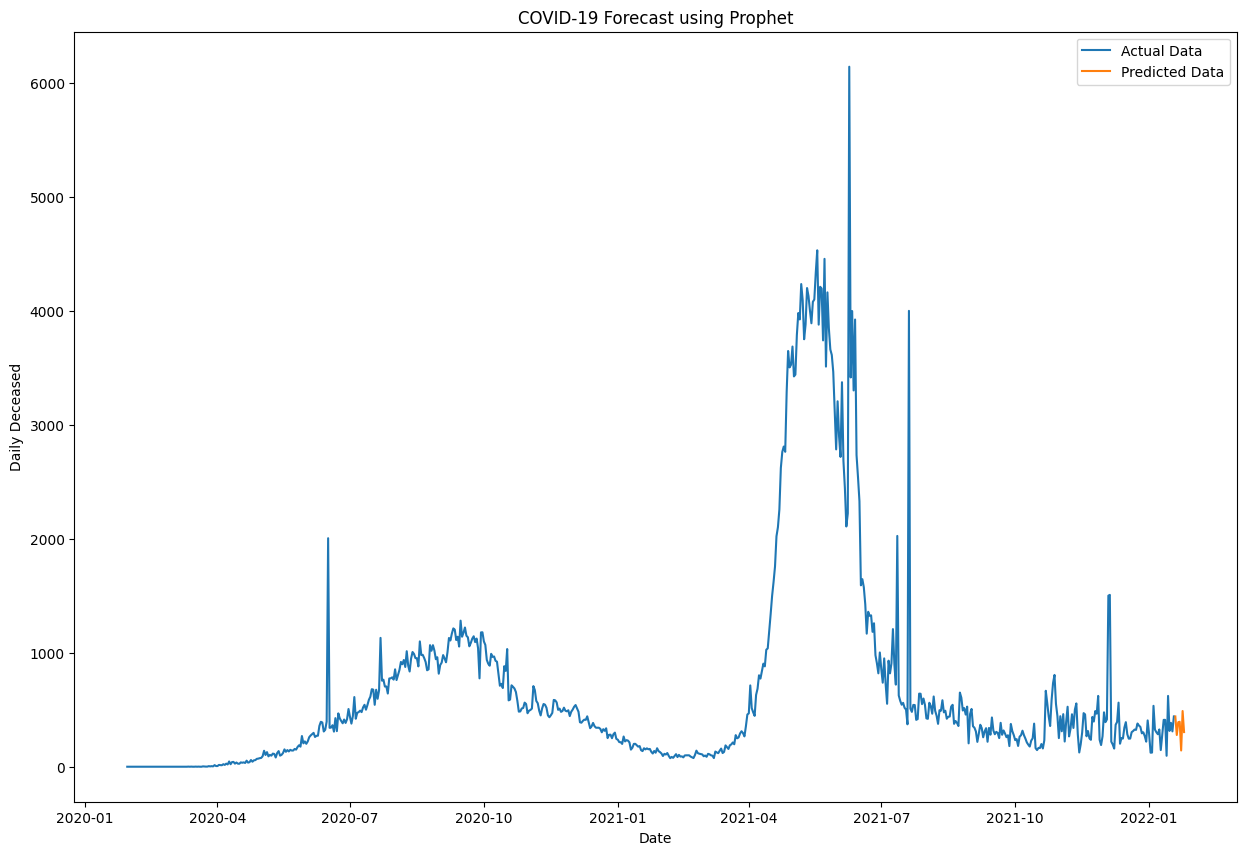

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df['Date_YMD'], df['Daily Deceased'], label='Actual Data')
plt.plot(forecast.index, forecast['Daily Deceased'], label='Predicted Data')


plt.xlabel("Date")
plt.ylabel("Daily Deceased")
plt.title("COVID-19 Forecast using Prophet")
plt.legend()
plt.show()

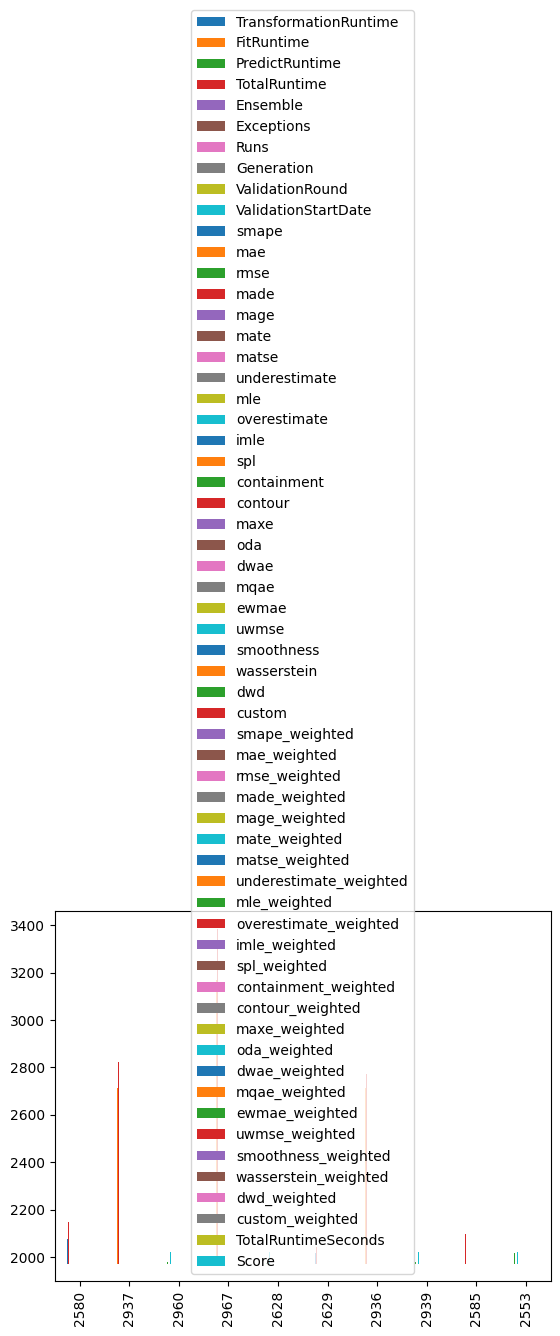

In [ ]:
model.results().head(10).plot(kind='bar')
plt.show()

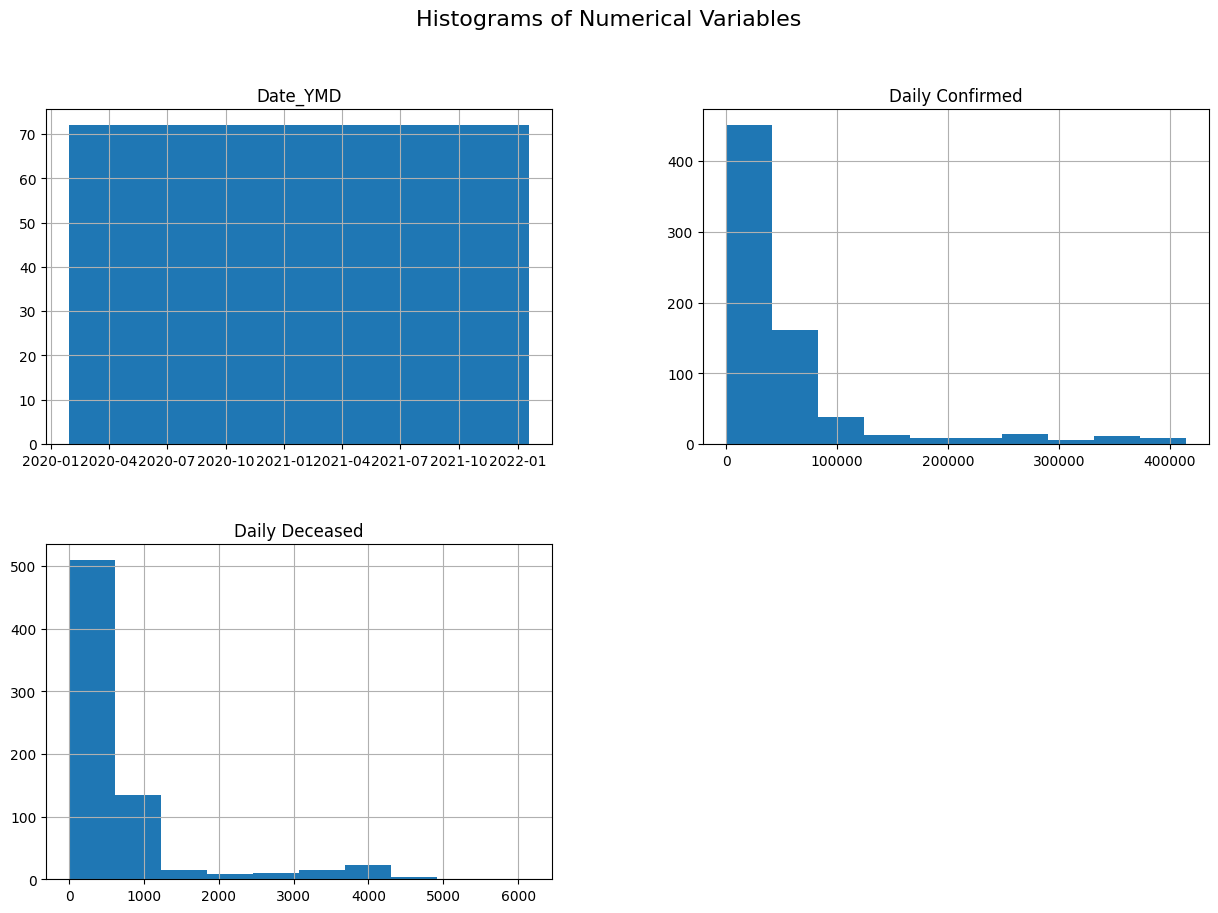

In [ ]:
df.hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.show()

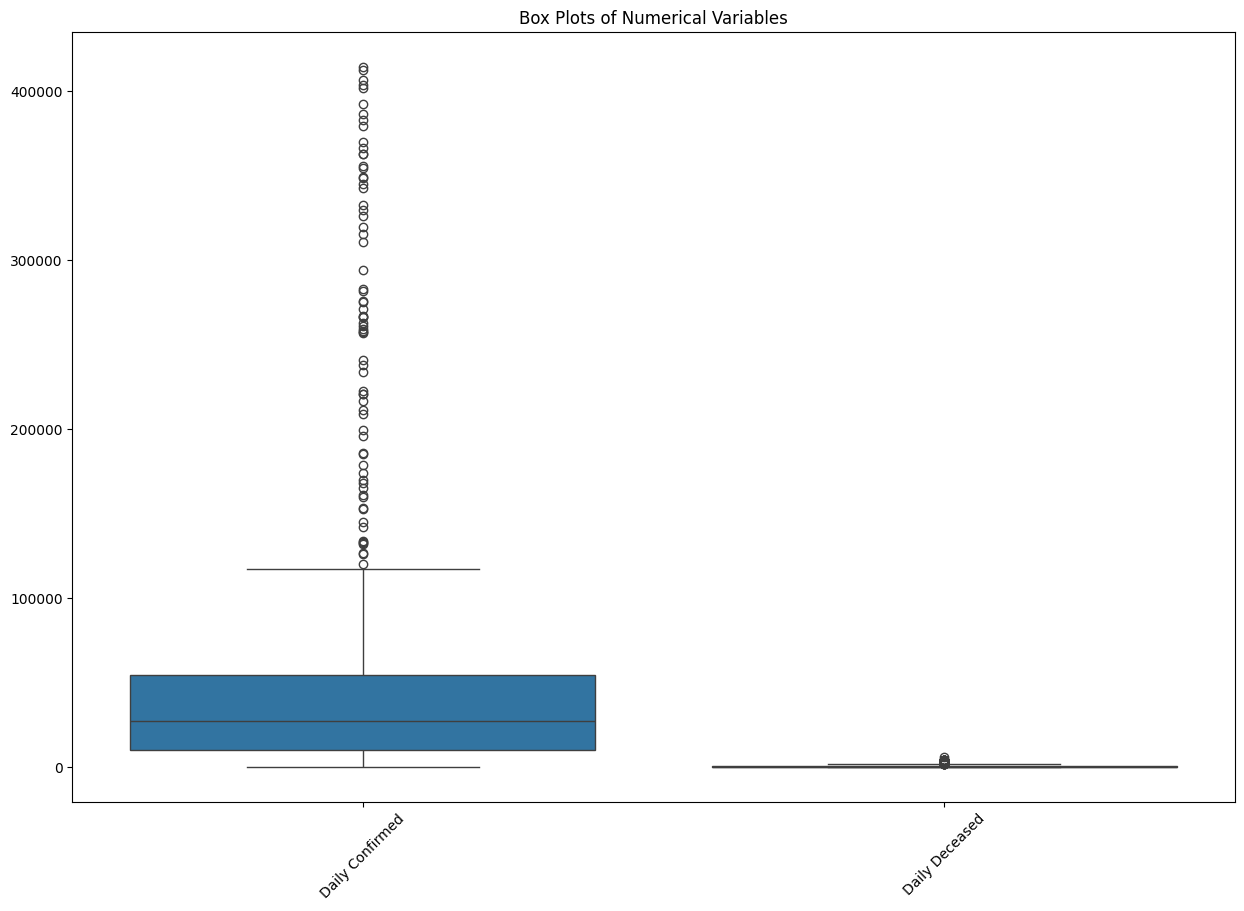

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Prophet

In [ ]:
df = df.rename(columns={'Date_YMD': 'ds', 'Daily Deceased': 'y'})

In [ ]:
pro_model = Prophet()
pro_model.fit(df)

In [ ]:
future= pro_model.make_future_dataframe(periods=30)
forecast = pro_model.predict(future)

In [ ]:
print(forecast)

            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2020-01-30 -199.682025 -842.029594  456.689715  -199.682025  -199.682025   
1   2020-01-31 -194.834051 -848.160725  492.219133  -194.834051  -194.834051   
2   2020-02-01 -189.986077 -844.042317  418.488693  -189.986077  -189.986077   
3   2020-02-02 -185.138102 -914.855587  435.530124  -185.138102  -185.138102   
4   2020-02-03 -180.290128 -944.872384  383.638471  -180.290128  -180.290128   
..         ...         ...         ...         ...          ...          ...   
745 2022-02-13  149.889803 -530.732160  765.884273    85.293883   215.411169   
746 2022-02-14  147.870461 -608.413042  751.883261    78.412024   220.151402   
747 2022-02-15  145.851118 -453.098041  835.518873    69.768130   227.779726   
748 2022-02-16  143.831775 -481.109694  868.120089    63.625833   229.640500   
749 2022-02-17  141.812432 -492.059033  763.488686    56.997459   234.542939   

     additive_terms  additive_terms_low

In [ ]:
fig = plot_plotly(pro_model, forecast)
pyo.iplot(fig)

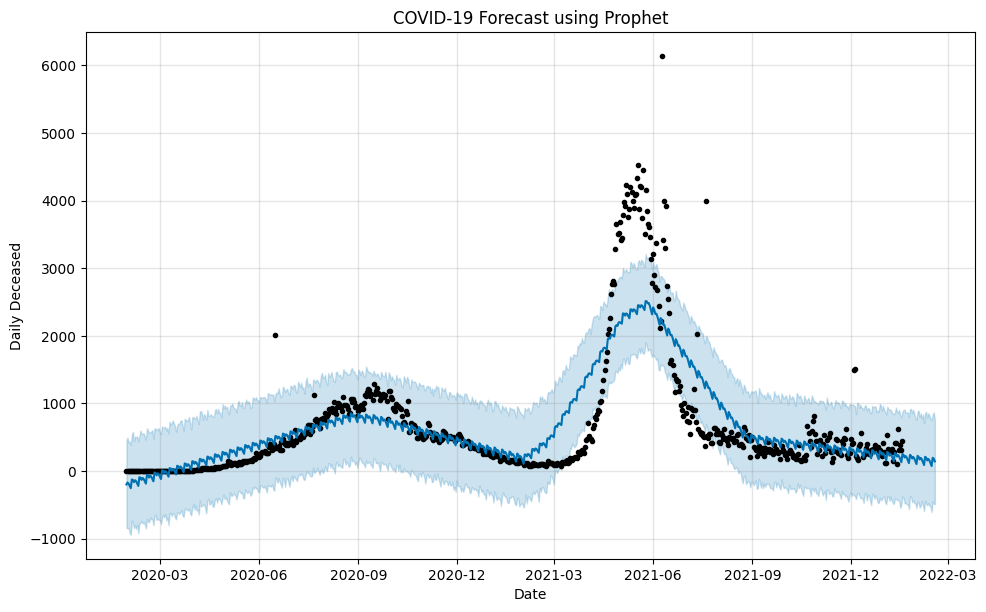

In [ ]:
pro_model.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Daily Deceased")
plt.title("COVID-19 Forecast using Prophet")
plt.show()

In [ ]:
#RandomForestRegressor

In [ ]:
x=df[['Date_YMD']]
y=df['Daily Deceased']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 1)
(144, 1)
(576,)
(144,)


In [ ]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_train,y_train)

0.9874662182122469

In [ ]:
rf.score(x_test,y_test)

0.9473378679671167

In [ ]:
y_pred=rf.predict(x_test)
print(y_pred)

[2.30500e+02 4.72240e+02 2.62000e+00 9.64760e+02 2.99093e+03 1.91100e+01
 8.31000e+00 3.53370e+02 5.66080e+02 9.81800e+01 4.23560e+02 2.31071e+03
 2.00000e-02 1.05250e+02 5.17590e+02 2.72410e+02 5.77900e+01 1.73390e+02
 7.37400e+02 9.09940e+02 1.80656e+03 1.20440e+02 0.00000e+00 3.21960e+02
 4.29865e+03 3.42580e+02 8.97800e+02 9.09610e+02 2.01110e+02 3.70560e+02
 2.59160e+02 1.44030e+02 2.49350e+02 9.04700e+01 5.72440e+02 6.06420e+02
 3.73180e+02 4.05950e+02 3.11720e+02 2.62565e+03 4.88450e+02 6.12910e+02
 1.60000e-01 3.12400e+02 2.12020e+02 2.67900e+01 2.35340e+02 3.02360e+02
 3.59100e+02 3.55300e+01 8.03670e+02 4.88400e+02 8.83020e+02 3.34130e+02
 2.71850e+02 1.47850e+02 9.01950e+02 8.52760e+02 4.36600e+01 2.66290e+02
 6.06230e+02 0.00000e+00 3.57100e+01 1.18350e+02 9.45520e+02 1.08460e+02
 2.60810e+02 4.25520e+02 1.06843e+03 3.35450e+02 4.99160e+02 1.34490e+02
 4.19800e+01 9.27100e+01 4.08900e+02 1.34231e+03 3.62660e+02 2.26210e+02
 3.92110e+02 9.42300e+02 5.30870e+02 5.14120e+02 8.

In [ ]:
original=scaler.inverse_transform(x_test)
print(original)

[[1.6097184e+18]
 [1.6053984e+18]
 [1.5850080e+18]
 [1.5974496e+18]
 [1.6194816e+18]
 [1.5859584e+18]
 [1.5857856e+18]
 [1.5928704e+18]
 [1.6055712e+18]
 [1.6140384e+18]
 [1.6413408e+18]
 [1.6190496e+18]
 [1.5837120e+18]
 [1.5890688e+18]
 [1.6174944e+18]
 [1.6086816e+18]
 [1.5877728e+18]
 [1.6345152e+18]
 [1.6027200e+18]
 [1.5987456e+18]
 [1.6188768e+18]
 [1.6120512e+18]
 [1.5831936e+18]
 [1.6396128e+18]
 [1.6216416e+18]
 [1.6082496e+18]
 [1.6022880e+18]
 [1.5984864e+18]
 [1.5907104e+18]
 [1.5918336e+18]
 [1.6163712e+18]
 [1.6117056e+18]
 [1.6093728e+18]
 [1.6127424e+18]
 [1.6296768e+18]
 [1.6352928e+18]
 [1.6422048e+18]
 [1.6295040e+18]
 [1.6307136e+18]
 [1.6229376e+18]
 [1.6062624e+18]
 [1.5920064e+18]
 [1.5845760e+18]
 [1.6418592e+18]
 [1.6162848e+18]
 [1.5865632e+18]
 [1.6098912e+18]
 [1.6319232e+18]
 [1.6365888e+18]
 [1.5869952e+18]
 [1.6254432e+18]
 [1.6384032e+18]
 [1.6180992e+18]
 [1.6314048e+18]
 [1.5916608e+18]
 [1.6107552e+18]
 [1.5985728e+18]
 [1.5989184e+18]
 [1.5876000e+1

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(root_mean_squared_log_error(y_test,y_pred))
print(median_absolute_error(y_test,y_pred))

0.9473378679671167
28811.522465972215
82.6354861111111
625499948246.1659
169.73957248082198
0.3350437628446926
27.169999999999987


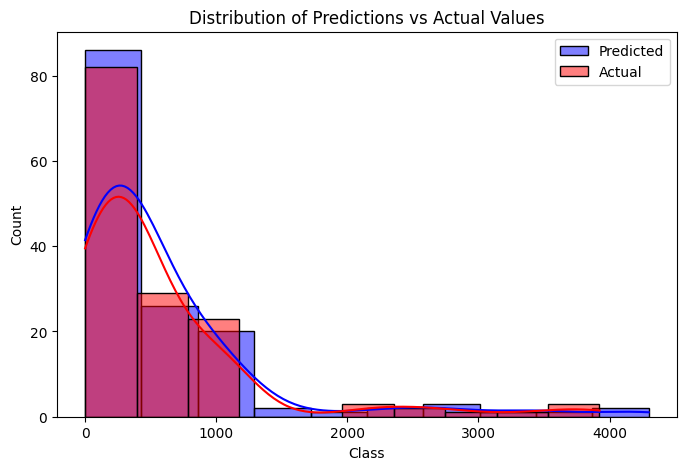

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
#XGBRegressor

In [ ]:
model=xgb.XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.score(x_train,y_train)

0.9653538465499878

In [ ]:
model.score(x_test,y_test)

0.9468838572502136

In [ ]:
y_pred_xg=model.predict(x_test)
print(y_pred_xg)

[2.30698563e+02 5.19730652e+02 2.50397325e+00 9.37384033e+02
 2.72921875e+03 9.88169956e+00 9.88169956e+00 3.80343628e+02
 5.19730652e+02 1.08383369e+02 3.27290131e+02 1.92943494e+03
 1.05364047e-01 1.00868355e+02 5.61065125e+02 3.23121338e+02
 5.70300331e+01 1.71926743e+02 7.13438354e+02 8.80523865e+02
 1.92943494e+03 1.12025917e+02 1.05364047e-01 3.11034760e+02
 4.20089062e+03 3.37890503e+02 9.50133301e+02 8.54976807e+02
 1.70993668e+02 3.54544647e+02 2.40886444e+02 1.32401001e+02
 2.66044312e+02 9.10600586e+01 5.40290283e+02 6.89975769e+02
 3.86063721e+02 4.66136292e+02 2.87304932e+02 2.33946777e+03
 4.89120056e+02 3.54544647e+02 2.91505992e-01 3.02263397e+02
 2.40886444e+02 3.00773335e+01 2.44277756e+02 3.46359253e+02
 3.13008484e+02 3.32822990e+01 8.33571106e+02 1.15976465e+03
 8.05932861e+02 3.24680817e+02 3.54544647e+02 1.93950439e+02
 8.54976807e+02 8.80523865e+02 4.04443588e+01 3.23121338e+02
 6.02658264e+02 1.05364047e-01 3.32822990e+01 1.12220970e+02
 9.17913818e+02 1.143789

In [ ]:
original_xg=scaler.inverse_transform(x_test)
print(original_xg)

[[1.6097184e+18]
 [1.6053984e+18]
 [1.5850080e+18]
 [1.5974496e+18]
 [1.6194816e+18]
 [1.5859584e+18]
 [1.5857856e+18]
 [1.5928704e+18]
 [1.6055712e+18]
 [1.6140384e+18]
 [1.6413408e+18]
 [1.6190496e+18]
 [1.5837120e+18]
 [1.5890688e+18]
 [1.6174944e+18]
 [1.6086816e+18]
 [1.5877728e+18]
 [1.6345152e+18]
 [1.6027200e+18]
 [1.5987456e+18]
 [1.6188768e+18]
 [1.6120512e+18]
 [1.5831936e+18]
 [1.6396128e+18]
 [1.6216416e+18]
 [1.6082496e+18]
 [1.6022880e+18]
 [1.5984864e+18]
 [1.5907104e+18]
 [1.5918336e+18]
 [1.6163712e+18]
 [1.6117056e+18]
 [1.6093728e+18]
 [1.6127424e+18]
 [1.6296768e+18]
 [1.6352928e+18]
 [1.6422048e+18]
 [1.6295040e+18]
 [1.6307136e+18]
 [1.6229376e+18]
 [1.6062624e+18]
 [1.5920064e+18]
 [1.5845760e+18]
 [1.6418592e+18]
 [1.6162848e+18]
 [1.5865632e+18]
 [1.6098912e+18]
 [1.6319232e+18]
 [1.6365888e+18]
 [1.5869952e+18]
 [1.6254432e+18]
 [1.6384032e+18]
 [1.6180992e+18]
 [1.6314048e+18]
 [1.5916608e+18]
 [1.6107552e+18]
 [1.5985728e+18]
 [1.5989184e+18]
 [1.5876000e+1

In [ ]:
print(r2_score(y_test,y_pred_xg))
print(mean_squared_error(y_test,y_pred_xg))
print(mean_absolute_error(y_test,y_pred_xg))
print(mean_absolute_percentage_error(y_test,y_pred_xg))
print(root_mean_squared_error(y_test,y_pred_xg))
print(root_mean_squared_log_error(y_test,y_pred_xg))
print(median_absolute_error(y_test,y_pred_xg))

0.9468838572502136
29059.91015625
86.42257690429688
23066822311936.0
170.4696807861328
0.3080565333366394
29.3291015625


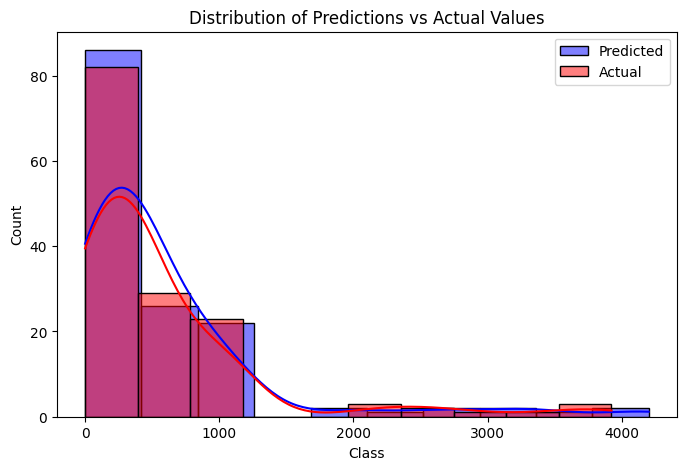

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_xg, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
